In [1]:
# Loading the packages I will need:

print("Loading packages...", end = '')

import numpy as np
from pyunpack import Archive 
import pandas as pd 
import missingno as msno
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import zipfile
import shutil  # For handling directories


print("Successful.") 

Loading packages...Successful.


### Data Preprocessing

Load CSV files


In [3]:
# Path to the data folder
data_folder = "data"

# Initialize a list to store DataFrames
dataframes = []

# Traverse through the year and month folders to find CSV files
for year_folder in os.listdir(data_folder):
    year_path = os.path.join(data_folder, year_folder)
    if os.path.isdir(year_path):
        for month_folder in os.listdir(year_path):
            month_path = os.path.join(year_path, month_folder)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)
                        df = pd.read_csv(file_path)
                        dataframes.append(df)

# Check if any CSV files were loaded
if not dataframes:
    print("No CSV files found in the data folder.")
else:
    # Display the list of CSV files loaded
    print(f"Loaded {len(dataframes)} CSV files.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Loaded 161 CSV files.


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\1526207693.py:17: DtypeWarning: Columns (4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Combine the Dataframes

In [4]:
# Check if any DataFrames were loaded
if not dataframes:
    print("No DataFrames to concatenate.")
else:
    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Display the combined DataFrame information
    combined_df.info()

    # Display the first few rows of the combined DataFrame to inspect
    print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TRDTYPE          int64  
 1   USASTATE         object 
 2   DEPE             object 
 3   DISAGMOT         int64  
 4   MEXSTATE         object 
 5   CANPROV          object 
 6   COUNTRY          int64  
 7   VALUE            int64  
 8   SHIPWT           int64  
 9   FREIGHT_CHARGES  int64  
 10  DF               float64
 11  CONTCODE         object 
 12  MONTH            int64  
 13  YEAR             int64  
 14  COMMODITY2       float64
dtypes: float64(2), int64(8), object(5)
memory usage: 745.8+ MB
   TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       

In [5]:
combined_df.tail()

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY  \
6517220        2      NaN  55XX         5      NaN     NaN     1220   
6517221        2      NaN  55XX         8      NaN     NaN     1220   
6517222        2      NaN  60XX         8      NaN     NaN     1220   
6517223        2      NaN  70XX         8      NaN     NaN     1220   
6517224        2      NaN  70XX         8      NaN     NaN     2010   

             VALUE  SHIPWT  FREIGHT_CHARGES  DF CONTCODE  MONTH  YEAR  \
6517220    4384342    7399             1883 NaN        0      9  2024   
6517221      50211    6350             3500 NaN        0      9  2024   
6517222     793390      80              500 NaN        0      9  2024   
6517223  233990301       0                0 NaN        0      9  2024   
6517224  224981722       0                0 NaN        0      9  2024   

         COMMODITY2  
6517220        98.0  
6517221        98.0  
6517222        89.0  
6517223        99.0  
6517224        99.0

In [6]:
combined_df.head(7)

TRDTYPE USASTATE  DEPE  DISAGMOT MEXSTATE CANPROV  COUNTRY    VALUE  \
0        1       AK  0115         5      NaN      XB     1220     4660   
1        1       AK  0901         5      NaN      XO     1220    14360   
2        1       AK  20XX         1       XX     NaN     2010  4293733   
3        1       AK  20XX         3      NaN      XA     1220    28283   
4        1       AK  20XX         3      NaN      XA     1220    29848   
5        1       AK  20XX         3      NaN      XC     1220     6699   
6        1       AK  20XX         3      NaN      XC     1220     9103   

     SHIPWT  FREIGHT_CHARGES   DF CONTCODE  MONTH  YEAR  COMMODITY2  
0         0               67  2.0        X      4  2020         NaN  
1         0              282  1.0        X      4  2020         NaN  
2  24971000                0  1.0        0      4  2020         NaN  
3       443              563  1.0        X      4  2020         NaN  
4        69              538  2.0        X      4  2020         NaN  
5       248              142  1.0        X      4  2020         NaN  
6        15              208  2.0        X      4  2020         NaN

In [7]:
# Check for missing values
print("Missing values in each column:")
print(combined_df.isnull().sum())


Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                 2184568
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2         1500485
dtype: int64


want to check unique values in each column just to be on the safe side

In [8]:
# Check unique values for each column
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print("\n")

Unique values in column TRDTYPE:
[1 2]


Unique values in column USASTATE:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in column DEPE:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '3011' '3020' '3318' '4115'

we can now crosscheck from the data dictionary and make comparisons on the unique vales

COMMODITY2 change from float to int 

(CONTCODE) Code Containerized? 
X Containerized 
0 Non-Containerized 


DF from float to int

Country Code (COUNTRY) int to obj
Code Country 
1220 Canada 
2010 Mexico

Domestic/Foreign Code (DF) float to object 
Distinguishes whether the merchandise was produced in the U.S. 
Code 
1 domestically produced merchandise 
2 foreign produced merchandise

Mode of Transportation Code (DISAGMOT) int to object 
Code Description 
1 Vessel 
3 Air 
4 Mail (U.S. Postal Service) 
5 Truck 
6 Rail 
7 Pipeline 
8 Other 
9 Foreign Trade Zones (FTZs)

Month (MONTH) int to datetime 
Month Code 
Month 
1 January 
2 February 
3 March 
4 April 
5 May 
6 June 
7 July 
8 August 
9 September 
10 October 
11 November 
12 December

DEPE no need

Shipping Weight (SHIPWT) no need Weight in Kilograms

Trade Type Code (TRDTYPE) int to obj 
Code Trade Type 
1 Export 
2 Import

USASTATE no need

Value (VALUE) Value of Goods in United States Dollars

Year (YEAR) int to datetime

Freight Charges (FREIGHT_CHARGES) no need Freight Charges in U.S. Dollars


datatypes changed and unique values assigned to specific values according to data dictionary pdf 

In [9]:
# Fill non-finite values in COMMODITY2 with 0 and change from float to int
combined_df['COMMODITY2'] = combined_df['COMMODITY2'].fillna(0).astype(int)

# Change CONTCODE from code to descriptive text
combined_df['CONTCODE'] = combined_df['CONTCODE'].replace({
    'X': 'Containerized',
    '0': 'Non-Containerized'
}) 

# Change COUNTRY from int to object and replace values
combined_df['COUNTRY'] = combined_df['COUNTRY'].astype(str).replace({
    '1220': 'Canada',
    '2010': 'Mexico'
})

# Change DF from float to object and replace values
combined_df['DF'] = combined_df['DF'].astype(str).replace({
    '1.0': 'domestic pr. merch',
    '2.0': 'foreign pr. merch'
})

# Change DISAGMOT from int to object and replace values
combined_df['DISAGMOT'] = combined_df['DISAGMOT'].astype(str).replace({
    '1': 'Vessel',
    '3': 'Air',
    '4': 'Mail (U.S. Postal Service)',
    '5': 'Truck',
    '6': 'Rail',
    '7': 'Pipeline',
    '8': 'Other',
    '9': 'Foreign Trade Zones (FTZs)'
})

# Change MONTH from int to descriptive text
combined_df['MONTH'] = combined_df['MONTH'].astype(str).replace({
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
})

# Change TRDTYPE from int to object and replace values
combined_df['TRDTYPE'] = combined_df['TRDTYPE'].astype(str).replace({
    '1': 'Export',
    '2': 'Import'
})

# Ensure YEAR column is in datetime format and extract the year as string
combined_df['YEAR'] = pd.to_datetime(combined_df['YEAR'], errors='coerce', format='%Y')
combined_df['YEAR'] = combined_df['YEAR'].dt.year.astype(str)

# Assign the updated DataFrame to a new variable df
df = combined_df


In [10]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

In [11]:
# Display the updated DataFrame information
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6517225 entries, 0 to 6517224
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
dtypes: int64(4), object(11)
memory usage: 745.8+ MB


In [12]:
df.describe()

VALUE        SHIPWT  FREIGHT_CHARGES    COMMODITY2
count  6.517225e+06  6.517225e+06     6.517225e+06  6.517225e+06
mean   2.945795e+06  1.200403e+06     3.851583e+04  4.375757e+01
std    3.786455e+07  4.073193e+07     1.024961e+06  3.417434e+01
min    0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00
25%    1.434300e+04  0.000000e+00     0.000000e+00  6.000000e+00
50%    7.220900e+04  0.000000e+00     2.630000e+02  4.000000e+01
75%    4.345660e+05  2.391000e+03     2.900000e+03  7.900000e+01
max    5.595625e+09  9.068700e+09     2.487214e+08  9.900000e+01

In [15]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

### Data Cleaning

In [13]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE            915116
DEPE               4101624
DISAGMOT                 0
MEXSTATE           4677264
CANPROV            3119497
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
dtype: int64


columns with nan values 

USASTATE

DEPE

MEXSTATE

CANPROV

DF

USASTATE            915116

DEPE               4101624

MEXSTATE           4677264

CANPROV            3119497 

Unique values in column CONTCODE:

['Containerized' 'Non-Containerized' '1' 0 1]

i have to check the unique columns in CONTCODE column and either remove anything 

other than 'Containerized' 'Non-Containerized' or rename it

CONTCODE column

In [14]:
# Define the unique values to filter
unique_values = ['Containerized', 'Non-Containerized', '1', 0, 1]

# Filter the DataFrame for rows with the specified unique values in the CONTCODE column
filtered_df = df[df['CONTCODE'].isin(unique_values)]

# Count the number of rows in the filtered DataFrame
num_rows = len(filtered_df)

# Display the number of rows
print(f"Number of rows with specified unique values in CONTCODE: {num_rows}")

Number of rows with specified unique values in CONTCODE: 6517225


In [15]:
# Count the number of each unique value in the CONTCODE column
contcode_counts = df['CONTCODE'].value_counts()

# Display the counts
print("Counts of each unique value in the CONTCODE column:")
print(contcode_counts)

Counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3118231
Containerized        2385964
0                     504833
1                     448877
1                      59320
Name: count, dtype: int64


In [16]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '5201' '5203' '52XX' '0209' '02XX' '0704' '3301'
 '3424' '5301' '55XX' '0715' '11XX' '24XX' '2501' '2603' '2605' '2606'
 '26XX' '2720' '2801' '29XX' '

drop rows with unique values '1' , 1 in the CONTCODE column and assign 0 to Non-Containerized since 0 is the assigned value to Non-Containerized in the data dictionary


In [17]:
# Replace 0 with Non-Containerized in the CONTCODE column
df['CONTCODE'] = df['CONTCODE'].replace(0, 'Non-Containerized')

# Drop rows with the value 1 in the CONTCODE column
df = df[df['CONTCODE'] != '1']
df = df[df['CONTCODE'] != 1]

# Verify the changes by counting the number of each unique value in the CONTCODE column again
contcode_counts_updated = df['CONTCODE'].value_counts()

# Display the updated counts
print("Updated counts of each unique value in the CONTCODE column:")
print(contcode_counts_updated)

Updated counts of each unique value in the CONTCODE column:
CONTCODE
Non-Containerized    3623064
Containerized        2385964
Name: count, dtype: int64


chk/p

In [18]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '

USASTATE column

In [19]:
# Check unique values in the USASTATE column
unique_usastate_values = df['USASTATE'].unique()

# Display the unique values
print("Unique values in the USASTATE column:")
print(unique_usastate_values)

Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' nan]


In [20]:
# Count the number of each unique value in the USASTATE column
usastate_counts = df['USASTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the USASTATE column:")
print(usastate_counts)

Counts of each unique value in the USASTATE column:
USASTATE
TX    310355
CA    269118
IL    218062
OH    176404
PA    172986
NY    172743
FL    168339
MI    160781
GA    157111
NJ    156209
WI    149296
NC    147614
IN    137796
MN    133375
TN    131837
MA    126794
WA    125858
AZ    119112
MO    117173
KY    107014
SC    106348
CO     98791
VA     98586
CT     95591
OR     91240
IA     90305
KS     87038
AL     86898
UT     85219
MD     83287
NV     74545
OK     73347
LA     73213
MS     67628
AR     64525
NH     61959
NE     61362
ID     56324
ME     56123
RI     47097
ND     46167
DE     43192
NM     42557
MT     42352
VT     41147
SD     39439
WV     35409
DU     31004
WY     25801
AK     22936
HI     12526
DC      9265
Name: count, dtype: int64


In [21]:
# Count the number of NaN values in the USASTATE column
usastate_nan_count = df['USASTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the USASTATE column: {usastate_nan_count}")

Count of NaN values in the USASTATE column: 799830


In [22]:
# Drop rows with NaN values in the USASTATE column
df = df.dropna(subset=['USASTATE'])

# Verify the changes by checking the count of NaN values in the USASTATE column again
usastate_nan_count_after = df['USASTATE'].isnull().sum()

# Display the count of NaN values after dropping to confirm the changes 
print(f"Count of NaN values in the USASTATE column after dropping: {usastate_nan_count_after}")



Count of NaN values in the USASTATE column after dropping: 0


chk/p

In [26]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DEPE column

In [23]:
# Check unique values in the DEPE column
unique_depe_values = df['DEPE'].unique()

# Display the unique values
print("Unique values in the DEPE column:")
print(unique_depe_values)

# Count the number of each unique value in the DEPE column
depe_counts = df['DEPE'].value_counts()

# Display the counts
print("Counts of each unique value in the DEPE column:")
print(depe_counts)

Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115' '53XX' '0101' '0102' '0110' '0212'
 '13XX' '2302' '2307' '2504' '2505' '25XX' '2602' '2704' '28XX' '3002'
 '3003' '3005' '3007' '3008' '3013' '3025' '32XX' '3304' '3308' '3316'
 '3322' '3405' '3408' '3805' '3809' '3819' '3901' '39XX' '4105' '4110'
 '49XX' '5203' '5501' '3307' '45XX' '0104' '0211' '04XX' '1012' '1704'
 '80XX' '51XX' '0118' '0127' '14XX' '16XX' 

In [24]:
# Count the number of NaN values in the DEPE column
depe_nan_count = df['DEPE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DEPE column: {depe_nan_count}")

Count of NaN values in the DEPE column: 3843262


 put all port code in their respective district code so we use the district code for analysis because the port codes are too many

 organize the port codes under their respective district codes and create a new column in the DataFrame to represent the district code. This will help simplify the analysis by using the district code instead of individual port codes.

In [25]:
# Create a mapping dictionary for district codes and port codes

# mapping dictionary for district codes and their corresponding port codes
district_mapping = {
    '01XX': ['0101', '0102', '0103', '0104', '0105', '0106', '0107', '0108', '0109', '0110', '0111', '0112', '0115', '0118', '0121', '0122', '0127', '0131', '0132', '0152', '0181', '0182'],
    '02XX': ['0201', '0203', '0206', '0207', '0209', '0211', '0212'],
    '04XX': ['0401', '0402', '0403', '0404', '0405', '0406', '0407', '0408', '0409', '0410', '0411', '0412', '0413', '0416', '0417'],
    '05XX': ['0501', '0502', '0503'],
    '07XX': ['0701', '0704', '0706', '0708', '0712', '0714', '0715'],
    '09XX': ['0901', '0903', '0904', '0905', '0906', '0907', '0971', '0972', '0981'],
    '10XX': ['1001', '1002', '1003', '1012'],
    '11XX': ['1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '1113', '1119', '1181', '1182', '1183', '1195'],
    '13XX': ['1301', '1302', '1303', '1304', '1305'],
    '14XX': ['1401', '1402', '1404', '1408', '1409', '1410', '1412'],
    '15XX': ['1501', '1502', '1503', '1506', '1511', '1512'],
    '16XX': ['1601', '1602', '1603', '1604', '1681'],
    '17XX': ['1701', '1703', '1704'],
    '18XX': ['1801', '1803', '1805', '1807', '1808', '1809', '1814', '1816', '1818', '1819', '1821', '1822', '1883', '1884', '1885', '1886', '1887'],
    '19XX': ['1901', '1902', '1903', '1904', '1910'],
    '20XX': ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2082', '2083', '2095'],
    '21XX': ['2101', '2102', '2103', '2104'],
    '23XX': ['2301', '2302', '2303', '2304', '2305', '2307', '2309', '2310', '2381', '2383'],
    '24XX': ['2401', '2402', '2403', '2404', '2406', '2407', '2408', '2481'],
    '25XX': ['2501', '2502', '2503', '2504', '2505', '2506', '2507'],
    '26XX': ['2601', '2602', '2603', '2604', '2605', '2606', '2608', '2609'],
    '27XX': ['2704', '2707', '2709', '2711', '2712', '2713', '2715', '2719', '2720', '2721', '2722', '2770', '2772', '2773', '2774', '2775', '2776', '2781', '2782', '2791', '2795'],
    '28XX': ['2801', '2802', '2803', '2805', '2809', '2810', '2811', '2812', '2813', '2815', '2816', '2820', '2821', '2827', '2828', '2829', '2830', '2831', '2833', '2834', '2835', '2870', '2871', '2872', '2873', '2881', '2895'],
    '29XX': ['2901', '2902', '2903', '2904', '2905', '2907', '2908', '2909', '2910'],
    '30XX': ['3001', '3002', '3003', '3004', '3005', '3006', '3007', '3008', '3009', '3010', '3011', '3012', '3013', '3014', '3015', '3016', '3017', '3018', '3019', '3020', '3022', '3023', '3025', '3026', '3027', '3029', '3071', '3072', '3073', '3074', '3081', '3082', '3095'],
    '31XX': ['3101', '3102', '3103', '3104', '3105', '3106', '3107', '3111', '3112', '3115', '3124', '3126', '3127', '3181', '3195', '3196'],
    '32XX': ['3201', '3202', '3203', '3204', '3205', '3206', '3295'],
    '33XX': ['3301', '3302', '3303', '3304', '3305', '3306', '3307', '3308', '3309', '3310', '3312', '3316', '3317', '3318', '3319', '3321', '3322', '3323', '3324', '3325', '3382', '3384', '3385'],
    '34XX': ['3401', '3403', '3404', '3405', '3406', '3407', '3408', '3409', '3410', '3411', '3413', '3414', '3415', '3416', '3417', '3419', '3420', '3421', '3422', '3423', '3424', '3425', '3426', '3427', '3429', '3430', '3433', '3434', '3481'],
    '35XX': ['3501', '3502', '3510', '3511', '3512', '3513', '3581'],
    '36XX': ['3604', '3613', '3614'],
    '37XX': ['3701', '3702', '3703', '3706', '3707', '3708'],
    '38XX': ['3801', '3802', '3803', '3804', '3805', '3806', '3807', '3808', '3809', '3814', '3815', '3816', '3818', '3819', '3820', '3842', '3843', '3844', '3881', '3882'],
    '39XX': ['3901', '3902', '3905', '3908', '3909', '3981', '3983', '3984', '3985', '3991'],
    '41XX': ['4101', '4102', '4103', '4104', '4105', '4106', '4110', '4112', '4115', '4116', '4117', '4121', '4122', '4181', '4183', '4184', '4185', '4192', '4194', '4195', '4196', '4198'],
    '45XX': ['4501', '4502', '4503', '4504', '4505', '4506'],
    '46XX': ['4601', '4602', '4670', '4671', '4681'],
    '47XX': ['4701', '4770', '4771', '4772', '4773', '4774', '4775', '4776', '4777', '4778'],
    '49XX': ['4901', '4904', '4906', '4907', '4908', '4909', '4911', '4912', '4913'],
    '51XX': ['5101', '5102', '5103', '5104', '5105'],
    '52XX': ['5201', '5202', '5203', '5204', '5205', '5206', '5210', '5270', '5271', '5272', '5273', '5295', '5297', '5298'],
    '53XX': ['5301', '5306', '5309', '5310', '5311', '5312', '5313', '5381'],
    '54XX': ['5401', '5402'],
    '55XX': ['5501', '5502', '5503', '5504', '5505', '5506', '5507', '5582', '5583', '5584'],
    '60XX': ['60XX'],
    '70XX': ['70XX'],
    '80XX': ['80XX']
}

In [26]:
# Create a reverse mapping dictionary
port_to_district_mapping = {}
for district, ports in district_mapping.items():
    for port in ports:
        port_to_district_mapping[port] = district

Apply the mapping to the DataFrame

In [27]:
# Apply the reverse mapping to the DEPE column to create a new DISTRICT column
df['DISTRICT'] = df['DEPE'].astype(str).map(port_to_district_mapping).fillna(df['DEPE'])

# Verify the changes by checking the unique values again
print("Unique values in the DISTRICT column after applying mapping:")
print(df['DISTRICT'].unique())

# Count the number of each unique value in the DISTRICT column
district_counts = df['DISTRICT'].value_counts()

# Display the counts for DISTRICT
print("Counts of each unique value in the DISTRICT column:")
print(district_counts)

Unique values in the DISTRICT column after applying mapping:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '26XX' '27XX'
 '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX' '13XX'
 '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX' '37XX'
 '15XX' '54XX' '05XX' '21XX' '59XX' nan '60XX']
Counts of each unique value in the DISTRICT column:
DISTRICT
23XX    231762
38XX    127438
30XX    108674
34XX    107298
07XX     90765
24XX     71034
20XX     69018
41XX     68563
33XX     66984
09XX     58413
25XX     52872
01XX     46545
26XX     41650
70XX     31779
36XX     31519
02XX     27500
35XX     19902
10XX     13938
55XX     10878
39XX      9922
52XX      9371
27XX      9153
31XX      7972
53XX      5984
17XX      5724
28XX      4666
11XX      4372
04XX      4161
18XX      3439
29XX      3331
15XX      3225
32XX      2287
16XX      2268
45XX      2260
13XX      2160
54XX      2151
19XX  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5209198 entries, 0 to 6500079
Data columns (total 16 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DEPE             object
 3   DISAGMOT         object
 4   MEXSTATE         object
 5   CANPROV          object
 6   COUNTRY          object
 7   VALUE            int64 
 8   SHIPWT           int64 
 9   FREIGHT_CHARGES  int64 
 10  DF               object
 11  CONTCODE         object
 12  MONTH            object
 13  YEAR             object
 14  COMMODITY2       int64 
 15  DISTRICT         object
dtypes: int64(4), object(12)
memory usage: 675.6+ MB


chk/p

In [84]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DISTRICT column has been created to simplify the DEPE column for analysis

MEXSTATE column

In [29]:
# Check unique values in the MEXSTATE column
unique_mexstate_values = df['MEXSTATE'].unique()

# Display the unique values
print("Unique values in the MEXSTATE column:")
print(unique_mexstate_values)

# Count the number of each unique value in the MEXSTATE column
mexstate_counts = df['MEXSTATE'].value_counts()

# Display the counts
print("Counts of each unique value in the MEXSTATE column:")
print(mexstate_counts)

Unique values in the MEXSTATE column:
[nan 'XX' 'CO' 'NL' 'CH' 'CM' 'GT' 'JA' 'MX' 'OT' 'QT' 'SL' 'BC' 'BS' 'DF'
 'TM' 'ZA' 'DG' 'HG' 'SO' 'AG' 'MI' 'MO' 'PU' 'TL' 'VE' 'SI' 'YU' 'TB'
 'CS' 'CL' 'OA' 'QR' 'GR']
Counts of each unique value in the MEXSTATE column:
MEXSTATE
MX    161671
NL    144916
XX    115685
CH    107361
BC    106487
DF     96938
JA     91074
SO     80236
TM     78605
CO     75872
QT     75362
GT     68703
OT     68106
SL     55340
CM     49108
PU     40036
AG     38560
SI     29061
DG     25817
HG     22324
VE     20725
MO     19228
TL     15395
MI     14728
BS     13497
ZA     12184
QR      9335
YU      8260
TB      5963
CL      4408
CS      3613
OA      3360
GR      3154
Name: count, dtype: int64


In [30]:
df.shape

(5209198, 16)

In [31]:
# Count the number of NaN values in the MEXSTATE column
mexstate_nan_count = df['MEXSTATE'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the MEXSTATE column: {mexstate_nan_count}")

Count of NaN values in the MEXSTATE column: 3544086


given that there are a lot of rows with NaN values in the MEXSTATE column, it might be more appropriate to fill these NaN values with 'Unknown' rather than dropping the rows, as dropping them could result in significant data loss.

In [32]:
# Fill NaN values in the MEXSTATE column with 'Unknown'
df['MEXSTATE'] = df['MEXSTATE'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the MEXSTATE column again
nan_count_after = df['MEXSTATE'].isnull().sum()
print(f"Count of NaN values in the MEXSTATE column after filling: {nan_count_after}")

# Check unique values in the MEXSTATE column
unique_mexstate_values = df['MEXSTATE'].unique()
print("Unique values in the MEXSTATE column after filling NaN values:")
print(unique_mexstate_values)

Count of NaN values in the MEXSTATE column after filling: 0
Unique values in the MEXSTATE column after filling NaN values:
['Unknown' 'XX' 'CO' 'NL' 'CH' 'CM' 'GT' 'JA' 'MX' 'OT' 'QT' 'SL' 'BC'
 'BS' 'DF' 'TM' 'ZA' 'DG' 'HG' 'SO' 'AG' 'MI' 'MO' 'PU' 'TL' 'VE' 'SI'
 'YU' 'TB' 'CS' 'CL' 'OA' 'QR' 'GR']


In [33]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

CANPROV column

In [34]:
# Check unique values in the CANPROV column
unique_canprov_values = df['CANPROV'].unique()

# Display the unique values
print("Unique values in the CANPROV column:")
print(unique_canprov_values)

# Count the number of each unique value in the CANPROV column
canprov_counts = df['CANPROV'].value_counts()

# Display the counts
print("Counts of each unique value in the CANPROV column:")
print(canprov_counts)



Unique values in the CANPROV column:
['XB' 'XO' nan 'XA' 'XC' 'XM' 'XQ' 'XY' 'XW' 'XS' 'XN' 'XP' 'OT' 'XT' 'XV']
Counts of each unique value in the CANPROV column:
CANPROV
XO    905038
XQ    593071
XC    518984
XA    431281
XM    358571
XS    177134
XB    146629
XN     69816
XP     25848
XW     15418
OT      5824
XY      2375
XT       439
XV       104
Name: count, dtype: int64


In [35]:
# Count the number of NaN values in the CANPROV column
canprov_nan_count = df['CANPROV'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the CANPROV column: {canprov_nan_count}")

Count of NaN values in the CANPROV column: 1958666


In [36]:
# Fill NaN values in the CANPROV column with 'Unknown'
df['CANPROV'] = df['CANPROV'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the CANPROV column again
canprov_nan_count_after = df['CANPROV'].isnull().sum()
print(f"Count of NaN values in the CANPROV column after filling: {canprov_nan_count_after}")

# Check unique values in the CANPROV column
unique_canprov_values = df['CANPROV'].unique()
print("Unique values in the CANPROV column after filling NaN values:")
print(unique_canprov_values)

Count of NaN values in the CANPROV column after filling: 0
Unique values in the CANPROV column after filling NaN values:
['XB' 'XO' 'Unknown' 'XA' 'XC' 'XM' 'XQ' 'XY' 'XW' 'XS' 'XN' 'XP' 'OT'
 'XT' 'XV']


In [43]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

In [37]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE                 0
DEPE               3843262
DISAGMOT                 0
MEXSTATE                 0
CANPROV                  0
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
DISTRICT           3843262
dtype: int64


DF column

In [38]:
# Check unique values in the DF column
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)



Unique values in the DF column:
['foreign pr. merch' 'domestic pr. merch' 'nan']
Counts of each unique value in the DF column:
DF
domestic pr. merch    2398084
nan                   1598458
foreign pr. merch     1212656
Name: count, dtype: int64


In [39]:
# Count the number of NaN values in the DF column
df_nan_count = df['DF'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DF column: {df_nan_count}")

Count of NaN values in the DF column: 0


In [40]:
# Count the number of 'nan' strings in the DF column
df_nan_string_count = (df['DF'] == 'nan').sum()

# Display the count of 'nan' strings
print(f"Count of 'nan' strings in the DF column: {df_nan_string_count}")

Count of 'nan' strings in the DF column: 1598458


In [41]:
# Replace the string 'nan' with 'Unknown' in the DF column
df['DF'] = df['DF'].replace('nan', 'Unknown')

# Verify the changes by checking the unique values in the DF column again
unique_df_values = df['DF'].unique()

# Display the unique values
print("Unique values in the DF column:")
print(unique_df_values)

# Count the number of each unique value in the DF column
df_counts = df['DF'].value_counts()

# Display the counts
print("Counts of each unique value in the DF column:")
print(df_counts)

Unique values in the DF column:
['foreign pr. merch' 'domestic pr. merch' 'Unknown']
Counts of each unique value in the DF column:
DF
domestic pr. merch    2398084
Unknown               1598458
foreign pr. merch     1212656
Name: count, dtype: int64


In [42]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

DISTRICT column

In [43]:
# Check unique values in the DISTRICT column
unique_district_values = df['DISTRICT'].unique()

# Display the unique values
print("Unique values in the DISTRICT column:")
print(unique_district_values)

# Count the number of each unique value in the DISTRICT column
district_counts = df['DISTRICT'].value_counts()

# Display the counts
print("Counts of each unique value in the DISTRICT column:")
print(district_counts)



Unique values in the DISTRICT column:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '26XX' '27XX'
 '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX' '13XX'
 '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX' '37XX'
 '15XX' '54XX' '05XX' '21XX' '59XX' nan '60XX']
Counts of each unique value in the DISTRICT column:
DISTRICT
23XX    231762
38XX    127438
30XX    108674
34XX    107298
07XX     90765
24XX     71034
20XX     69018
41XX     68563
33XX     66984
09XX     58413
25XX     52872
01XX     46545
26XX     41650
70XX     31779
36XX     31519
02XX     27500
35XX     19902
10XX     13938
55XX     10878
39XX      9922
52XX      9371
27XX      9153
31XX      7972
53XX      5984
17XX      5724
28XX      4666
11XX      4372
04XX      4161
18XX      3439
29XX      3331
15XX      3225
32XX      2287
16XX      2268
45XX      2260
13XX      2160
54XX      2151
19XX      1614
49XX      1491

In [44]:
# Count the number of NaN values in the DISTRICT column
district_nan_count = df['DISTRICT'].isnull().sum()

# Display the count of NaN values
print(f"Count of NaN values in the DISTRICT column: {district_nan_count}")

Count of NaN values in the DISTRICT column: 3843262


In [45]:
# Fill NaN values in the DISTRICT column with 'Unknown'
df['DISTRICT'] = df['DISTRICT'].fillna('Unknown')

# Verify the changes by checking the count of NaN values in the DISTRICT column again
district_nan_count_after = df['DISTRICT'].isnull().sum()
print(f"Count of NaN values in the DISTRICT column after filling: {district_nan_count_after}")

# Check unique values in the DISTRICT column
unique_district_values = df['DISTRICT'].unique()
print("Unique values in the DISTRICT column after filling NaN values:")
print(unique_district_values)

Count of NaN values in the DISTRICT column after filling: 0
Unique values in the DISTRICT column after filling NaN values:
['01XX' '09XX' '20XX' '23XX' '24XX' '25XX' '30XX' '31XX' '33XX' '36XX'
 '38XX' '41XX' '70XX' '07XX' '10XX' '17XX' '18XX' '19XX' '26XX' '27XX'
 '34XX' '35XX' '52XX' '02XX' '55XX' '11XX' '28XX' '29XX' '53XX' '13XX'
 '32XX' '39XX' '49XX' '45XX' '04XX' '80XX' '51XX' '14XX' '16XX' '37XX'
 '15XX' '54XX' '05XX' '21XX' '59XX' 'Unknown' '60XX']


In [102]:
# Check unique values for each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in the {column} column:")
    print(unique_values)
    print("\n")

Unique values in the TRDTYPE column:
['Export' 'Import']


Unique values in the USASTATE column:
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'DU' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']


Unique values in the DEPE column:
['0115' '0901' '20XX' '2303' '2304' '2305' '2408' '2506' '3001' '3004'
 '3009' '3023' '30XX' '3101' '3103' '3104' '3106' '3126' '31XX' '3310'
 '3613' '3801' '3802' '4101' '4102' '41XX' '70XX' '0106' '01XX' '0701'
 '0708' '0712' '07XX' '09XX' '10XX' '17XX' '18XX' '19XX' '2006' '2301'
 '2310' '2401' '2402' '2403' '2404' '2503' '2507' '2601' '2604' '2608'
 '27XX' '3019' '3302' '33XX' '3401' '3403' '3422' '34XX' '3501' '35XX'
 '3604' '3803' '38XX' '52XX' '0209' '02XX' '0704' '3301' '3424' '55XX'
 '0715' '11XX' '24XX' '2501' '2603' '2605' '2606' '26XX' '2720' '2801'
 '29XX' '3011' '3020' '3318' '4115

In [46]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
TRDTYPE                  0
USASTATE                 0
DEPE               3843262
DISAGMOT                 0
MEXSTATE                 0
CANPROV                  0
COUNTRY                  0
VALUE                    0
SHIPWT                   0
FREIGHT_CHARGES          0
DF                       0
CONTCODE                 0
MONTH                    0
YEAR                     0
COMMODITY2               0
DISTRICT                 0
dtype: int64


Drop DEPE column since DISTRICT will be used for analysis, and assign the resulting DataFrame to a new variable dfn.

In [47]:
# Drop the DEPE column
dfn = df.drop(columns=['DEPE'])

# Verify the changes by checking the columns in the new DataFrame
print("Columns in the new DataFrame dfn:")
print(dfn.columns)

# Display the first few rows of the new DataFrame to inspect the changes
print(dfn.head())

Columns in the new DataFrame dfn:
Index(['TRDTYPE', 'USASTATE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY',
       'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE', 'MONTH', 'YEAR',
       'COMMODITY2', 'DISTRICT'],
      dtype='object')
  TRDTYPE USASTATE DISAGMOT MEXSTATE  CANPROV COUNTRY    VALUE    SHIPWT  \
0  Export       AK    Truck  Unknown       XB  Canada     4660         0   
1  Export       AK    Truck  Unknown       XO  Canada    14360         0   
2  Export       AK   Vessel       XX  Unknown  Mexico  4293733  24971000   
3  Export       AK      Air  Unknown       XA  Canada    28283       443   
4  Export       AK      Air  Unknown       XA  Canada    29848        69   

   FREIGHT_CHARGES                  DF           CONTCODE  MONTH  YEAR  \
0               67   foreign pr. merch      Containerized  April  2020   
1              282  domestic pr. merch      Containerized  April  2020   
2                0  domestic pr. merch  Non-Containerized  April  2020   
3

In [48]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5209198 entries, 0 to 6500079
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DISAGMOT         object
 3   MEXSTATE         object
 4   CANPROV          object
 5   COUNTRY          object
 6   VALUE            int64 
 7   SHIPWT           int64 
 8   FREIGHT_CHARGES  int64 
 9   DF               object
 10  CONTCODE         object
 11  MONTH            object
 12  YEAR             object
 13  COMMODITY2       int64 
 14  DISTRICT         object
dtypes: int64(4), object(11)
memory usage: 635.9+ MB


In [108]:
dfn.head()

TRDTYPE USASTATE DISAGMOT MEXSTATE  CANPROV COUNTRY    VALUE    SHIPWT  \
0  Export       AK    Truck  Unknown       XB  Canada     4660         0   
1  Export       AK    Truck  Unknown       XO  Canada    14360         0   
2  Export       AK   Vessel       XX  Unknown  Mexico  4293733  24971000   
3  Export       AK      Air  Unknown       XA  Canada    28283       443   
4  Export       AK      Air  Unknown       XA  Canada    29848        69   

   FREIGHT_CHARGES                  DF           CONTCODE  MONTH  YEAR  \
0               67   foreign pr. merch      Containerized  April  2020   
1              282  domestic pr. merch      Containerized  April  2020   
2                0  domestic pr. merch  Non-Containerized  April  2020   
3              563  domestic pr. merch      Containerized  April  2020   
4              538   foreign pr. merch      Containerized  April  2020   

   COMMODITY2 DISTRICT  
0           0     01XX  
1           0     09XX  
2           0     20XX  
3           0     20XX  
4           0     20XX

In [49]:
dfn.tail()

TRDTYPE USASTATE DISAGMOT MEXSTATE CANPROV COUNTRY    VALUE  SHIPWT  \
6500075  Import       WY      Air  Unknown      XC  Canada     6149      29   
6500076  Import       WY      Air  Unknown      XO  Canada    19774     153   
6500077  Import       WY    Truck  Unknown      XA  Canada    67816    6253   
6500078  Import       WY    Truck  Unknown      XO  Canada  1629424  234245   
6500079  Import       WY    Truck  Unknown      XS  Canada   119132    5443   

         FREIGHT_CHARGES       DF           CONTCODE      MONTH  YEAR  \
6500075               75  Unknown  Non-Containerized  September  2024   
6500076             1696  Unknown  Non-Containerized  September  2024   
6500077             1200  Unknown  Non-Containerized  September  2024   
6500078            10907  Unknown  Non-Containerized  September  2024   
6500079              248  Unknown  Non-Containerized  September  2024   

         COMMODITY2 DISTRICT  
6500075          97  Unknown  
6500076          98  Unknown  
6500077          98  Unknown  
6500078          98  Unknown  
6500079          98  Unknown

In [50]:
# Calculate the sum of missing values in the DataFrame dfn
total_missing_values = dfn.isnull().sum().sum()

# Display the total number of missing values
print(f"Total number of missing values in the DataFrame dfn: {total_missing_values}")

Total number of missing values in the DataFrame dfn: 0


In [51]:
# Count the number of missing values in each column of the DataFrame dfn
missing_values_count = dfn.isnull().sum()

# Display the count of missing values in each column
print("Count of missing values in each column of the DataFrame dfn:")
print(missing_values_count)

Count of missing values in each column of the DataFrame dfn:
TRDTYPE            0
USASTATE           0
DISAGMOT           0
MEXSTATE           0
CANPROV            0
COUNTRY            0
VALUE              0
SHIPWT             0
FREIGHT_CHARGES    0
DF                 0
CONTCODE           0
MONTH              0
YEAR               0
COMMODITY2         0
DISTRICT           0
dtype: int64


In [52]:
# Display the DataFrame information to verify the reload
dfn.info()



<class 'pandas.core.frame.DataFrame'>
Index: 5209198 entries, 0 to 6500079
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DISAGMOT         object
 3   MEXSTATE         object
 4   CANPROV          object
 5   COUNTRY          object
 6   VALUE            int64 
 7   SHIPWT           int64 
 8   FREIGHT_CHARGES  int64 
 9   DF               object
 10  CONTCODE         object
 11  MONTH            object
 12  YEAR             object
 13  COMMODITY2       int64 
 14  DISTRICT         object
dtypes: int64(4), object(11)
memory usage: 635.9+ MB


In [5]:
# Display the first few rows to inspect the data
dfn.head()

TRDTYPE USASTATE DISAGMOT MEXSTATE  CANPROV COUNTRY    VALUE    SHIPWT  \
0  Export       AK    Truck  Unknown       XB  Canada     4660         0   
1  Export       AK    Truck  Unknown       XO  Canada    14360         0   
2  Export       AK   Vessel       XX  Unknown  Mexico  4293733  24971000   
3  Export       AK      Air  Unknown       XA  Canada    28283       443   
4  Export       AK      Air  Unknown       XA  Canada    29848        69   

   FREIGHT_CHARGES                  DF           CONTCODE  MONTH  YEAR  \
0               67   foreign pr. merch      Containerized  April  2020   
1              282  domestic pr. merch      Containerized  April  2020   
2                0  domestic pr. merch  Non-Containerized  April  2020   
3              563  domestic pr. merch      Containerized  April  2020   
4              538   foreign pr. merch      Containerized  April  2020   

   COMMODITY2 DISTRICT  
0           0     01XX  
1           0     09XX  
2           0     20XX  
3           0     20XX  
4           0     20XX

change YEAR back to object


In [53]:
# Change the YEAR column from int64 to object
dfn['YEAR'] = dfn['YEAR'].astype(str)

# Verify the change
print(dfn.dtypes)

TRDTYPE            object
USASTATE           object
DISAGMOT           object
MEXSTATE           object
CANPROV            object
COUNTRY            object
VALUE               int64
SHIPWT              int64
FREIGHT_CHARGES     int64
DF                 object
CONTCODE           object
MONTH              object
YEAR               object
COMMODITY2          int64
DISTRICT           object
dtype: object


In [54]:
# Define mappings
canprov_mapping = {
    "XA": "Alberta", "XC": "British Columbia", "XM": "Manitoba", "XB": "New Brunswick",
    "XW": "Newfoundland", "XT": "Northwest Territories", "XN": "Nova Scotia", "XO": "Ontario",
    "XP": "Prince Edward Island", "XQ": "Quebec", "XS": "Saskatchewan", "XV": "Nunavut",
    "XY": "Yukon Territory", "OT": "Province Unknown"
}

mexstate_mapping = {
    "AG": "Aguascalientes", "BC": "Baja California", "BN": "Baja California Norte", "BS": "Baja California Sur",
    "CH": "Chihuahua", "CL": "Colima", "CM": "Campeche", "CO": "Coahuila", "CS": "Chiapas", "DF": "Distrito Federal",
    "DG": "Durango", "GR": "Guerrero", "GT": "Guanajuato", "HG": "Hidalgo", "JA": "Jalisco", "MI": "Michoacán",
    "MO": "Morelos", "MX": "Estado de Mexico", "NA": "Nayarit", "NL": "Nuevo Leon", "OA": "Oaxaca", "PU": "Puebla",
    "QR": "Quintana Roo", "QT": "Queretaro", "SI": "Sinaloa", "SL": "San Luis Potosi", "SO": "Sonora", "TB": "Tabasco",
    "TL": "Tlaxcala", "TM": "Tamaulipas", "VE": "Veracruz", "YU": "Yucatan", "ZA": "Zacatecas", "OT": "State Unknown"
}

usastate_mapping = {
    "AL": "Alabama", "AK": "Alaska", "AS": "American Samoa", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "DC": "District of Columbia", "FL": "Florida",
    "GA": "Georgia", "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa", "KS": "Kansas",
    "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts", "MI": "Michigan",
    "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri", "MT": "Montana", "NE": "Nebraska", "NV": "Nevada",
    "NH": "New Hampshire", "NJ": "New Jersey", "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
    "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming", "DU": "Unknown"
}

# Map codes to names
dfn["CANPROV"] = dfn["CANPROV"].map(canprov_mapping)
dfn["MEXSTATE"] = dfn["MEXSTATE"].map(mexstate_mapping)
dfn["USASTATE"] = dfn["USASTATE"].map(usastate_mapping)




In [55]:
# Check the updated dataframe
dfn.head()

TRDTYPE USASTATE DISAGMOT MEXSTATE        CANPROV COUNTRY    VALUE  \
0  Export   Alaska    Truck      NaN  New Brunswick  Canada     4660   
1  Export   Alaska    Truck      NaN        Ontario  Canada    14360   
2  Export   Alaska   Vessel      NaN            NaN  Mexico  4293733   
3  Export   Alaska      Air      NaN        Alberta  Canada    28283   
4  Export   Alaska      Air      NaN        Alberta  Canada    29848   

     SHIPWT  FREIGHT_CHARGES                  DF           CONTCODE  MONTH  \
0         0               67   foreign pr. merch      Containerized  April   
1         0              282  domestic pr. merch      Containerized  April   
2  24971000                0  domestic pr. merch  Non-Containerized  April   
3       443              563  domestic pr. merch      Containerized  April   
4        69              538   foreign pr. merch      Containerized  April   

   YEAR  COMMODITY2 DISTRICT  
0  2020           0     01XX  
1  2020           0     09XX  
2  2020           0     20XX  
3  2020           0     20XX  
4  2020           0     20XX

In [56]:
# Save the DataFrame dfn as a CSV file
dfn.to_csv('cleaned_dfn.csv', index=False)

# Confirm the file has been saved
print("DataFrame dfn has been saved as cleaned_dfn.csv")

DataFrame dfn has been saved as cleaned_dfn.csv


reconn/p 

only do if you restart the kernel

In [2]:
# Load the cleaned DataFrame from the CSV file
dfn = pd.read_csv("cleaned_dfn.csv")


In [3]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209198 entries, 0 to 5209197
Data columns (total 15 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TRDTYPE          object
 1   USASTATE         object
 2   DISAGMOT         object
 3   MEXSTATE         object
 4   CANPROV          object
 5   COUNTRY          object
 6   VALUE            int64 
 7   SHIPWT           int64 
 8   FREIGHT_CHARGES  int64 
 9   DF               object
 10  CONTCODE         object
 11  MONTH            object
 12  YEAR             int64 
 13  COMMODITY2       int64 
 14  DISTRICT         object
dtypes: int64(5), object(10)
memory usage: 596.1+ MB


## new EDA

### Univariate Analysis

In [58]:
# Compute summary statistics for numerical columns
numerical_cols = ["VALUE", "SHIPWT", "FREIGHT_CHARGES", "COMMODITY2"]

# Generate descriptive statistics
summary_stats = dfn[numerical_cols].describe()
summary_stats

VALUE        SHIPWT  FREIGHT_CHARGES    COMMODITY2
count  5.209198e+06  5.209198e+06     5.209198e+06  5.209198e+06
mean   2.384309e+06  9.365320e+05     3.023710e+04  4.221957e+01
std    3.397579e+07  3.685745e+07     9.257126e+05  3.464605e+01
min    0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00
25%    1.344100e+04  0.000000e+00     0.000000e+00  0.000000e+00
50%    6.530400e+04  0.000000e+00     2.420000e+02  3.900000e+01
75%    3.727335e+05  9.810000e+02     2.438000e+03  7.600000e+01
max    5.595625e+09  8.563936e+09     2.487214e+08  9.900000e+01


Summary Statistics for VALUE:
count    5.209198e+06
mean     2.384309e+06
std      3.397579e+07
min      0.000000e+00
25%      1.344100e+04
50%      6.530400e+04
75%      3.727335e+05
max      5.595625e+09
Name: VALUE, dtype: float64


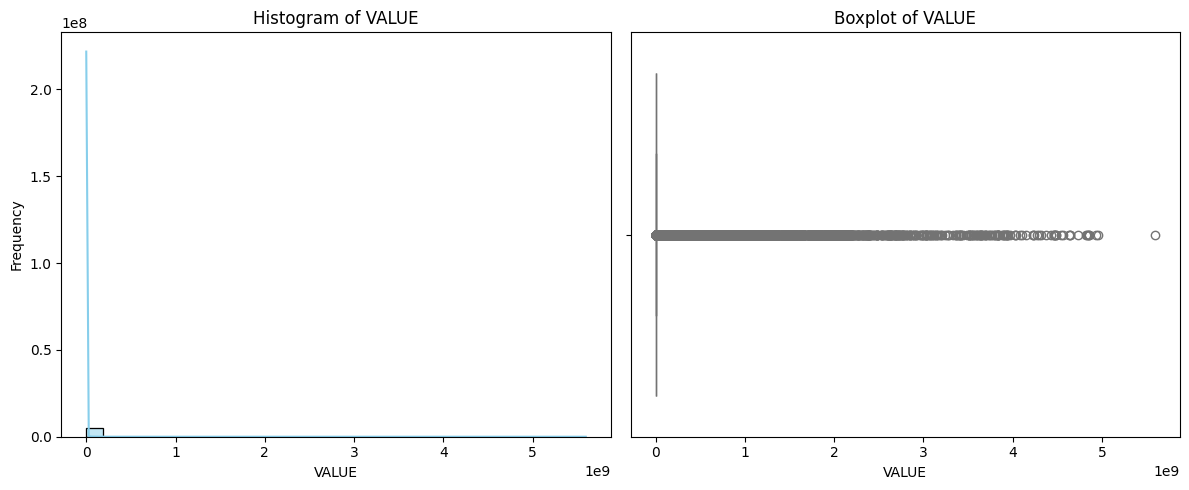


Summary Statistics for SHIPWT:
count    5.209198e+06
mean     9.365320e+05
std      3.685745e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.810000e+02
max      8.563936e+09
Name: SHIPWT, dtype: float64


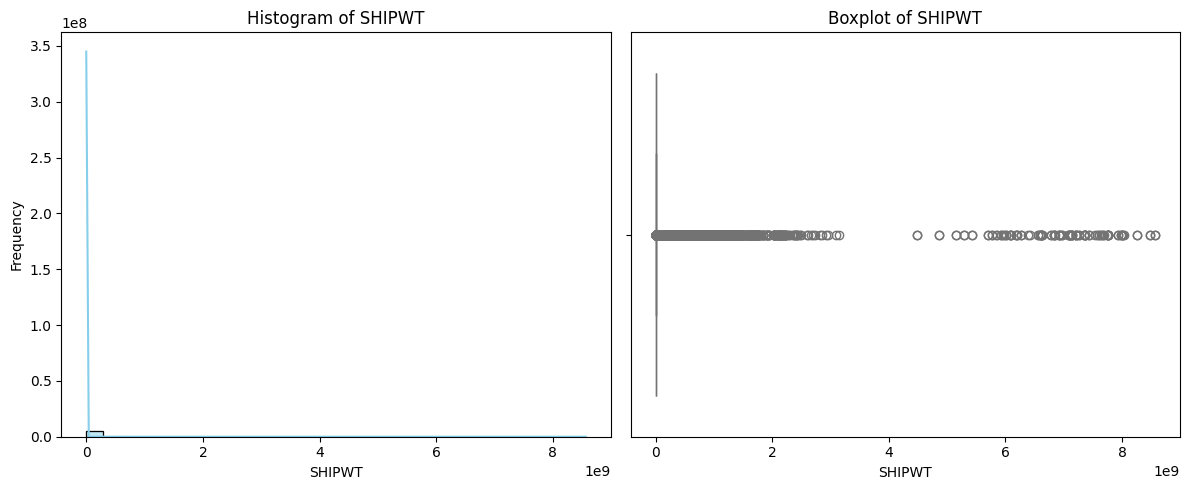


Summary Statistics for FREIGHT_CHARGES:
count    5.209198e+06
mean     3.023710e+04
std      9.257126e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.420000e+02
75%      2.438000e+03
max      2.487214e+08
Name: FREIGHT_CHARGES, dtype: float64


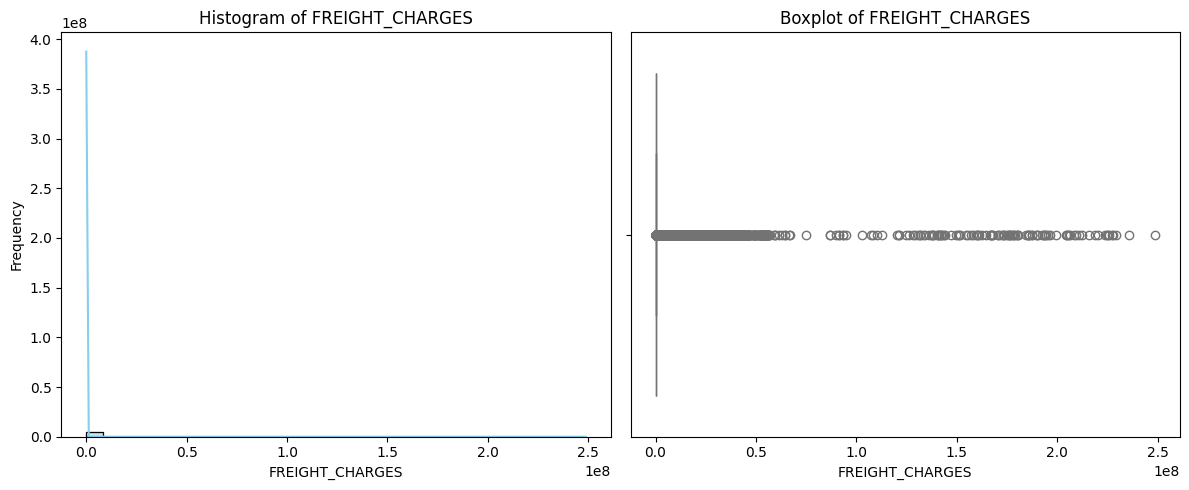


Summary Statistics for COMMODITY2:
count    5.209198e+06
mean     4.221957e+01
std      3.464605e+01
min      0.000000e+00
25%      0.000000e+00
50%      3.900000e+01
75%      7.600000e+01
max      9.900000e+01
Name: COMMODITY2, dtype: float64


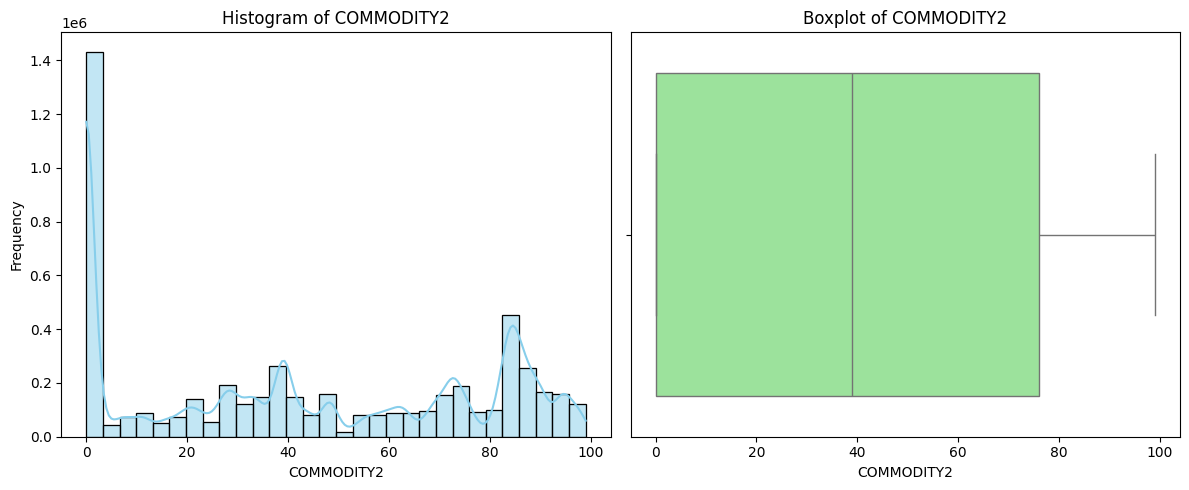

In [61]:
# List of numerical columns
numerical_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'COMMODITY2']

# Perform univariate analysis
for col in numerical_cols:
    # Compute basic statistics
    stats = dfn[col].describe()
    
    print(f"\nSummary Statistics for {col}:")
    print(stats)
    
    # Visualization
    plt.figure(figsize=(12, 5))

    # Histogram for distribution
    plt.subplot(1, 2, 1)
    sns.histplot(dfn[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Boxplot for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dfn[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()



Univariate Analysis for TRDTYPE:
  TRDTYPE    Count  Percentage (%)
0  Export  3610740       69.314701
1  Import  1598458       30.685299


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


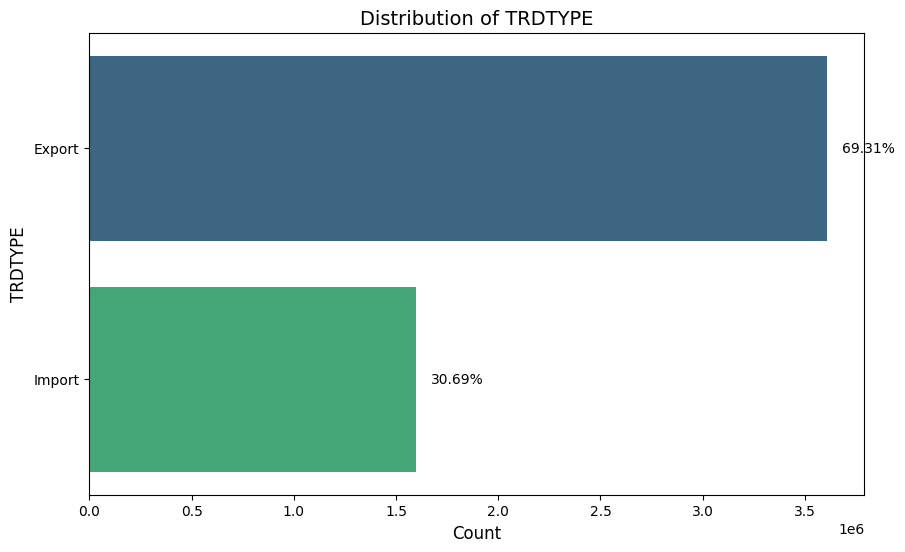


Univariate Analysis for USASTATE:
                USASTATE   Count  Percentage (%)
0                  Texas  310355        5.993499
1             California  269118        5.197140
2               Illinois  218062        4.211159
3                   Ohio  176404        3.406670
4           Pennsylvania  172986        3.340663
5               New York  172743        3.335970
6                Florida  168339        3.250921
7               Michigan  160781        3.104963
8                Georgia  157111        3.034089
9             New Jersey  156209        3.016670
10             Wisconsin  149296        2.883167
11        North Carolina  147614        2.850685
12               Indiana  137796        2.661082
13             Minnesota  133375        2.575705
14             Tennessee  131837        2.546003
15         Massachusetts  126794        2.448614
16            Washington  125858        2.430539
17               Arizona  119112        2.300261
18              Missouri  117173  

C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


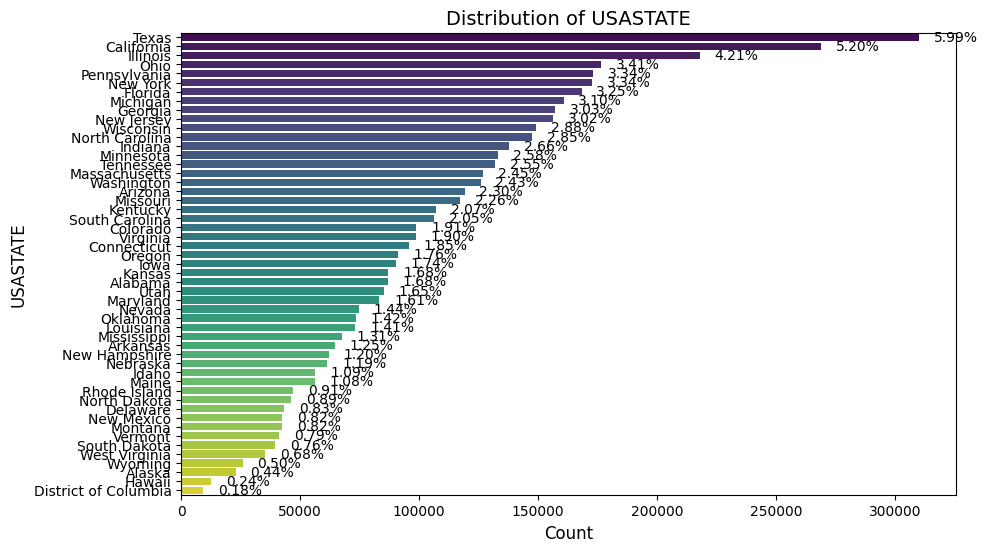


Univariate Analysis for DISAGMOT:
                     DISAGMOT    Count  Percentage (%)
0                       Truck  3570139       68.535291
1                         Air   930214       17.857144
2                        Rail   439567        8.438286
3                       Other   195632        3.755511
4                      Vessel    45101        0.865795
5  Foreign Trade Zones (FTZs)    13158        0.252592
6                    Pipeline    10059        0.193101
7  Mail (U.S. Postal Service)     5328        0.102281


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


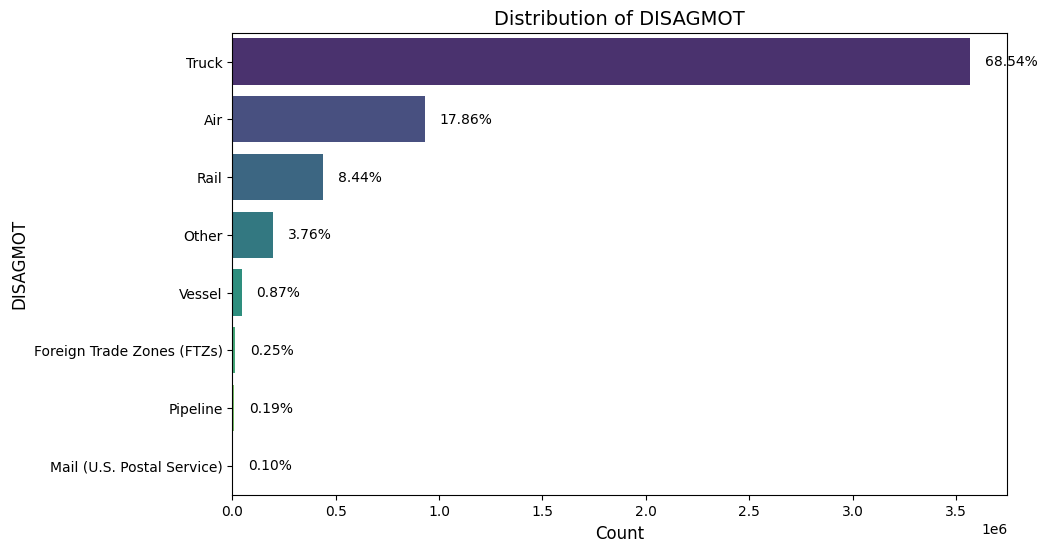


Univariate Analysis for MEXSTATE:
               MEXSTATE   Count  Percentage (%)
0      Estado de Mexico  161671       10.434244
1            Nuevo Leon  144916        9.352877
2             Chihuahua  107361        6.929078
3       Baja California  106487        6.872670
4      Distrito Federal   96938        6.256377
5               Jalisco   91074        5.877915
6                Sonora   80236        5.178430
7            Tamaulipas   78605        5.073166
8              Coahuila   75872        4.896778
9             Queretaro   75362        4.863863
10           Guanajuato   68703        4.434091
11        State Unknown   68106        4.395560
12      San Luis Potosi   55340        3.571643
13             Campeche   49108        3.169430
14               Puebla   40036        2.583923
15       Aguascalientes   38560        2.488662
16              Sinaloa   29061        1.875597
17              Durango   25817        1.666229
18              Hidalgo   22324        1.440791
19   

C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


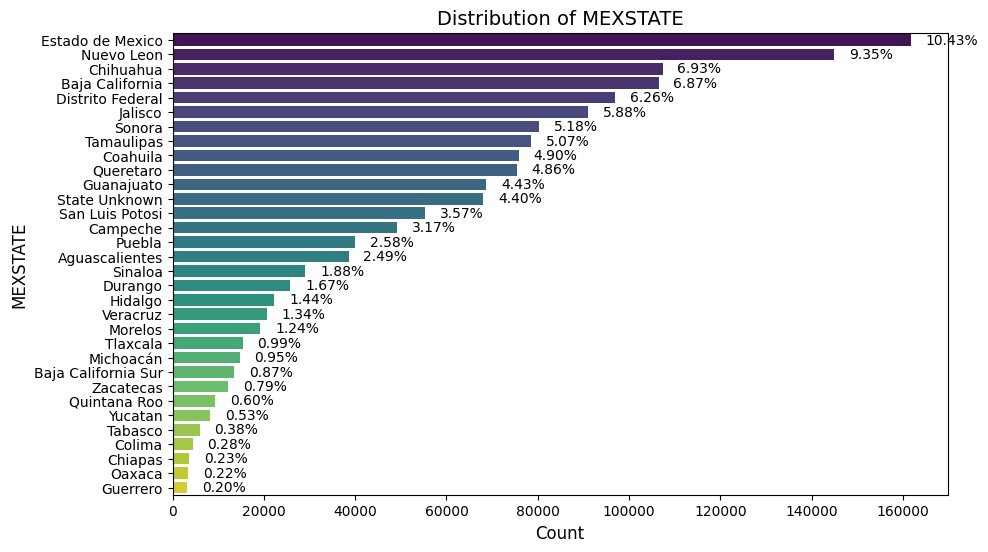


Univariate Analysis for CANPROV:
                  CANPROV   Count  Percentage (%)
0                 Ontario  905038       27.842765
1                  Quebec  593071       18.245352
2        British Columbia  518984       15.966125
3                 Alberta  431281       13.268013
4                Manitoba  358571       11.031148
5            Saskatchewan  177134        5.449385
6           New Brunswick  146629        4.510923
7             Nova Scotia   69816        2.147833
8    Prince Edward Island   25848        0.795193
9            Newfoundland   15418        0.474322
10       Province Unknown    5824        0.179171
11        Yukon Territory    2375        0.073065
12  Northwest Territories     439        0.013505
13                Nunavut     104        0.003199


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


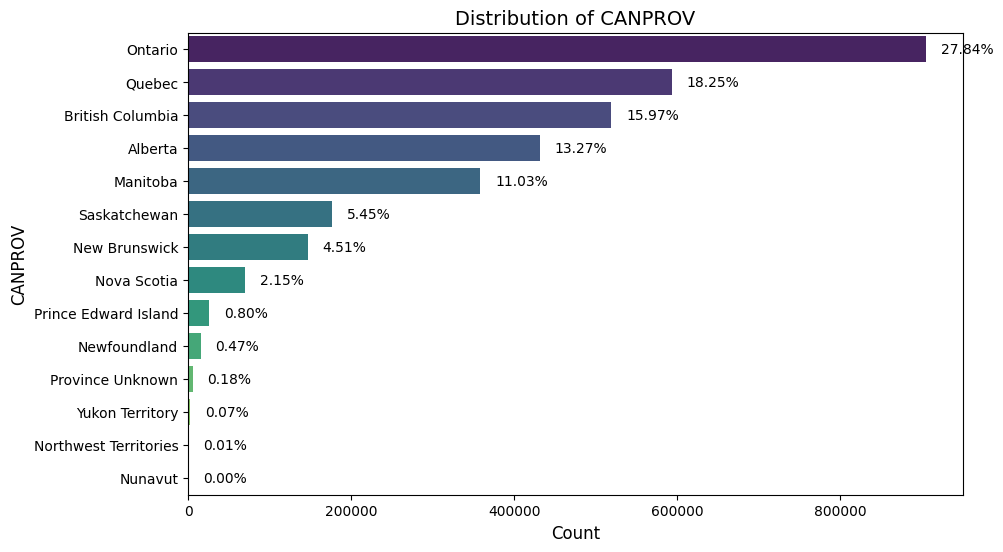


Univariate Analysis for COUNTRY:
  COUNTRY    Count  Percentage (%)
0  Canada  3250532       62.399855
1  Mexico  1958666       37.600145


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


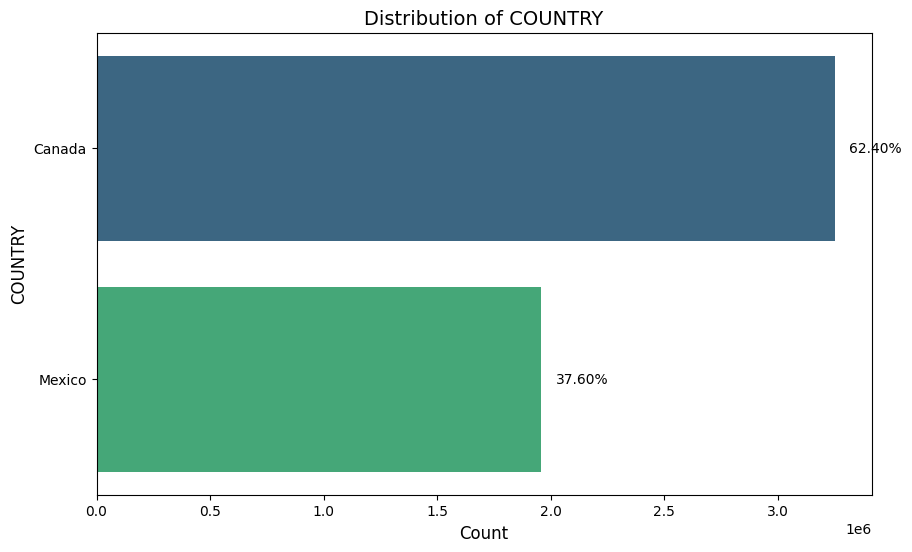


Univariate Analysis for DF:
                   DF    Count  Percentage (%)
0  domestic pr. merch  2398084       66.415305
1   foreign pr. merch  1212656       33.584695


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


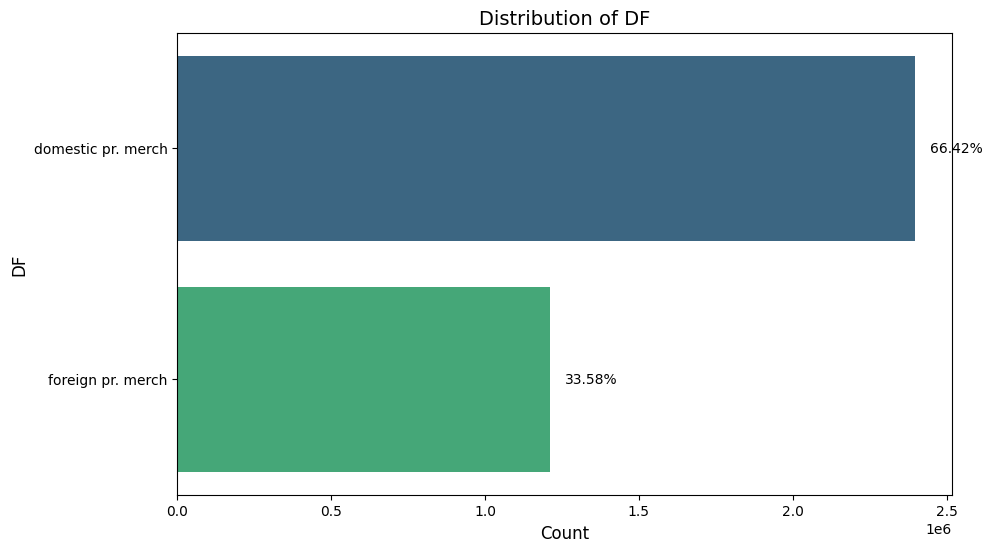


Univariate Analysis for CONTCODE:
            CONTCODE    Count  Percentage (%)
0  Non-Containerized  3160954       60.680243
1      Containerized  2048244       39.319757


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


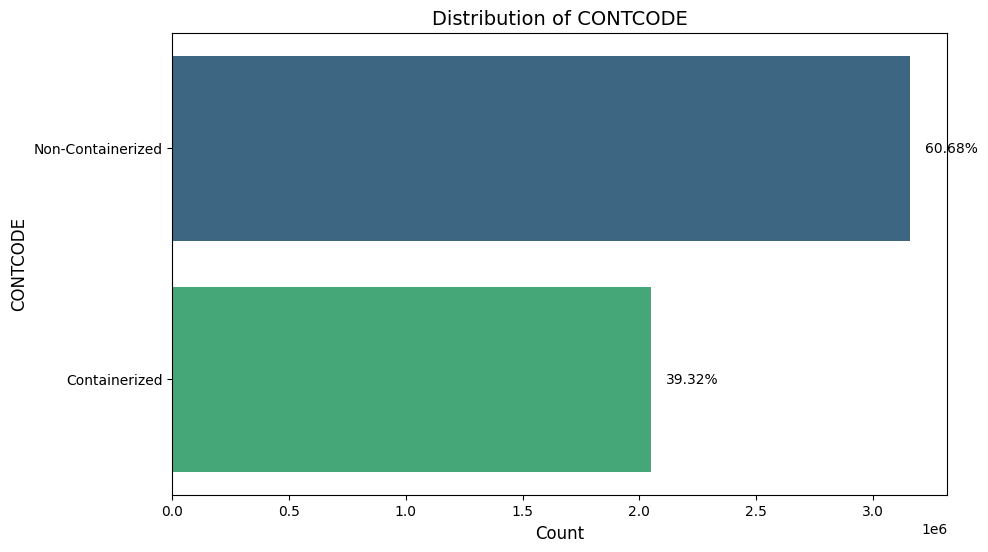


Univariate Analysis for MONTH:
        MONTH   Count  Percentage (%)
0       March  496471        9.530661
1      August  486792        9.344855
2        June  485132        9.312988
3   September  483423        9.280181
4        July  481405        9.241442
5         May  480655        9.227044
6       April  479098        9.197155
7    February  472960        9.079325
8     January  468686        8.997278
9     October  296176        5.685635
10   November  292564        5.616296
11   December  285836        5.487140


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


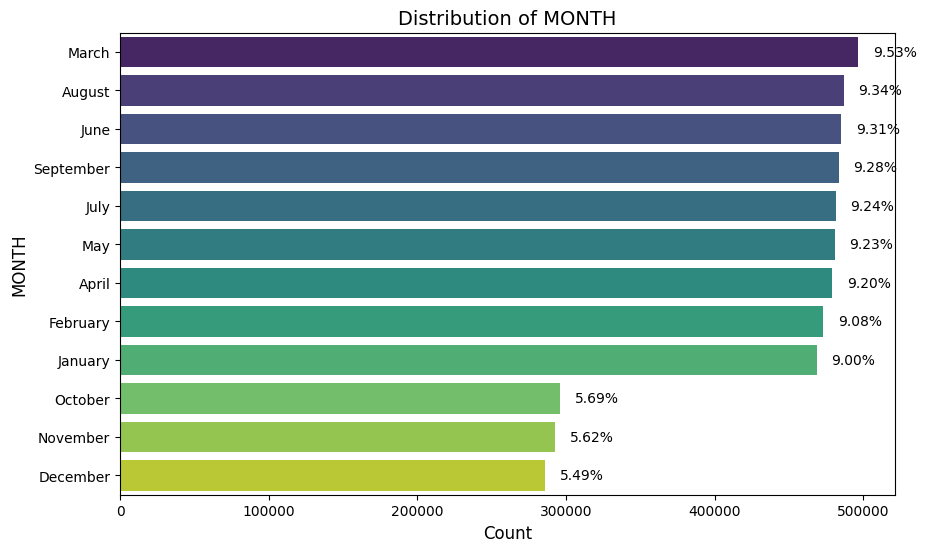


Univariate Analysis for YEAR:
   YEAR    Count  Percentage (%)
0  2023  1185477       22.757380
1  2022  1174433       22.545371
2  2021  1141544       21.914007
3  2024   901506       17.306042
4  2020   806238       15.477200


C:\Users\DELL\AppData\Local\Temp\ipykernel_26352\373672894.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


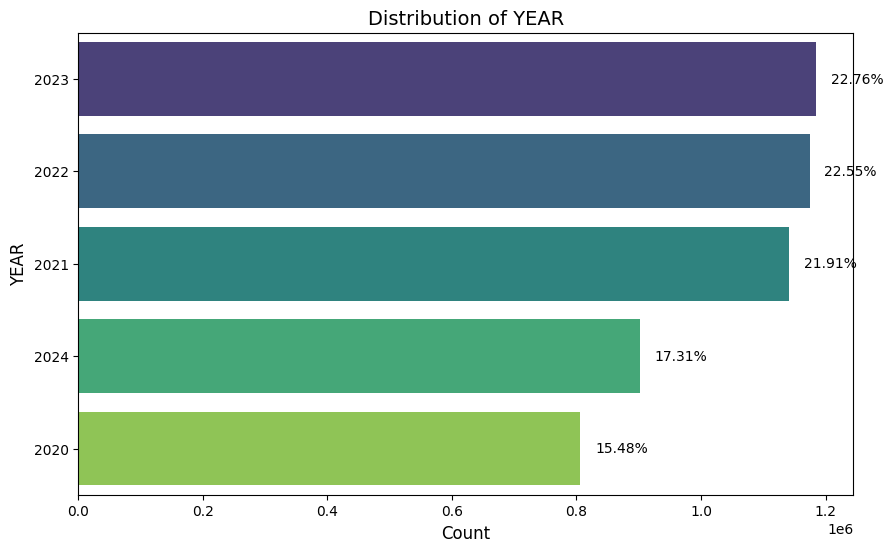

In [59]:
# categorical columns list
categorical_cols = ['TRDTYPE', 'USASTATE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 
                    'COUNTRY', 'DF', 'CONTCODE', 'MONTH', 'YEAR']

# Loop through categorical columns for univariate analysis
for col in categorical_cols:
    # Exclude unknown values
    filtered_data = dfn[dfn[col] != 'Unknown']
    
    # Calculate counts and percentages
    counts = filtered_data[col].value_counts()
    percentages = (counts / counts.sum()) * 100
    
    # Create a DataFrame for display
    summary_df = pd.DataFrame({
        'Count': counts,
        'Percentage (%)': percentages
    }).reset_index().rename(columns={'index': col})
    
    # Print the summary
    print(f"\nUnivariate Analysis for {col}:")
    print(summary_df)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=counts.values, 
        y=counts.index, 
        palette='viridis'
    )
    # Add percentages as text labels
    for i, v in enumerate(counts.values):
        plt.text(v + 0.02 * counts.max(), i, f"{percentages.iloc[i]:.2f}%", va='center')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()


### Bivariate Analysis

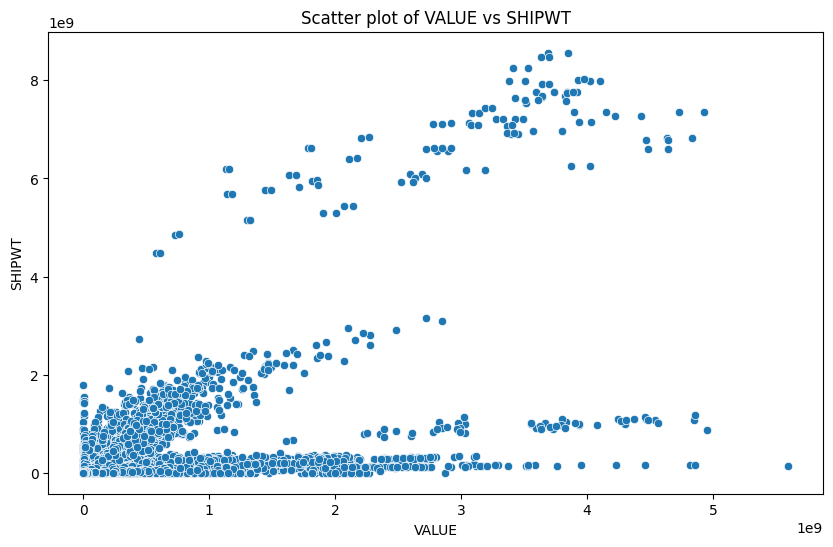

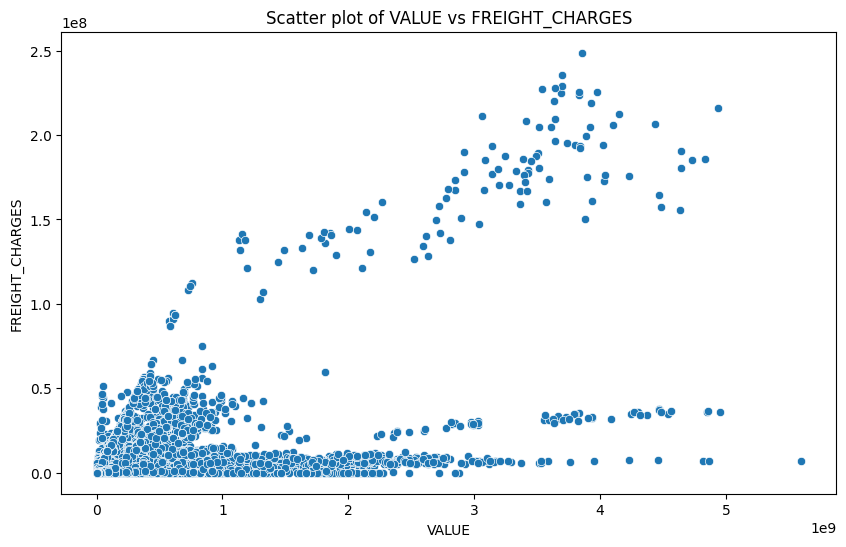

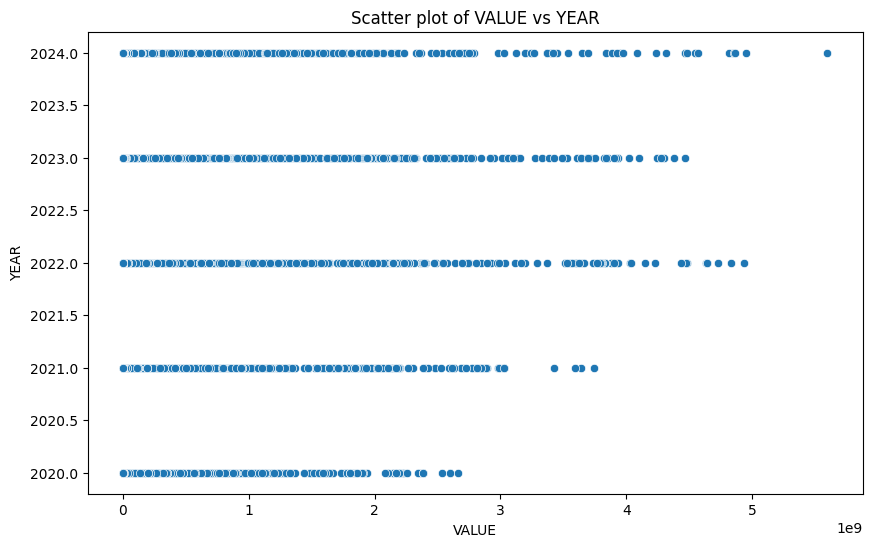

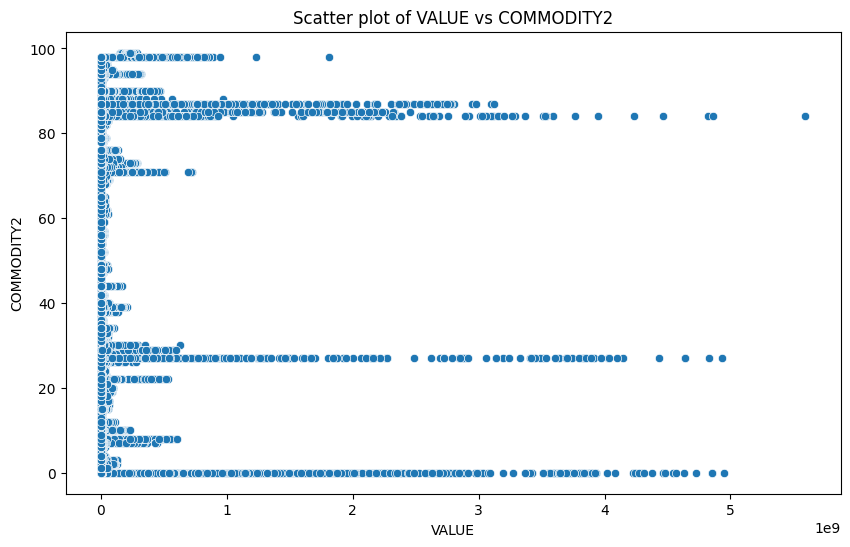

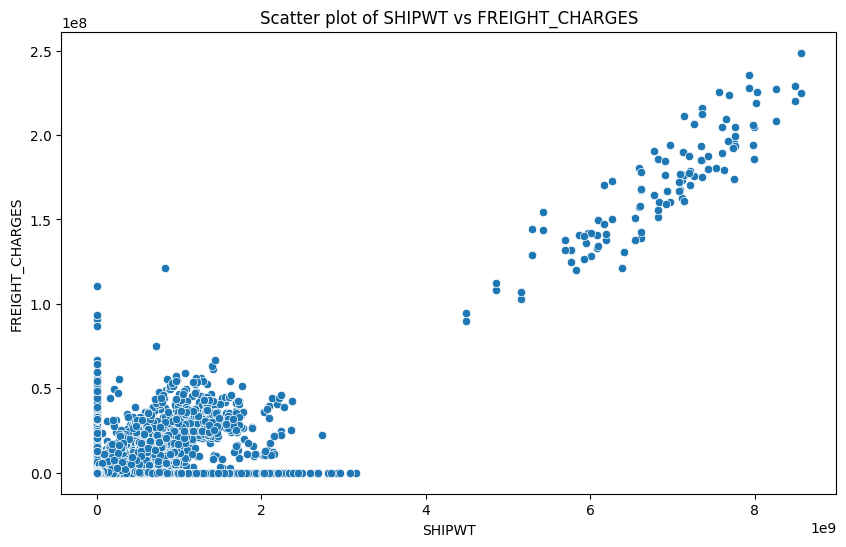

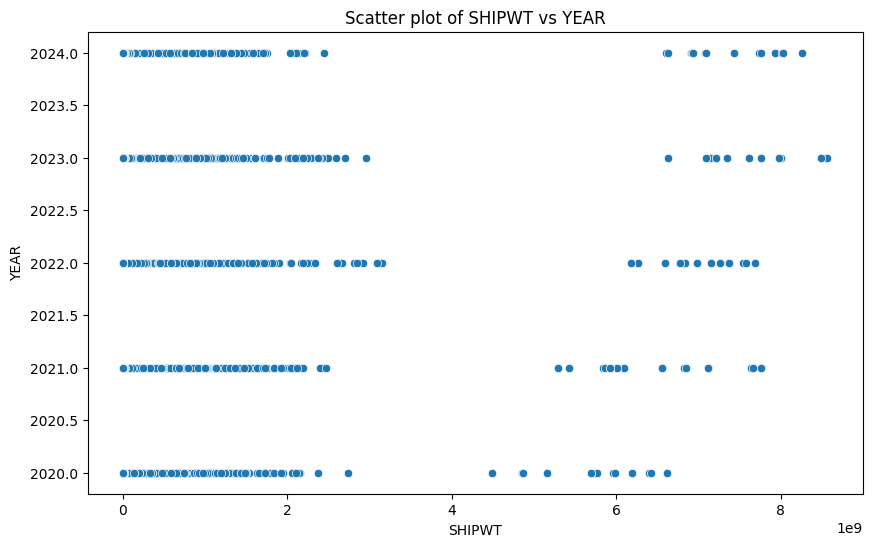

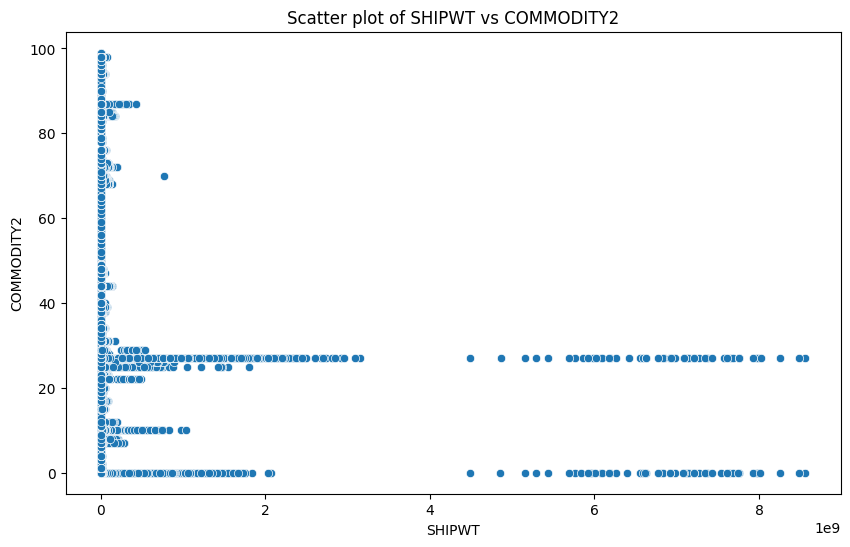

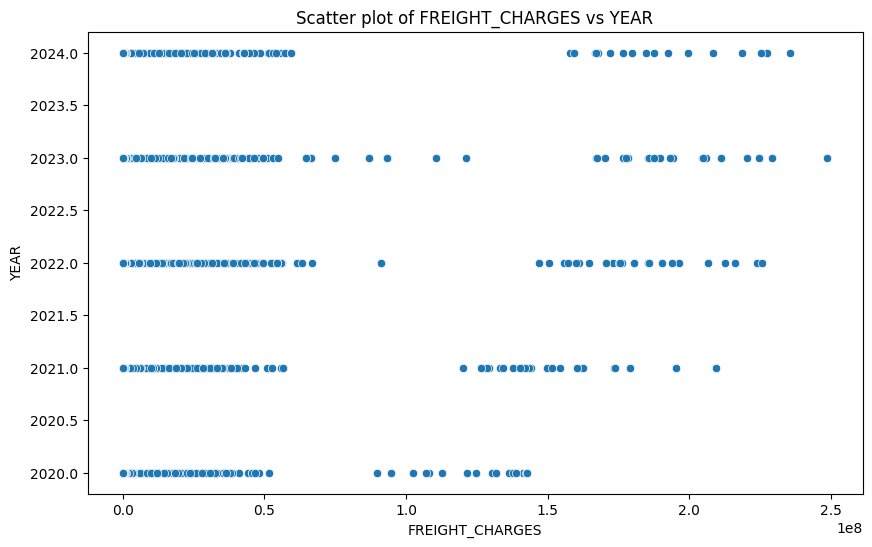

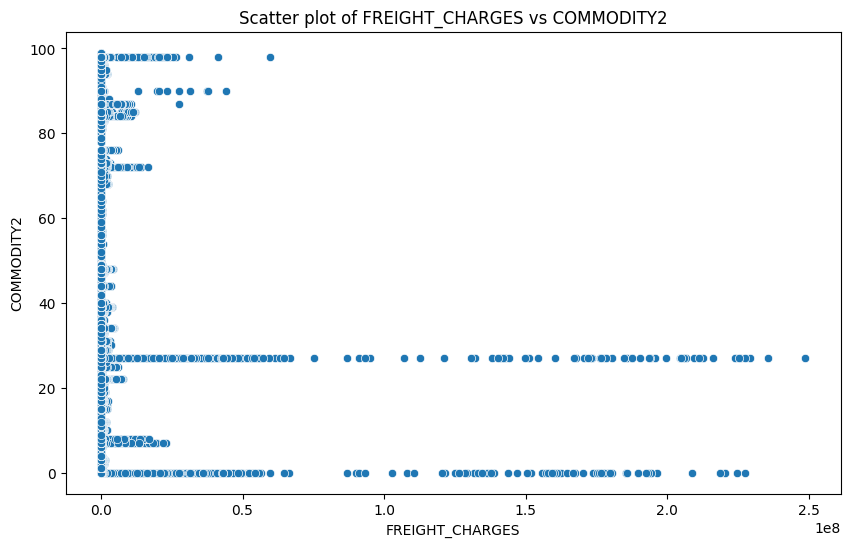

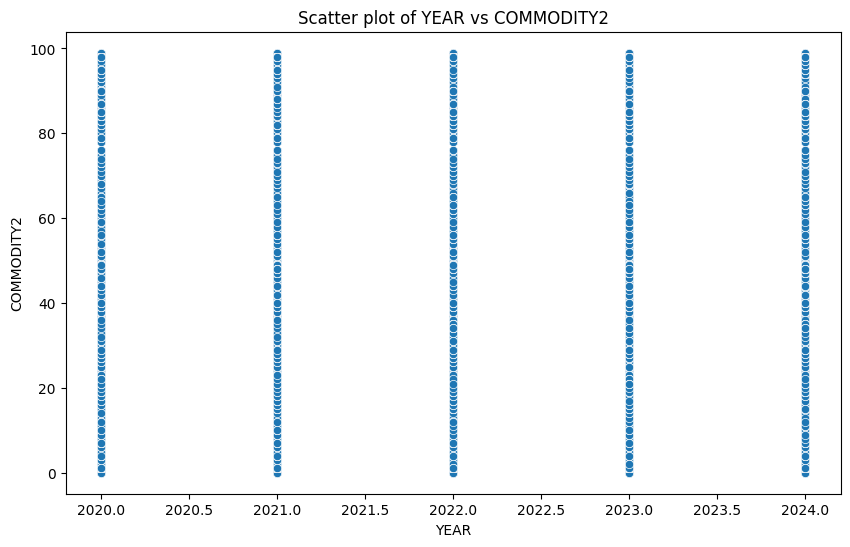

In [4]:
# Plot histograms for numerical features
numerical_features = dfn.select_dtypes(include=['int64']).columns


# Scatter plots for numerical features
for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=dfn, x=numerical_features[i], y=numerical_features[j])
        plt.title(f'Scatter plot of {numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.show()




Categorical vs Numerical Analysis:


C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


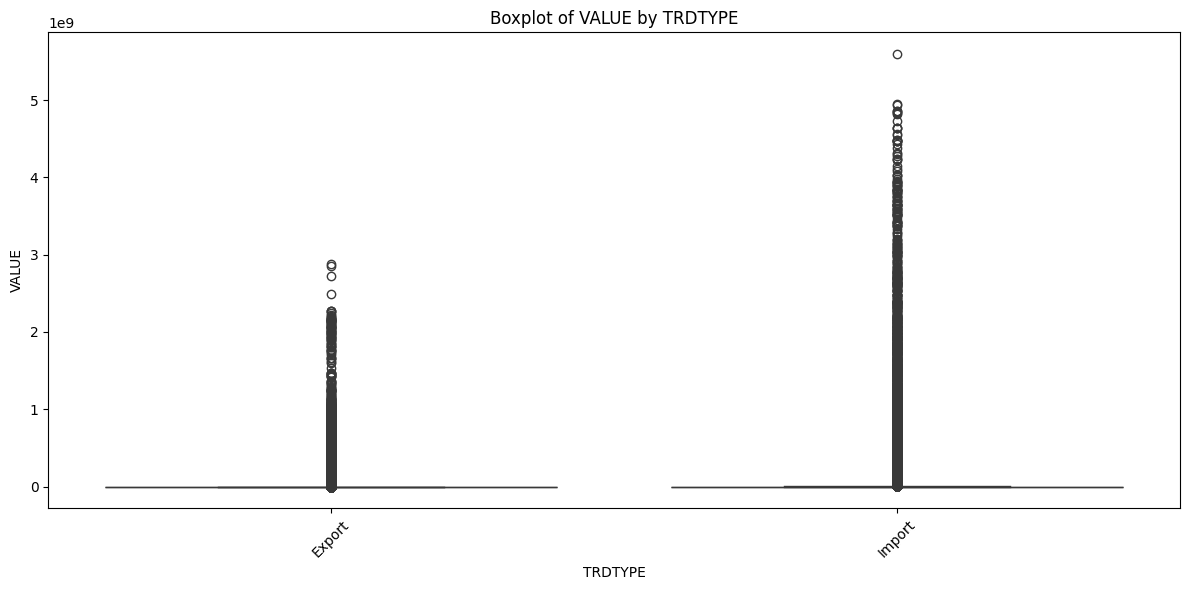

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


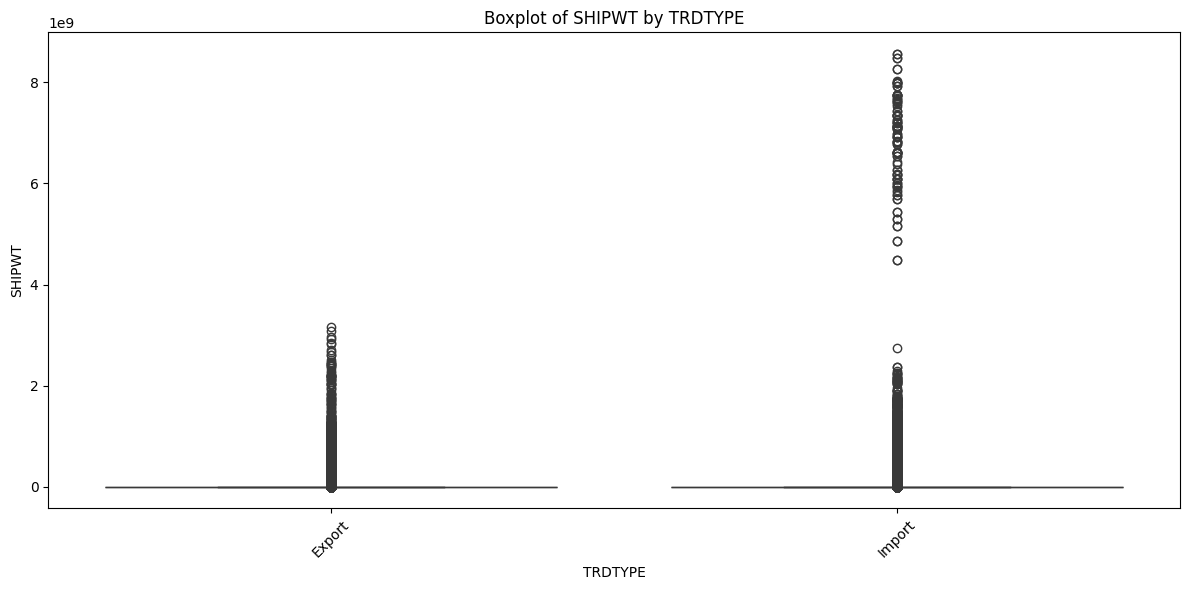

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


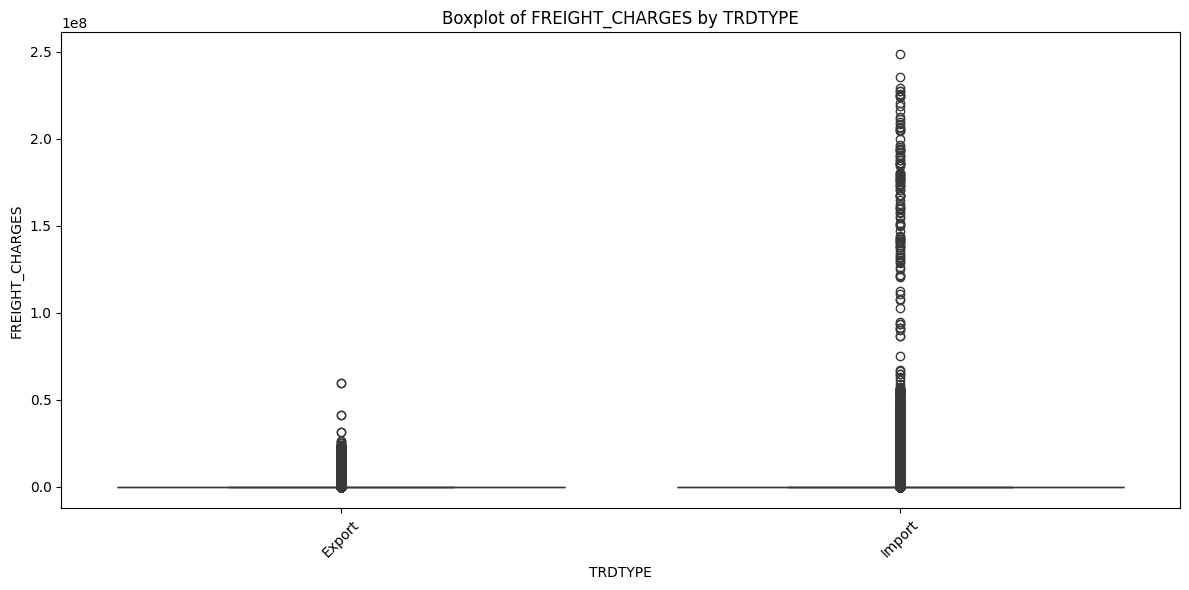

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


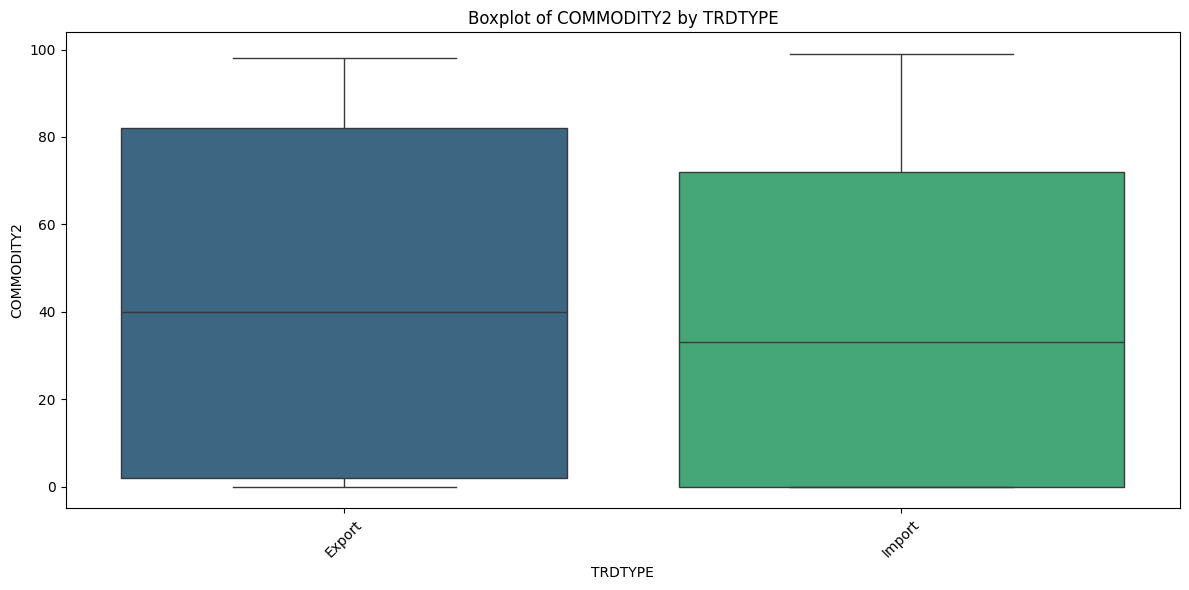

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


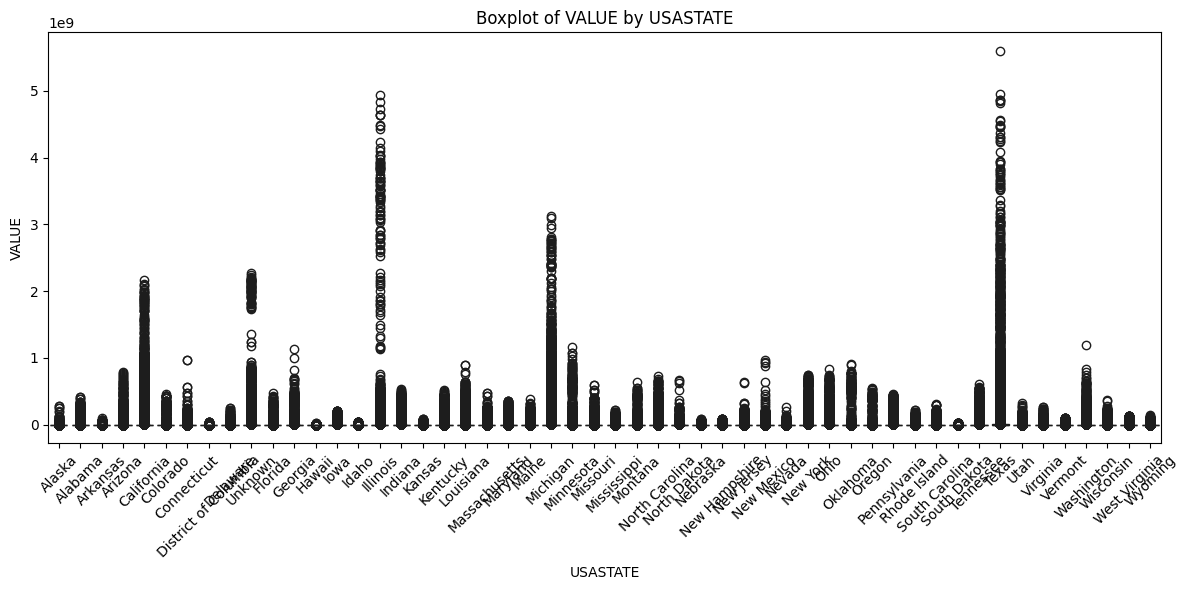

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


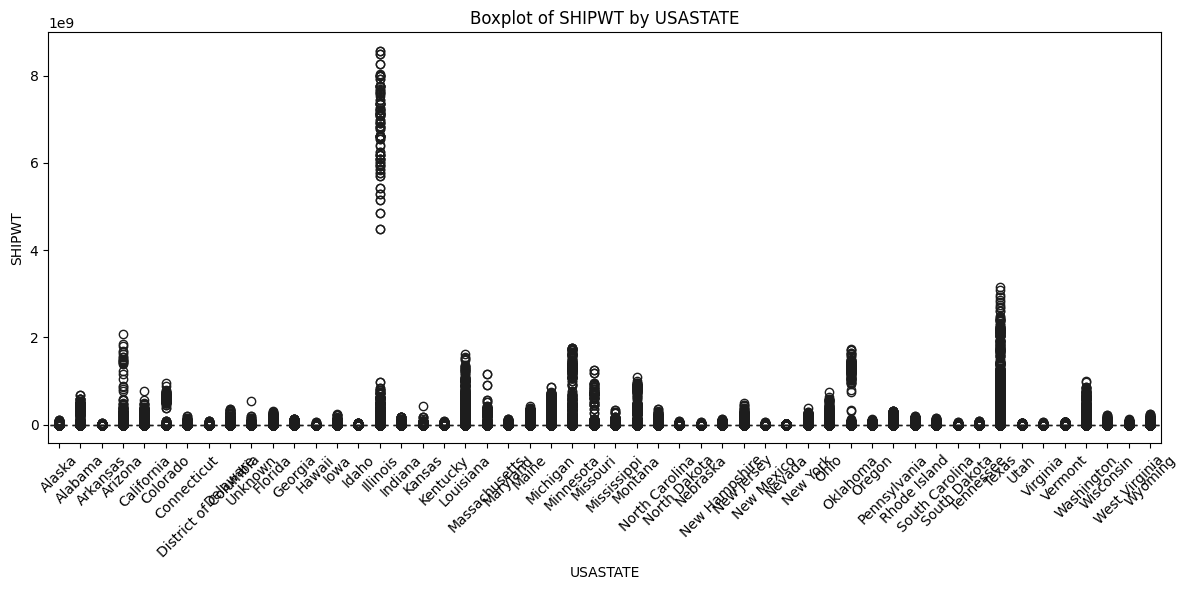

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


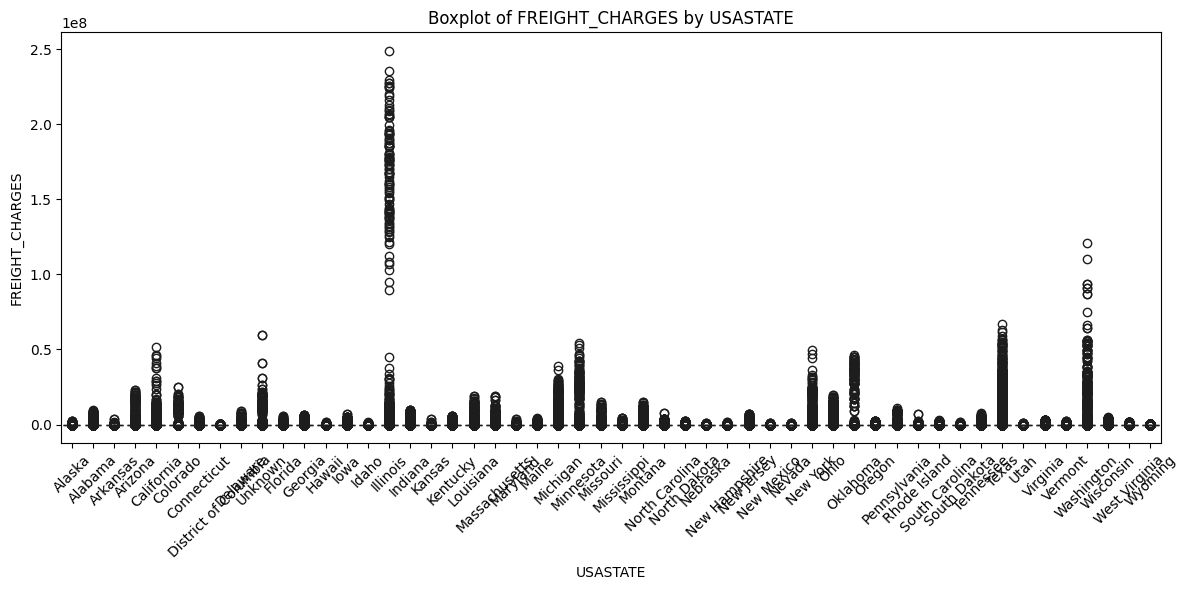

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


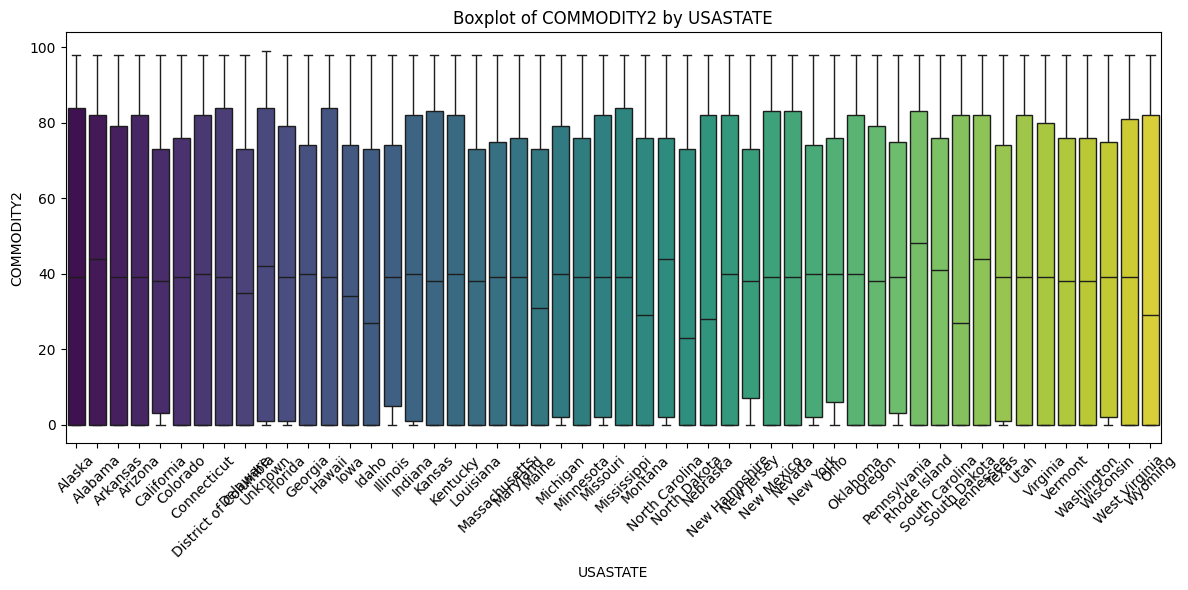

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


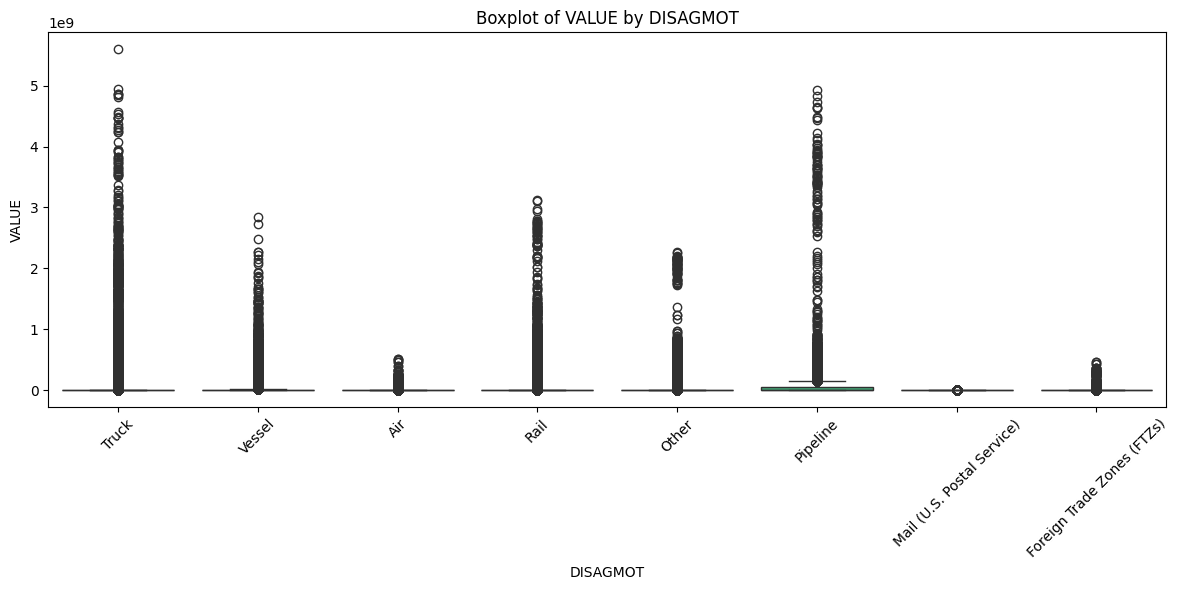

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


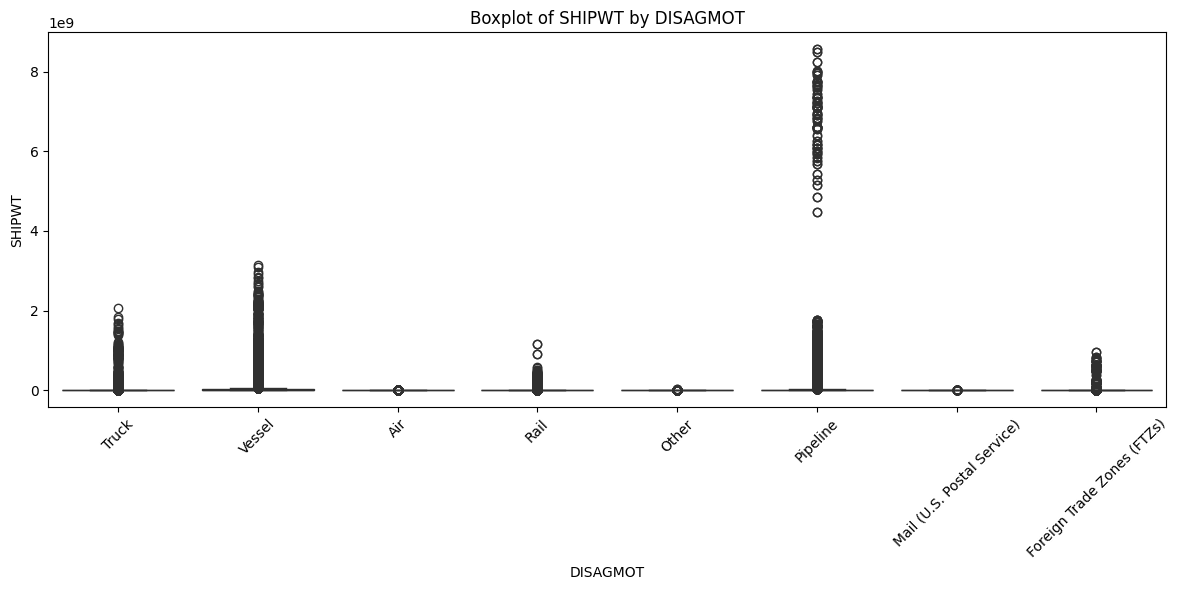

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


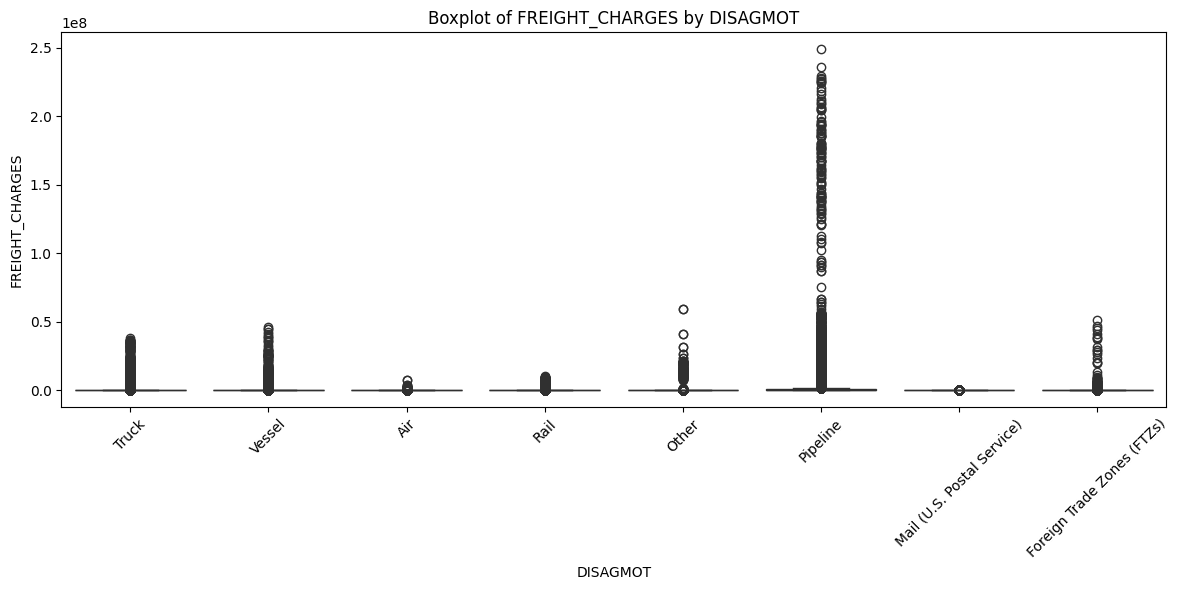

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


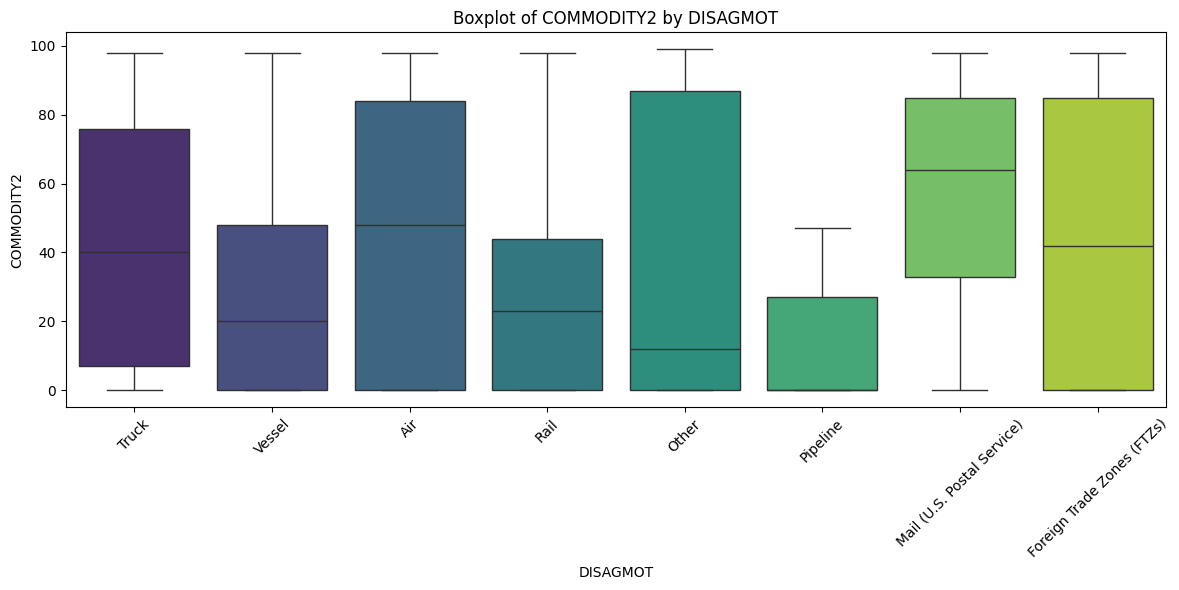

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


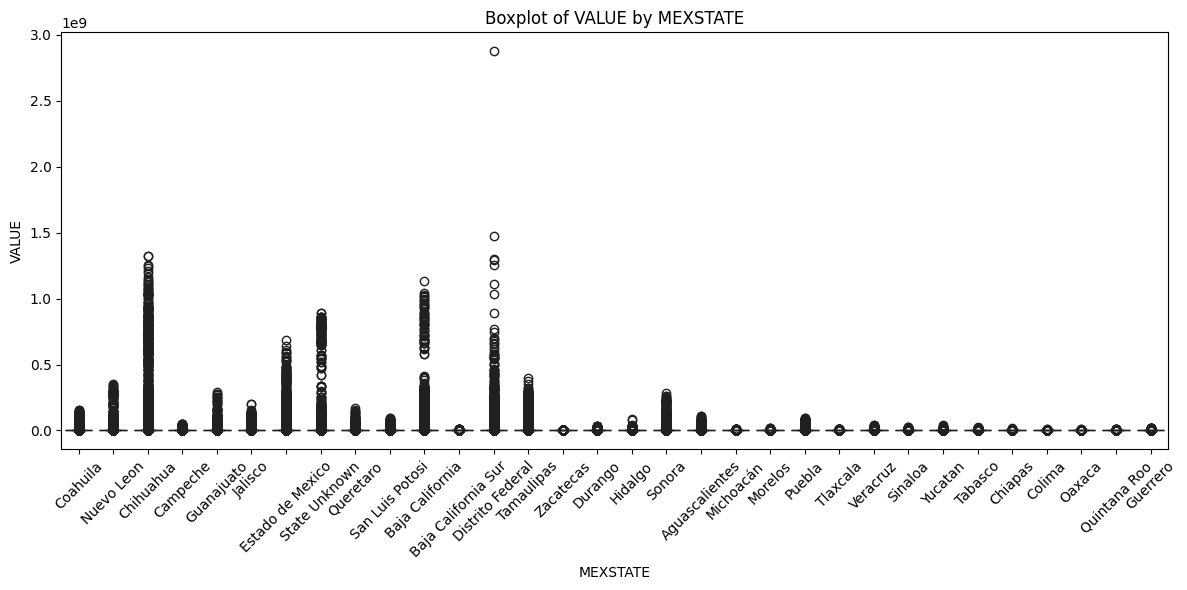

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


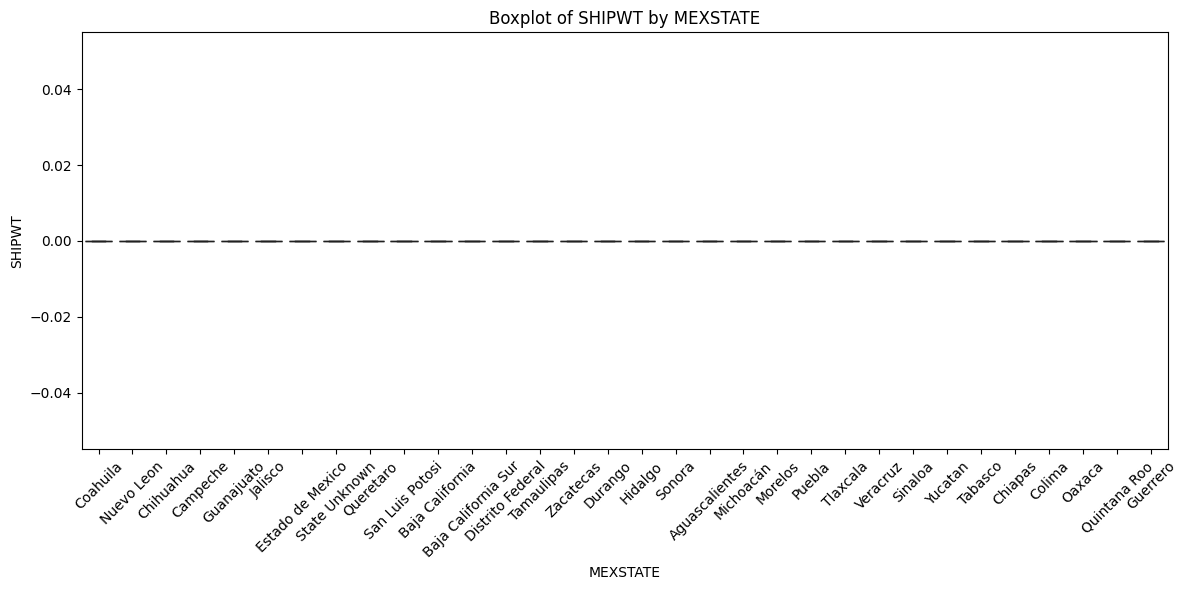

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


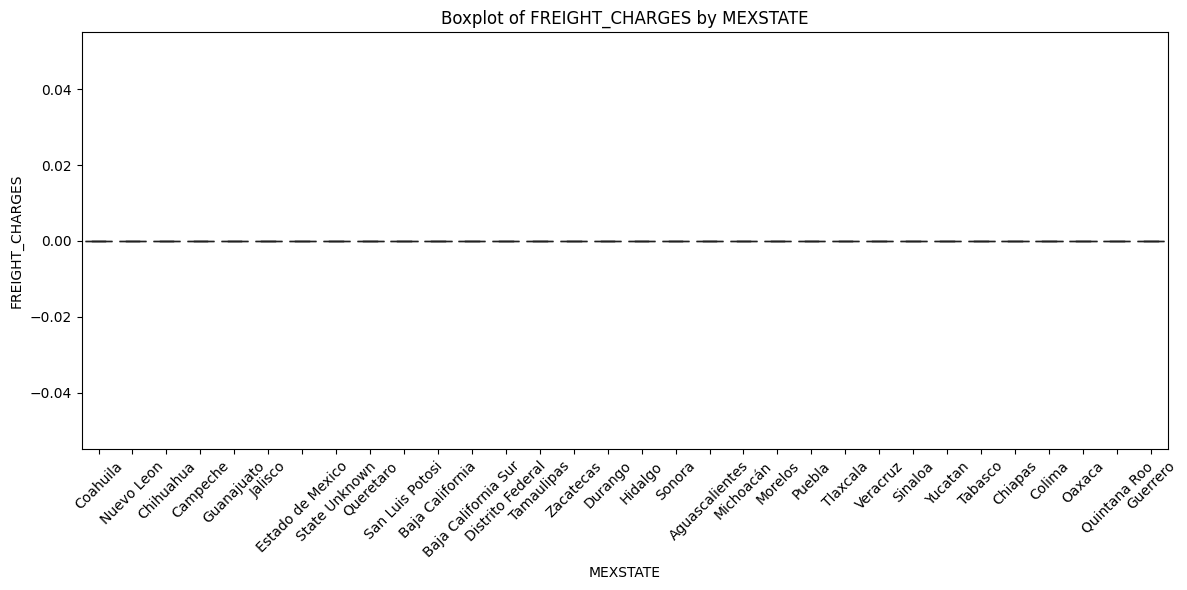

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


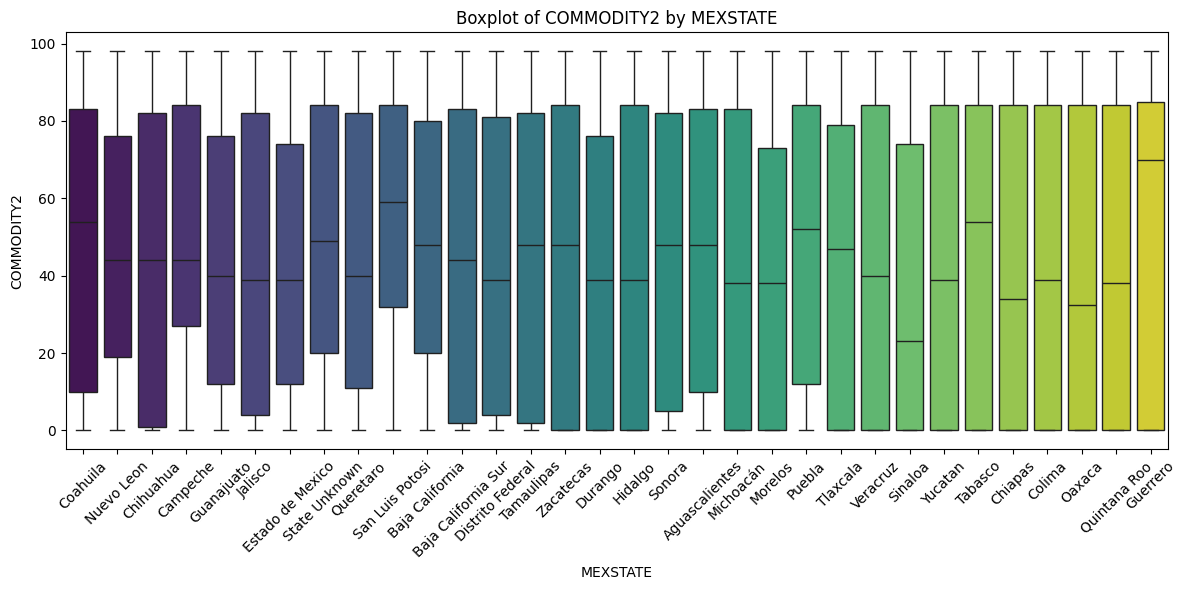

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


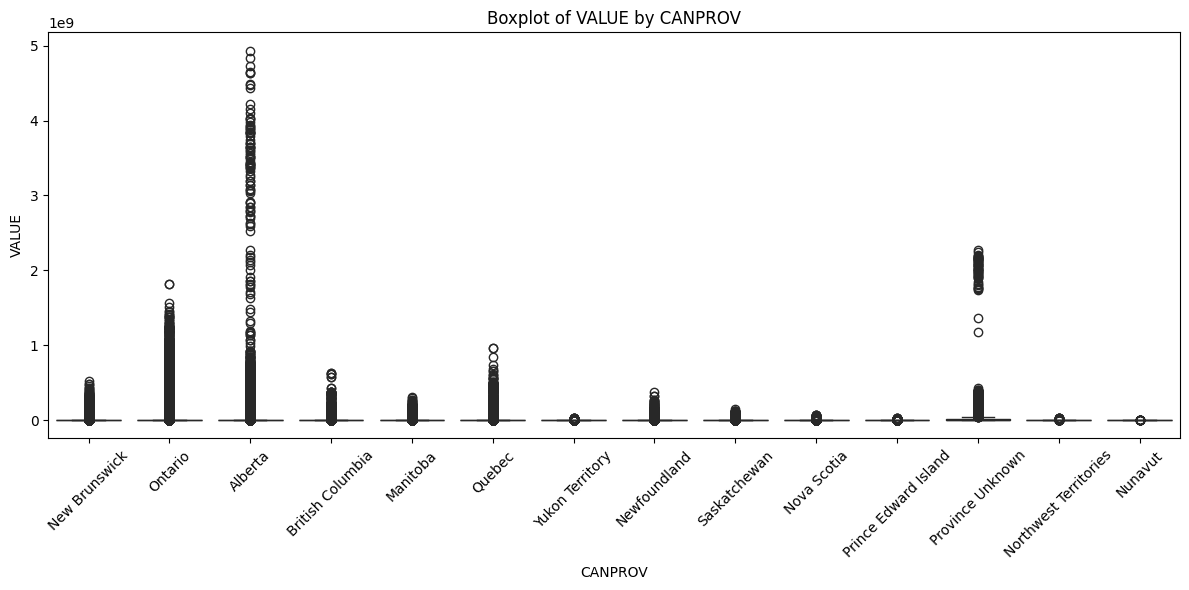

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


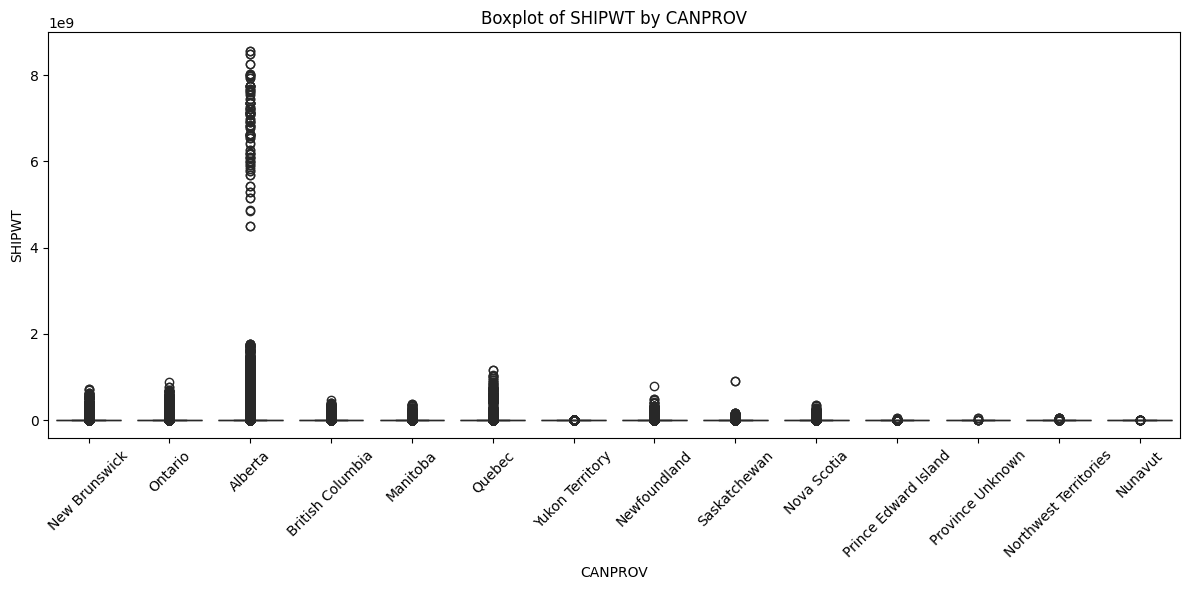

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


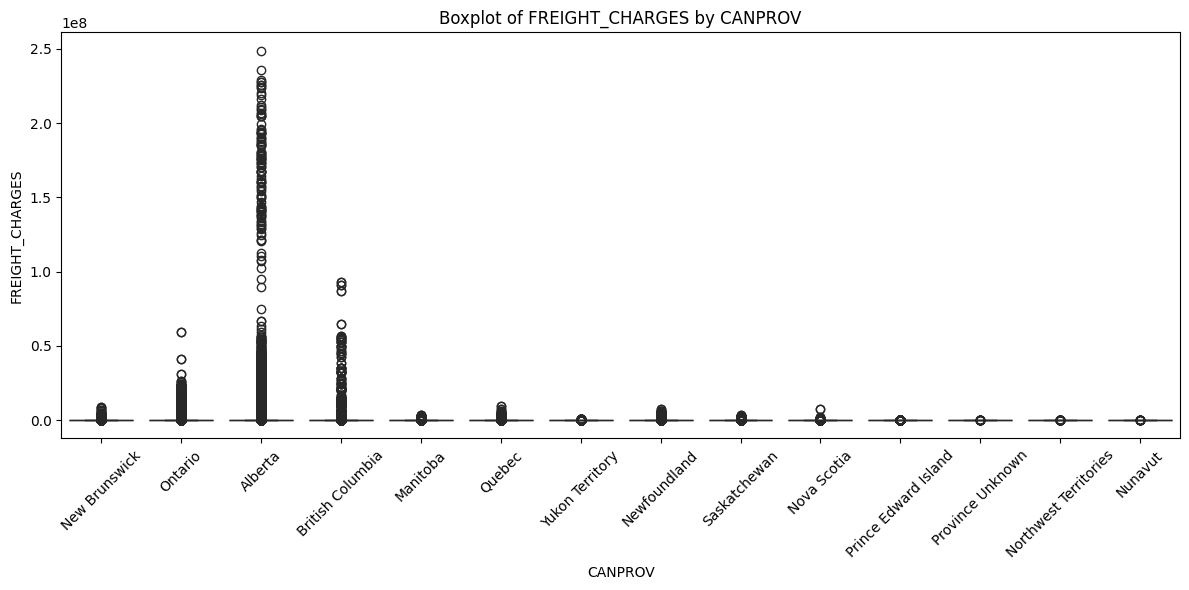

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


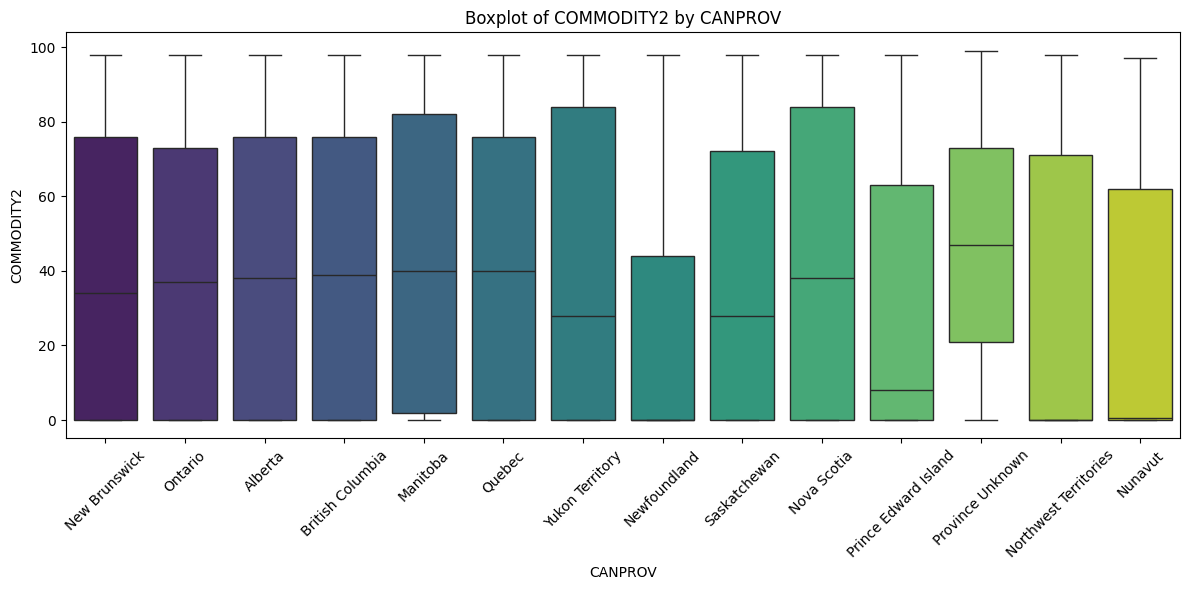

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


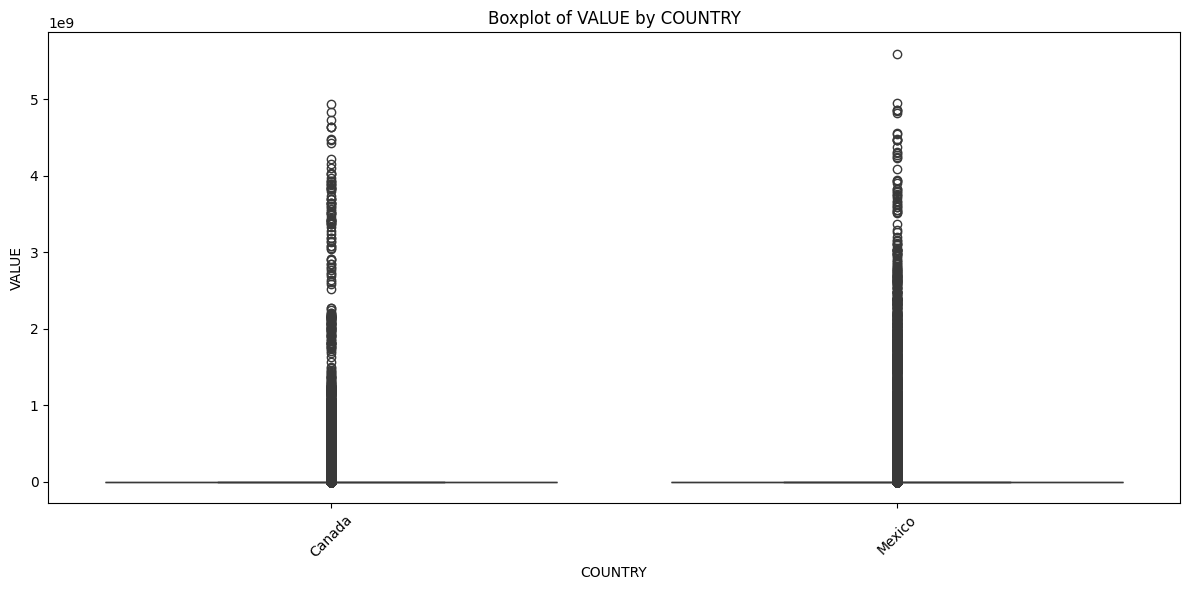

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


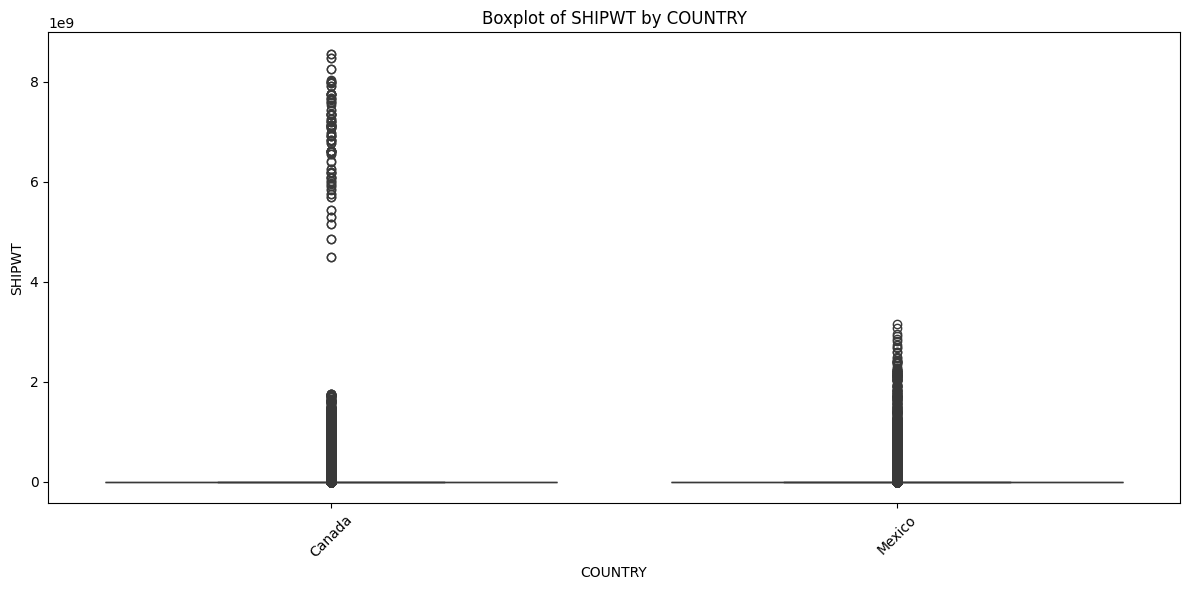

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


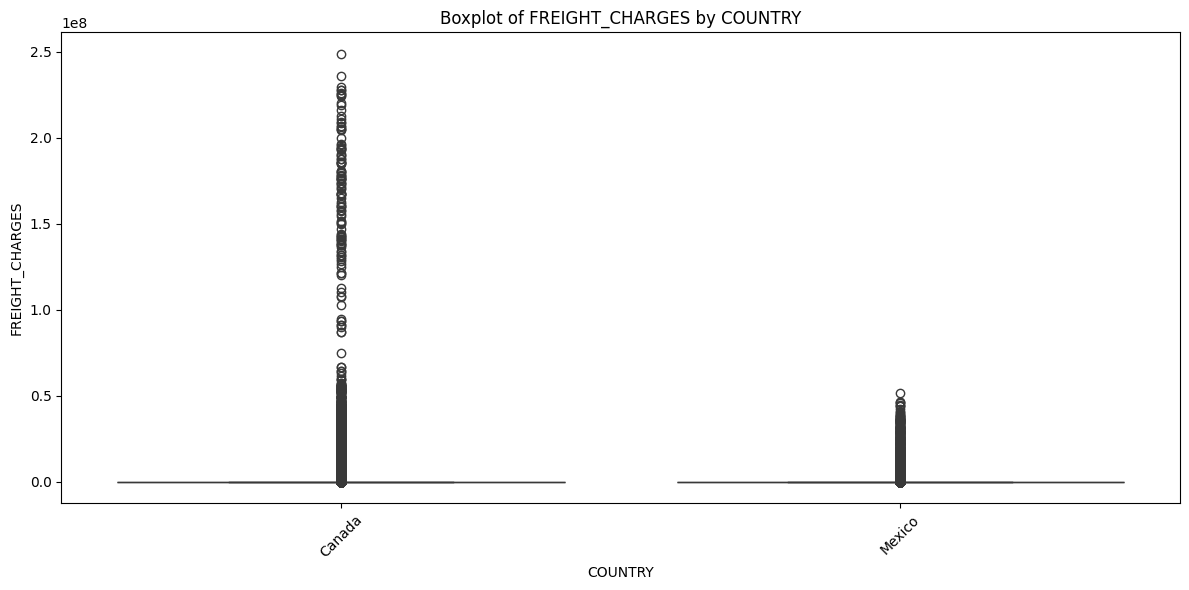

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


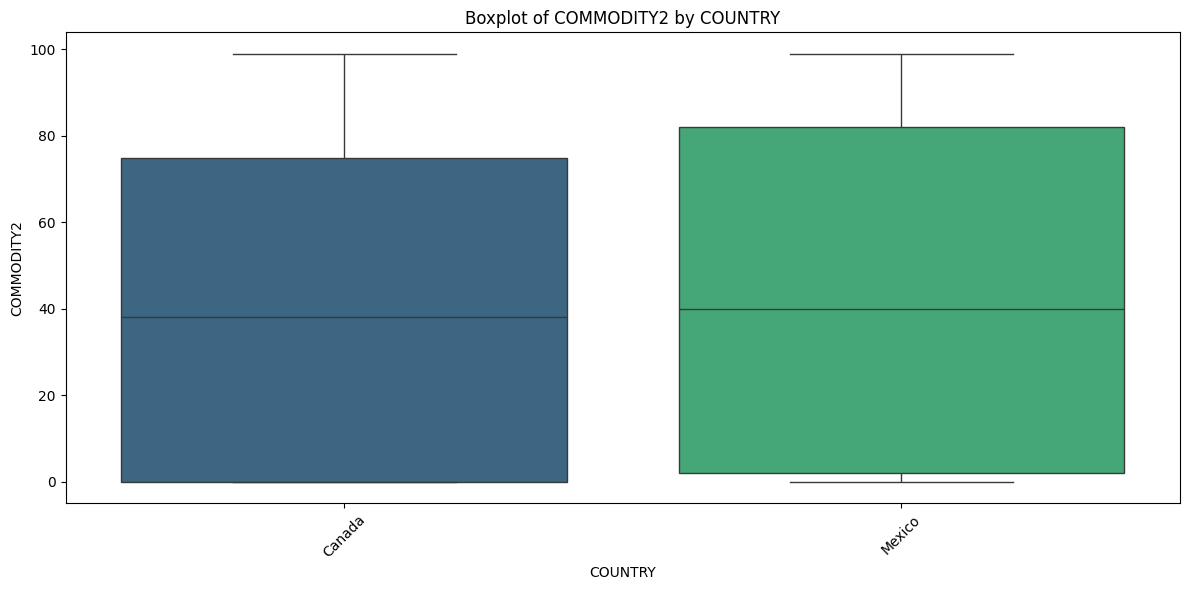

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


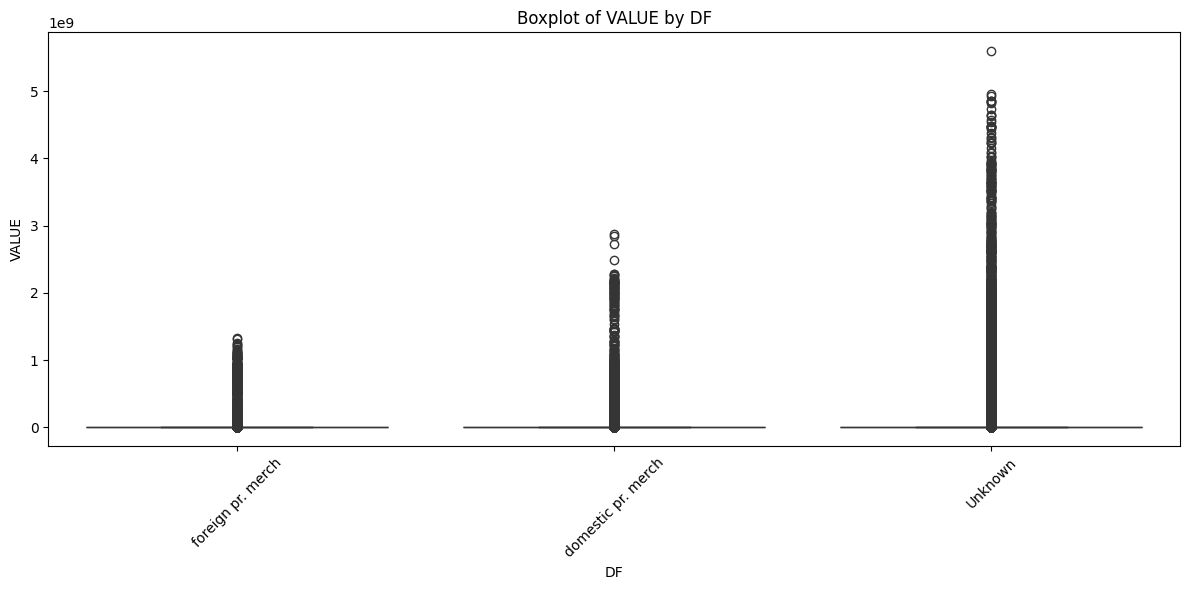

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


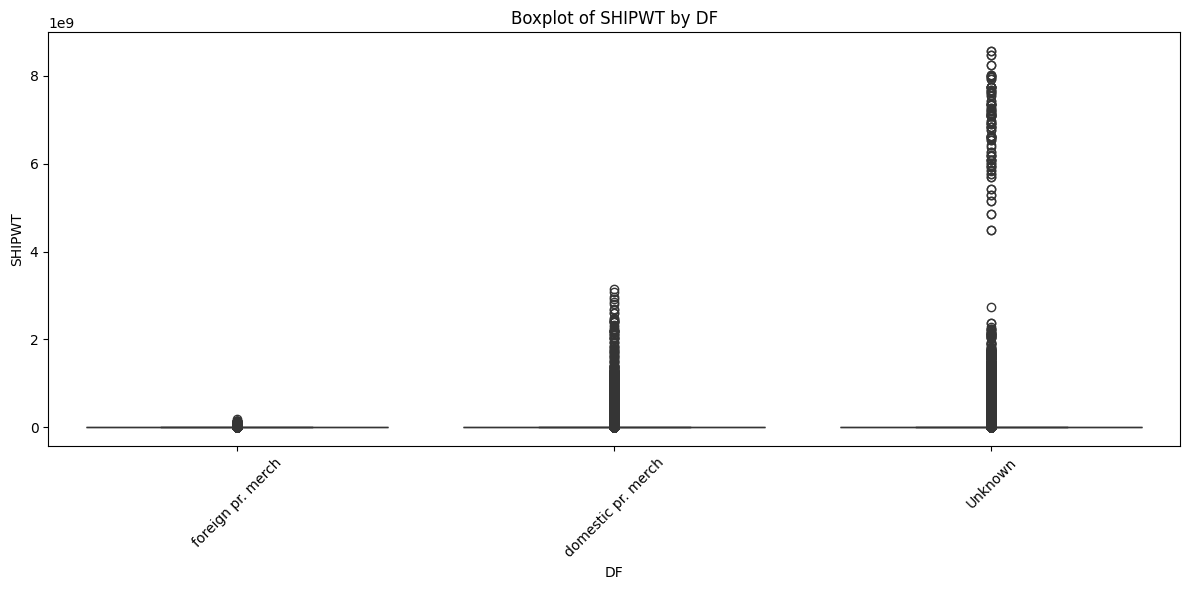

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


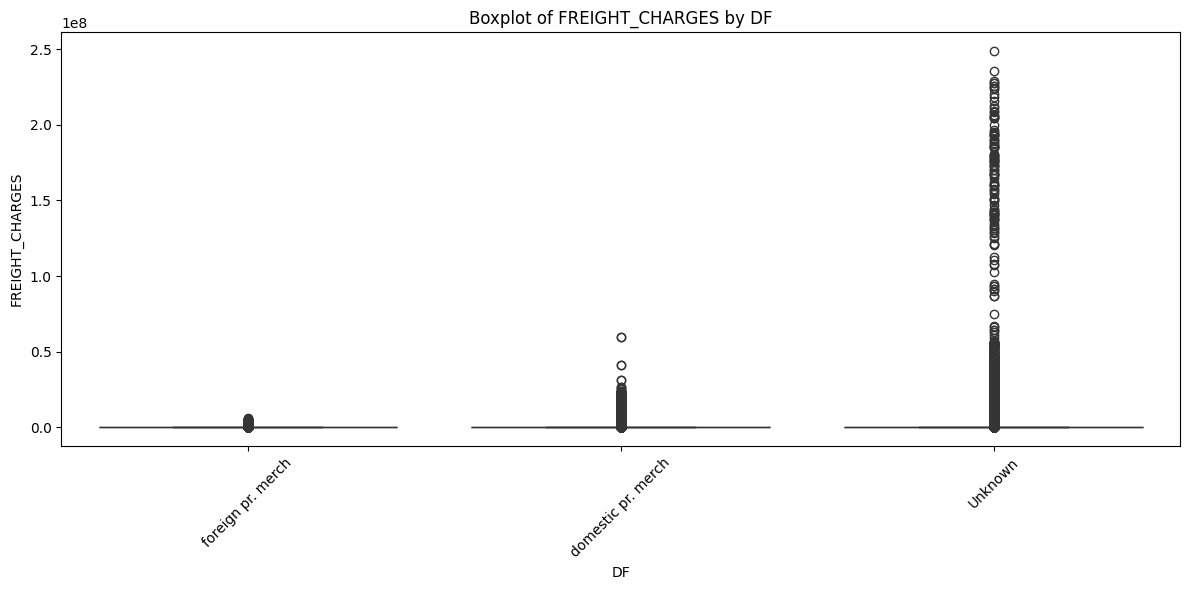

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


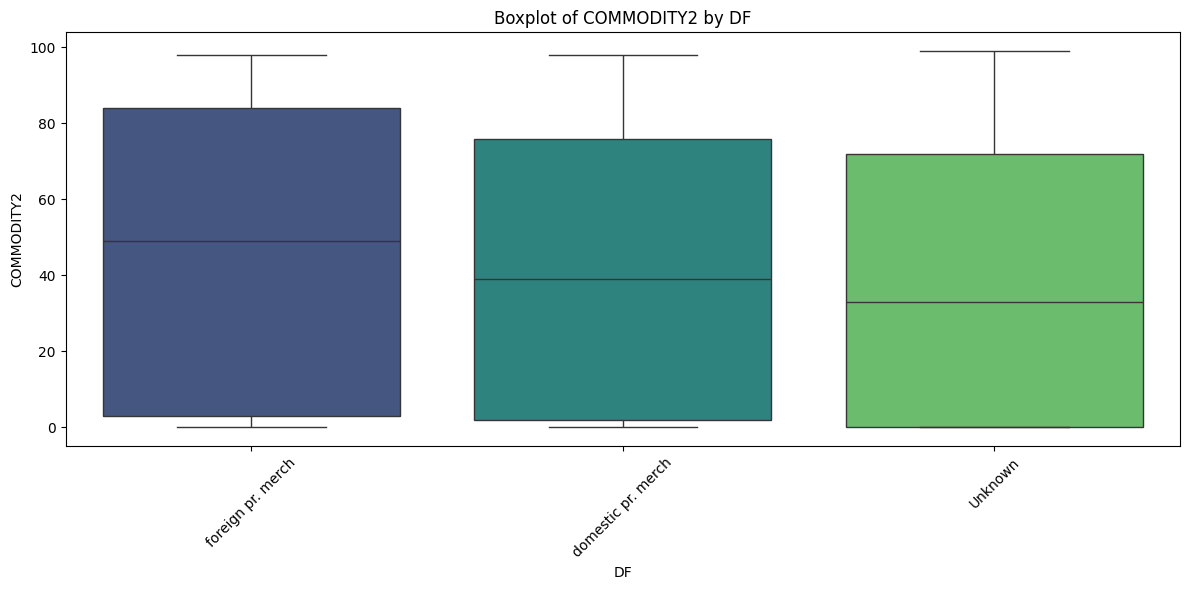

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


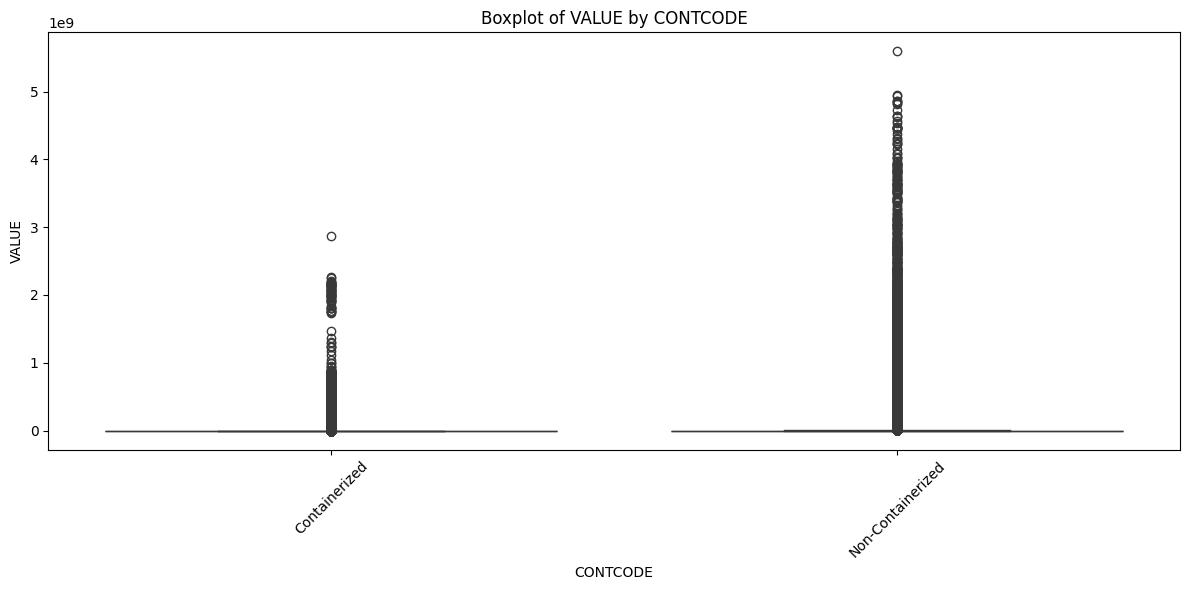

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


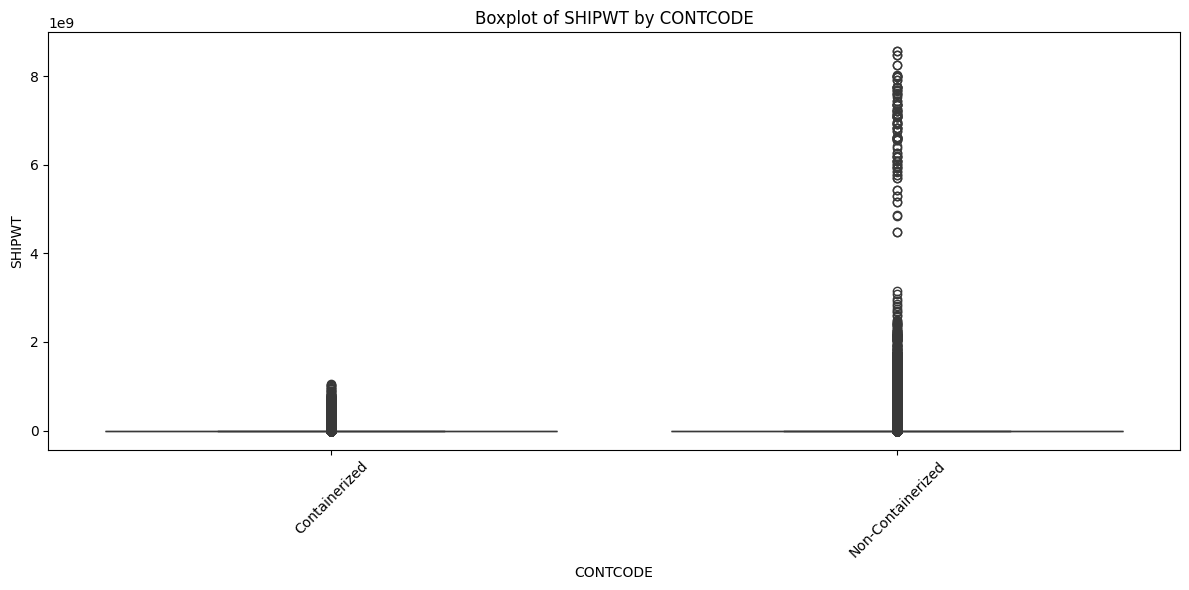

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


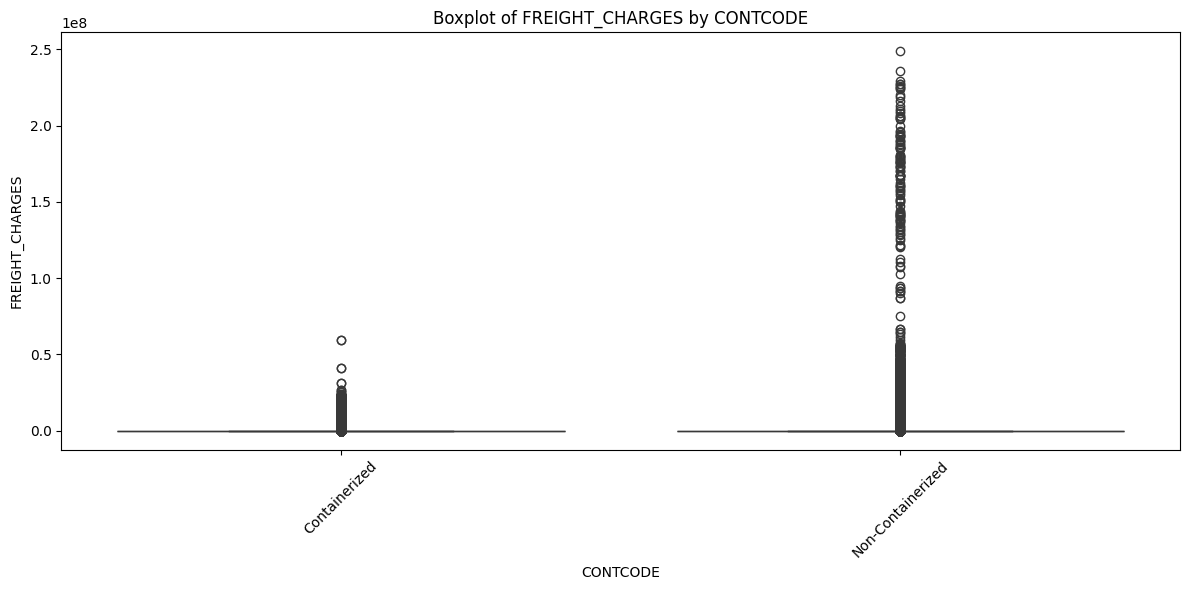

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


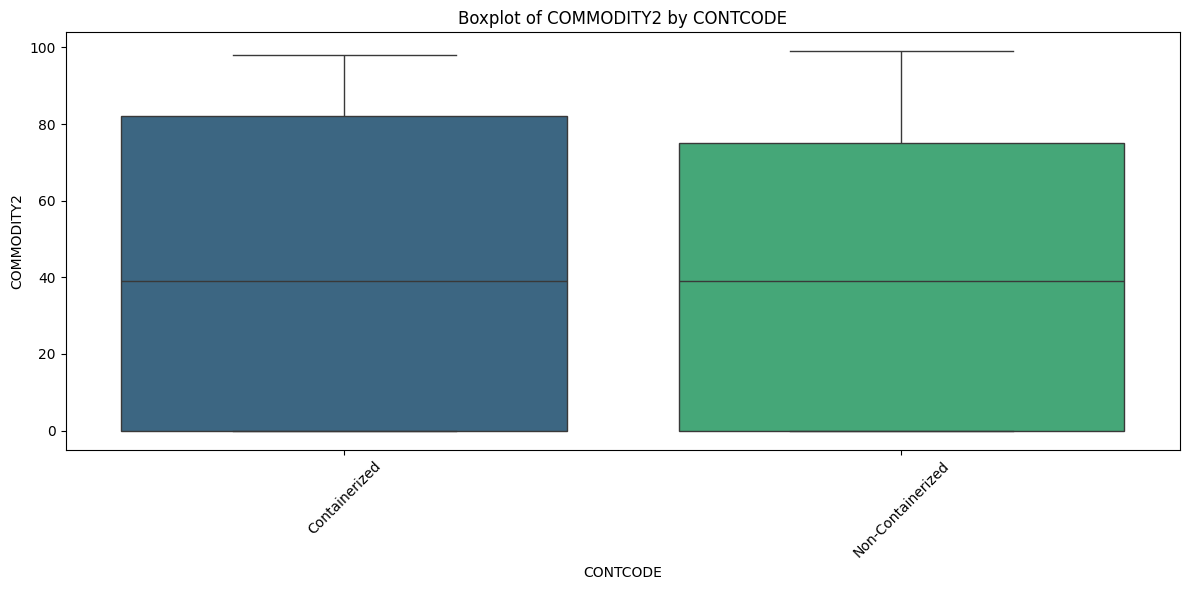

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


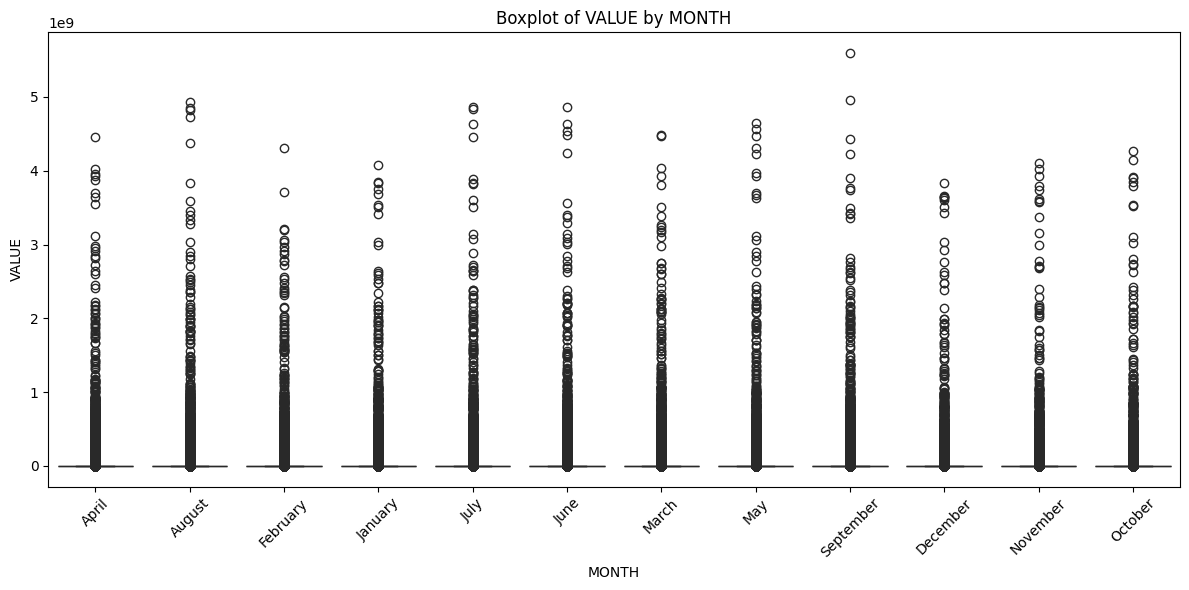

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


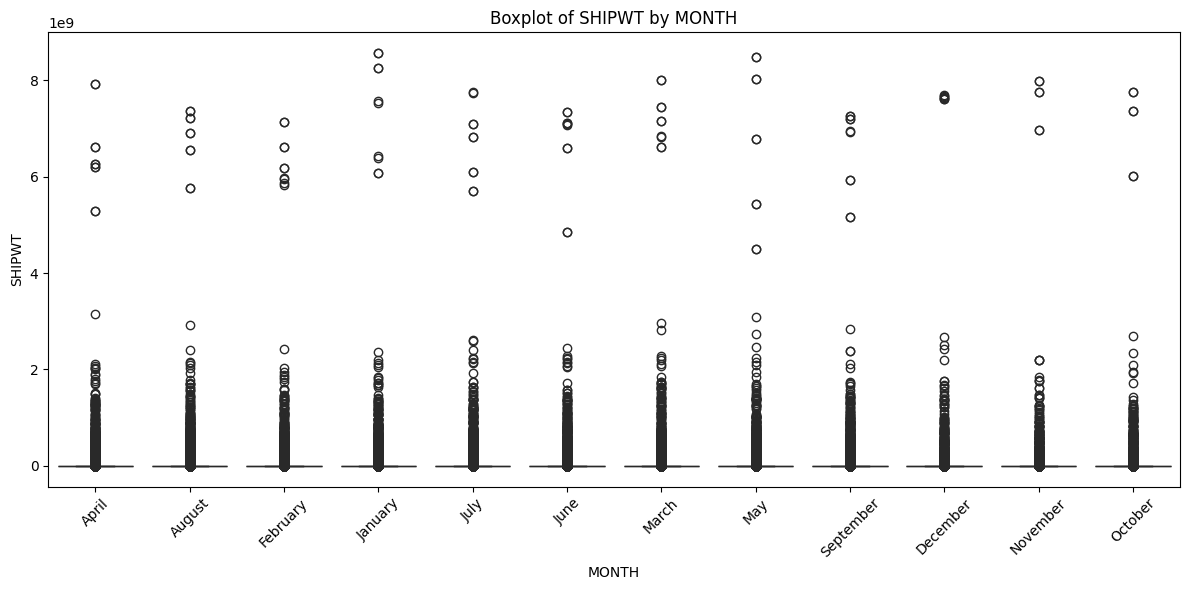

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


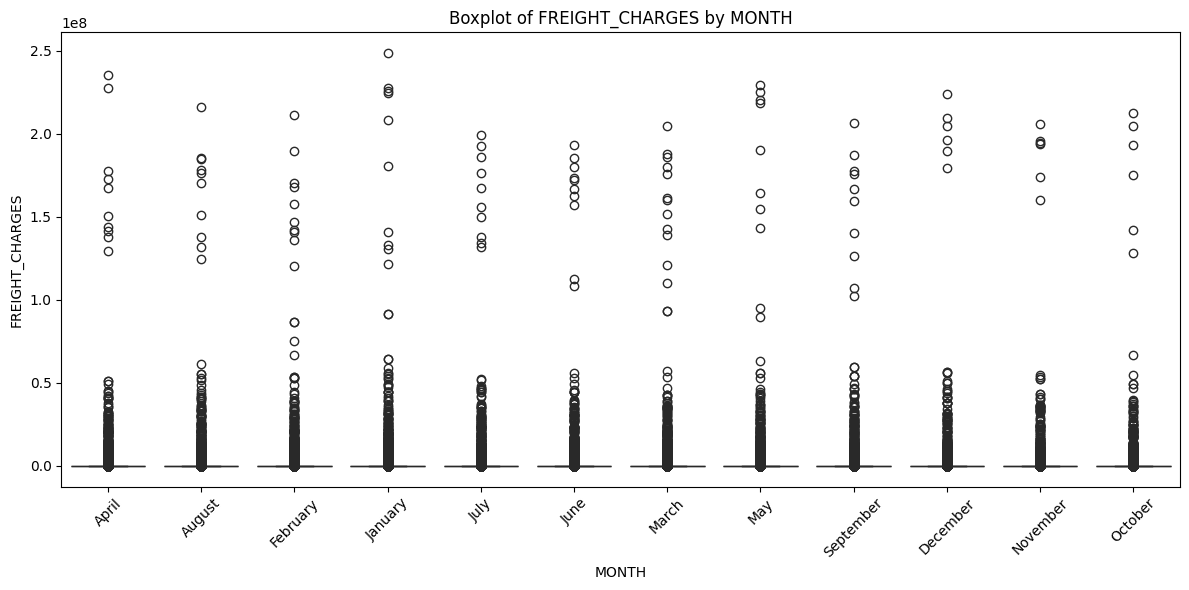

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


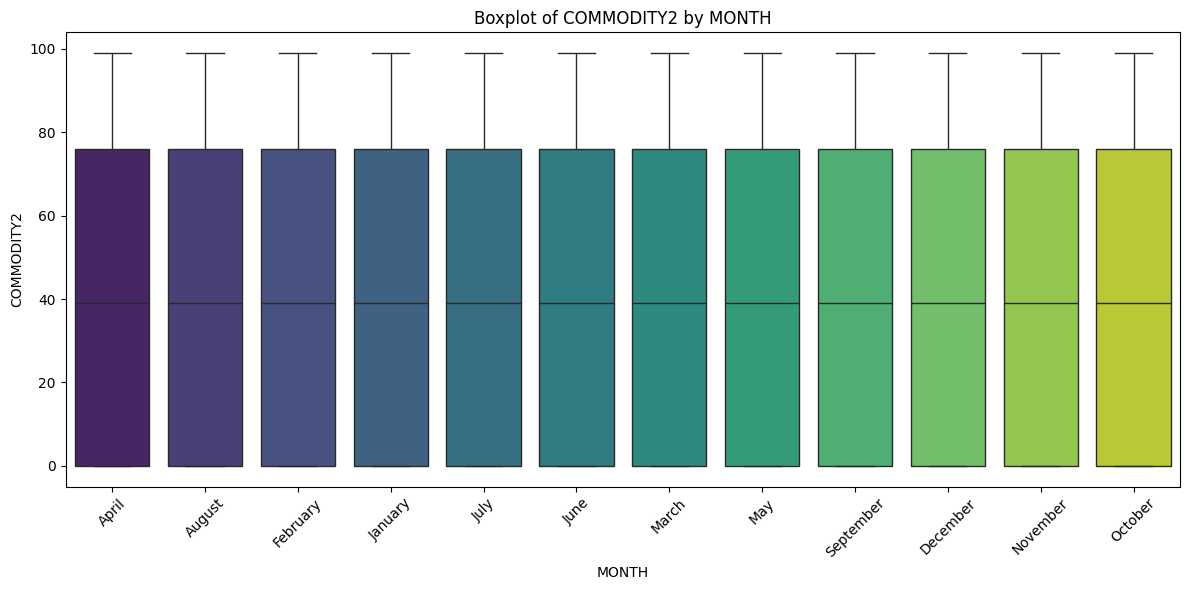

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


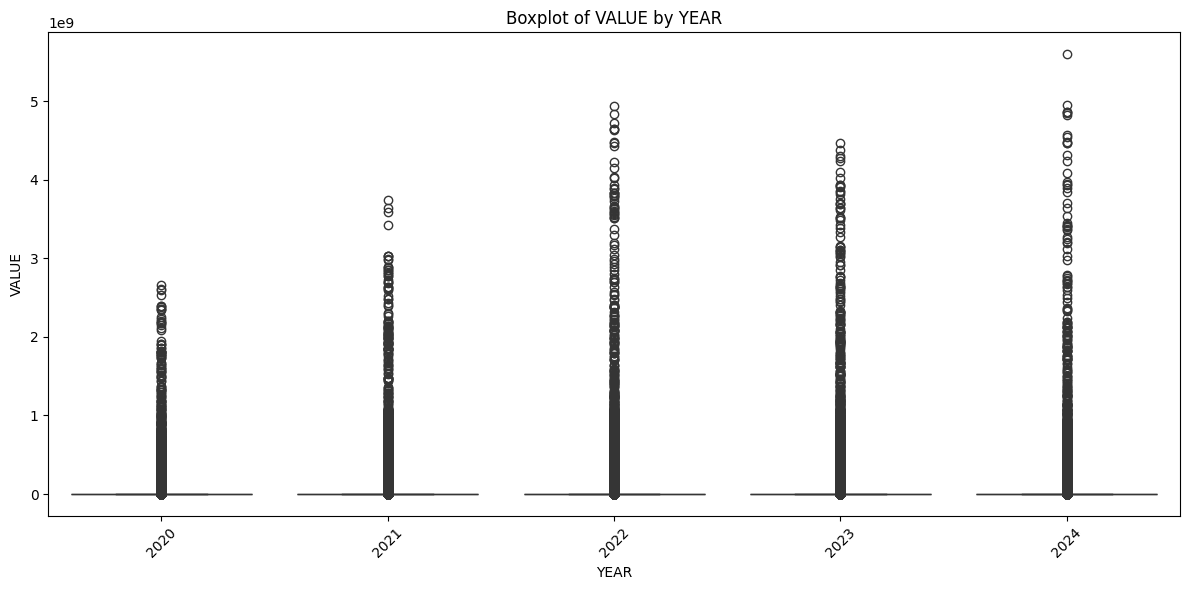

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


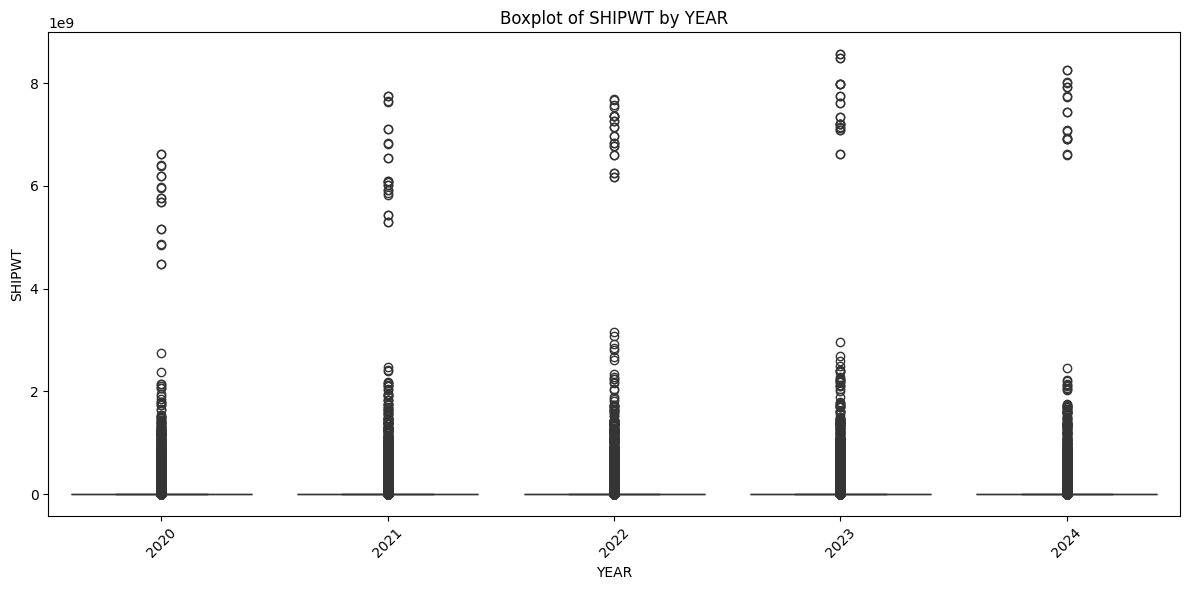

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


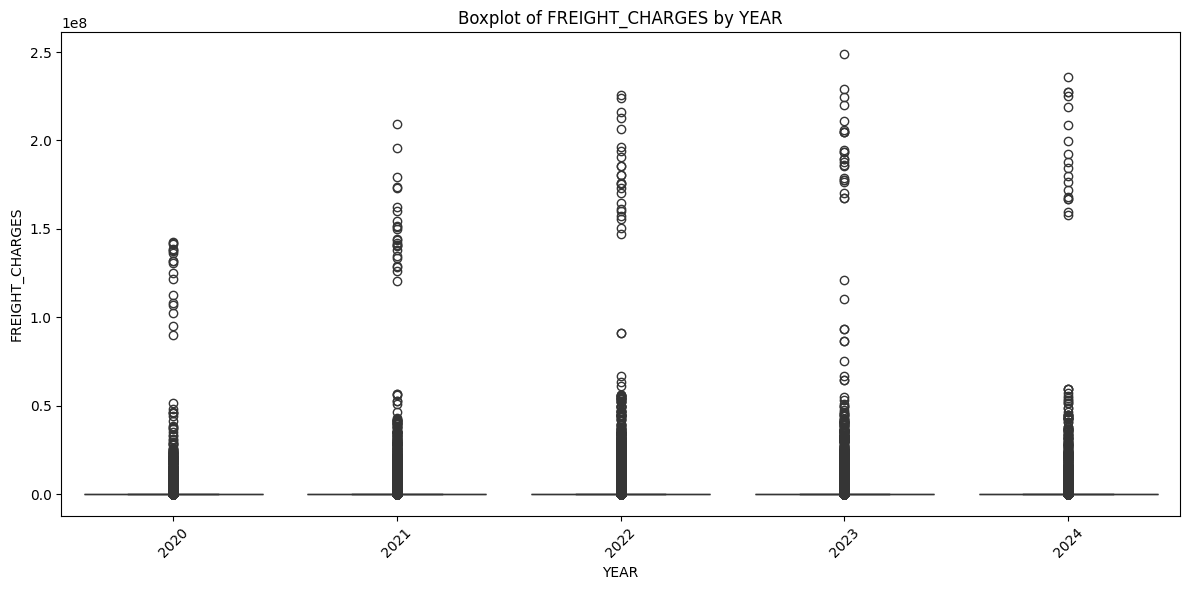

C:\Users\DELL\AppData\Local\Temp\ipykernel_25052\1675309251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')


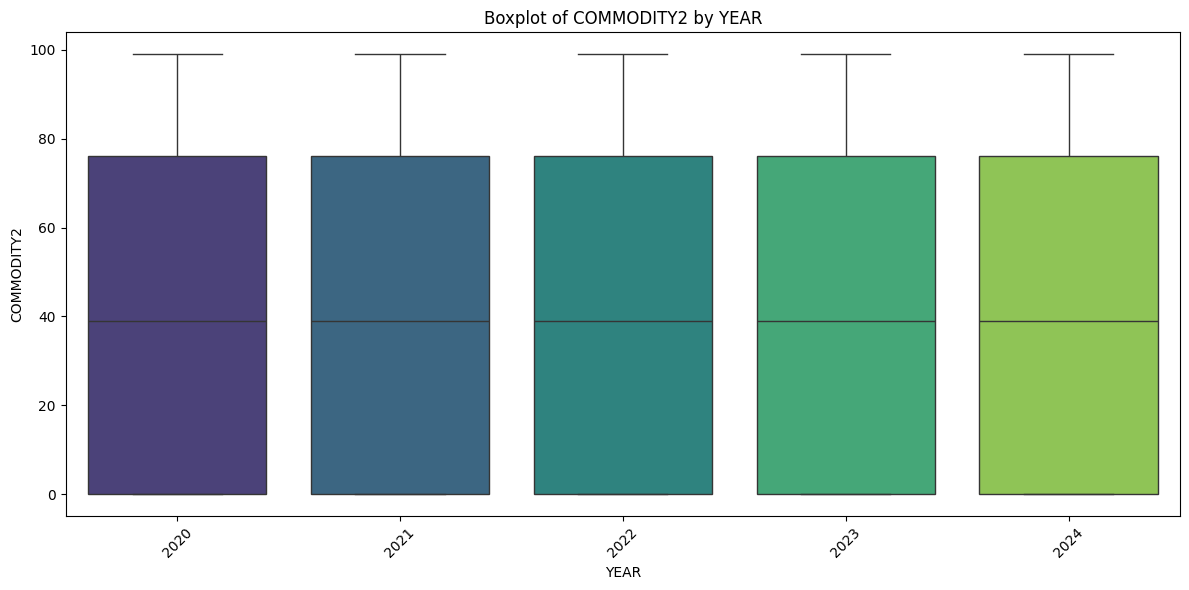

In [ ]:
# Categorical vs Numerical
categorical_cols = ['TRDTYPE', 'USASTATE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY', 'DF', 'CONTCODE', 'MONTH', 'YEAR']
print("\nCategorical vs Numerical Analysis:")

numerical_cols = ['VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'COMMODITY2']

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=dfn, x=cat_col, y=num_col, palette='viridis')
        plt.title(f"Boxplot of {num_col} by {cat_col}")
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()





Categorical vs Categorical Analysis:

Cross-tabulation between TRDTYPE and USASTATE:

USASTATE  Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
TRDTYPE                                                              
Export      59320    8672    83415     43999      205297     65200   
Import      27578   14264    35697     20526       63821     33591   

USASTATE  Connecticut  Delaware  District of Columbia  Florida  ...  \
TRDTYPE                                                         ...   
Export          65996     27372                  2418   117081  ...   
Import          29595     15820                  6847    51258  ...   

USASTATE  Tennessee   Texas  Unknown   Utah  Vermont  Virginia  Washington  \
TRDTYPE                                                                      
Export        94188  246061    19788  55625    22035     64951       80614   
Import        37649   64294    11216  29594    19112     33635       45244   

USASTATE  West Virginia  Wisconsin

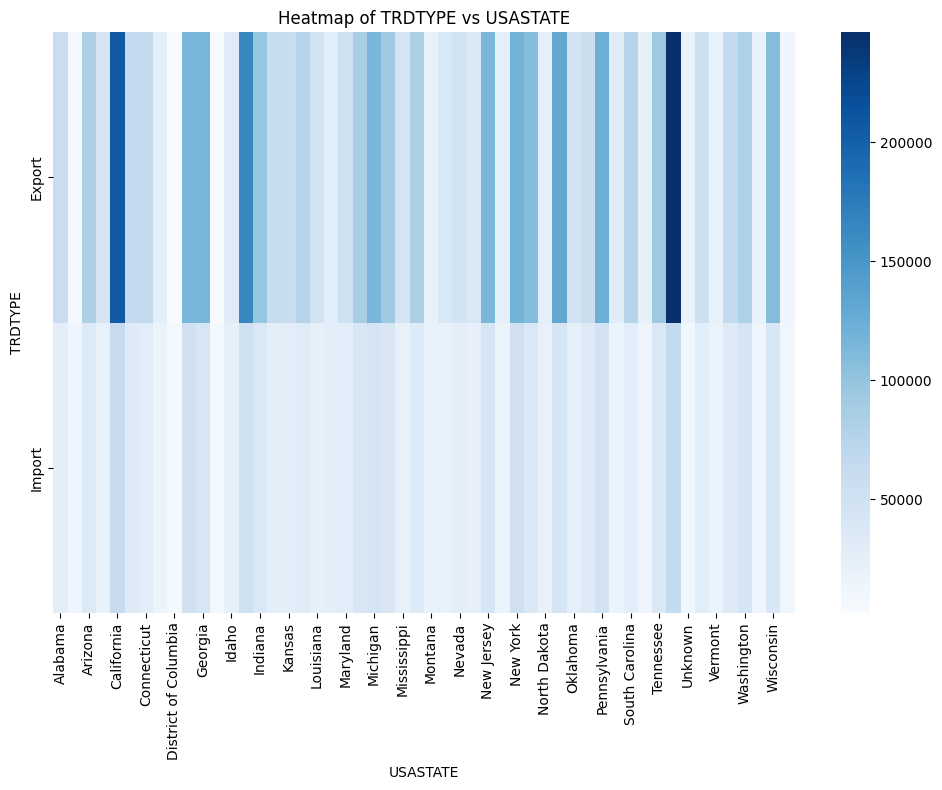


Cross-tabulation between TRDTYPE and DISAGMOT:

DISAGMOT     Air  Foreign Trade Zones (FTZs)  Mail (U.S. Postal Service)  \
TRDTYPE                                                                    
Export    585566                           0                        5268   
Import    344648                       13158                          60   

DISAGMOT   Other  Pipeline    Rail    Truck  Vessel  
TRDTYPE                                              
Export    181002      5006  270326  2538633   24939  
Import     14630      5053  169241  1031506   20162  


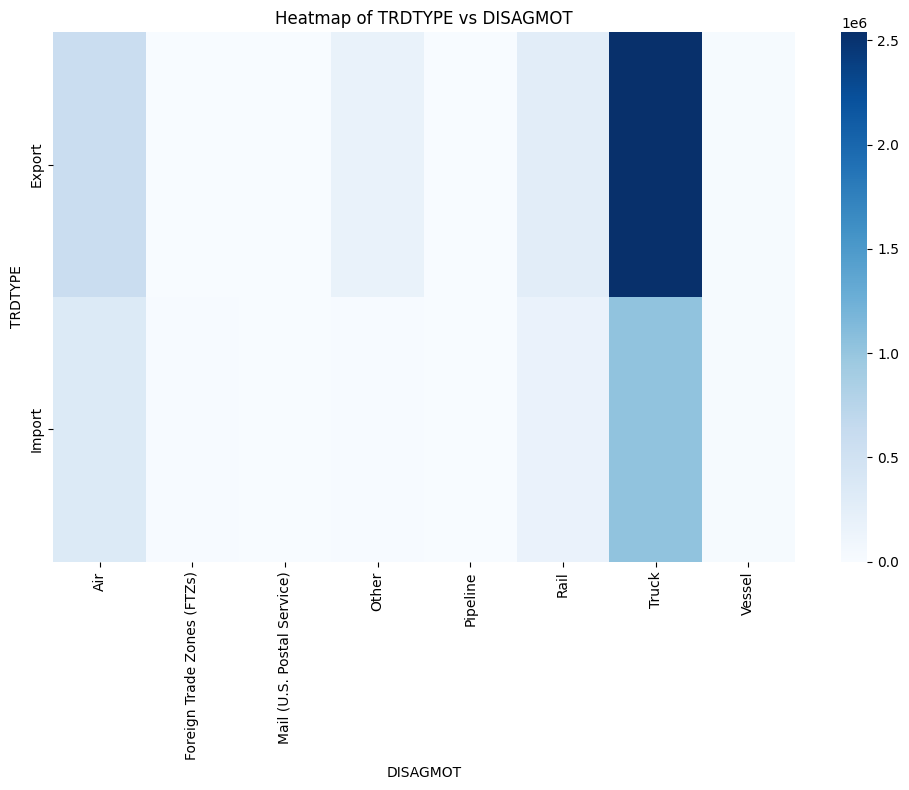


Cross-tabulation between TRDTYPE and MEXSTATE:

MEXSTATE  Aguascalientes  Baja California  Baja California Sur  Campeche  \
TRDTYPE                                                                    
Export             38560           106487                13497     49108   

MEXSTATE  Chiapas  Chihuahua  Coahuila  Colima  Distrito Federal  Durango  \
TRDTYPE                                                                     
Export       3613     107361     75872    4408             96938    25817   

MEXSTATE  ...  San Luis Potosi  Sinaloa  Sonora  State Unknown  Tabasco  \
TRDTYPE   ...                                                             
Export    ...            55340    29061   80236          68106     5963   

MEXSTATE  Tamaulipas  Tlaxcala  Veracruz  Yucatan  Zacatecas  
TRDTYPE                                                       
Export         78605     15395     20725     8260      12184  

[1 rows x 32 columns]


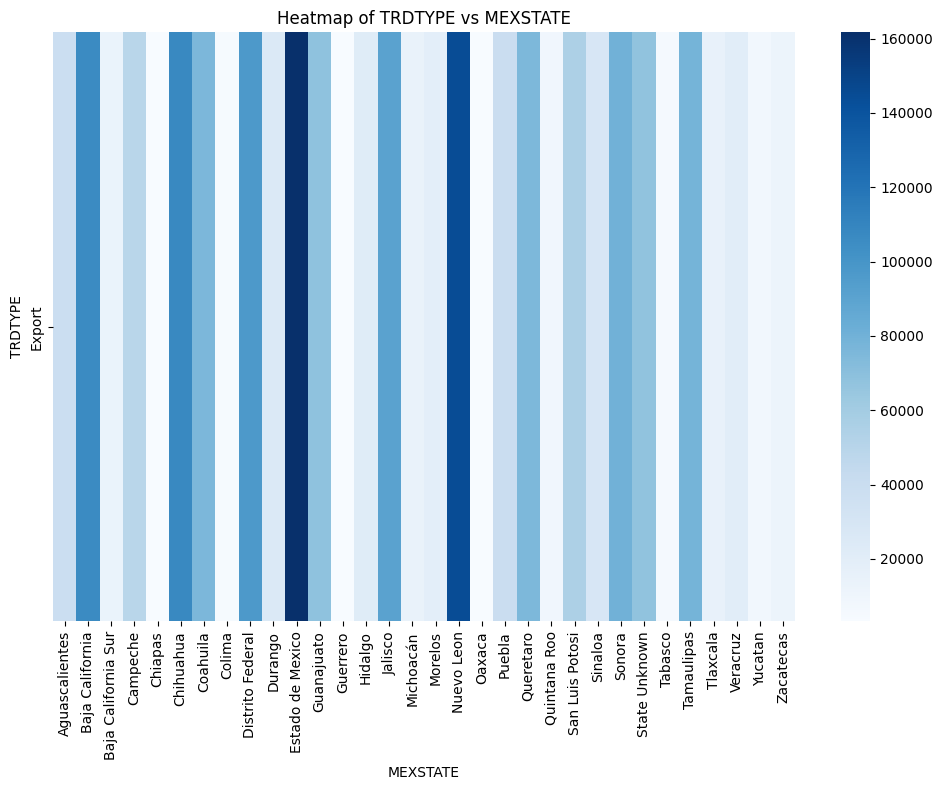


Cross-tabulation between TRDTYPE and CANPROV:

CANPROV  Alberta  British Columbia  Manitoba  New Brunswick  Newfoundland  \
TRDTYPE                                                                     
Export    274575            333064    253238          84746          2068   
Import    156706            185920    105333          61883         13350   

CANPROV  Northwest Territories  Nova Scotia  Nunavut  Ontario  \
TRDTYPE                                                         
Export                      22         6202        0   554114   
Import                     417        63614      104   350924   

CANPROV  Prince Edward Island  Province Unknown  Quebec  Saskatchewan  \
TRDTYPE                                                                 
Export                   2200              5716  322592        103435   
Import                  23648               108  270479         73699   

CANPROV  Yukon Territory  
TRDTYPE                   
Export              1172  
Import  

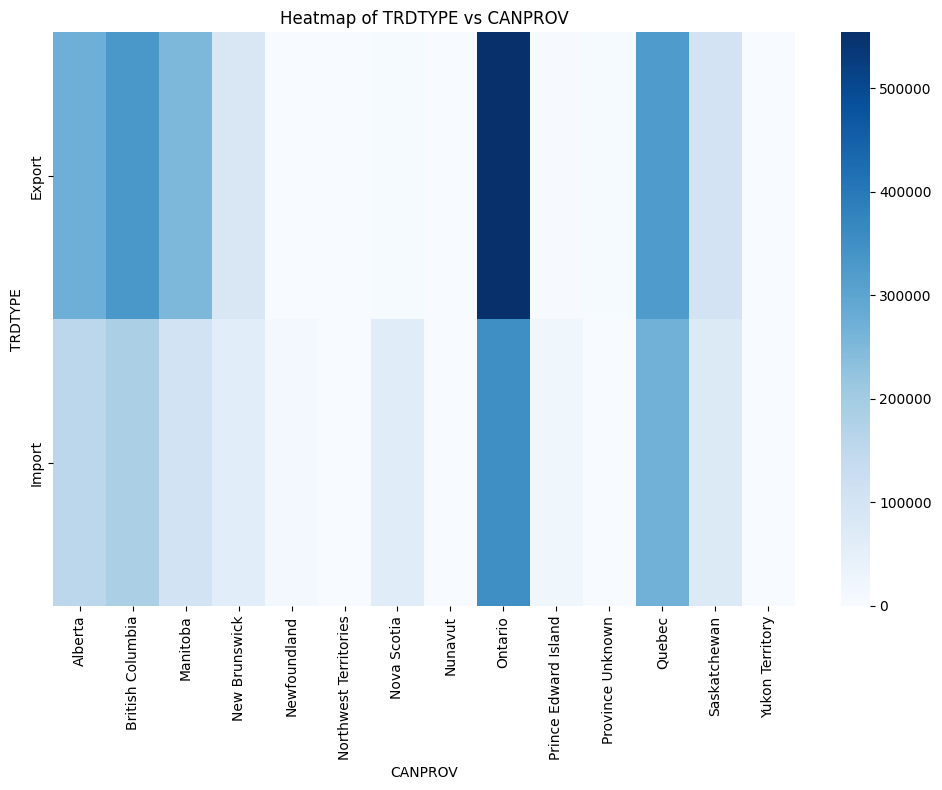


Cross-tabulation between TRDTYPE and COUNTRY:

COUNTRY   Canada   Mexico
TRDTYPE                  
Export   1943144  1667596
Import   1307388   291070


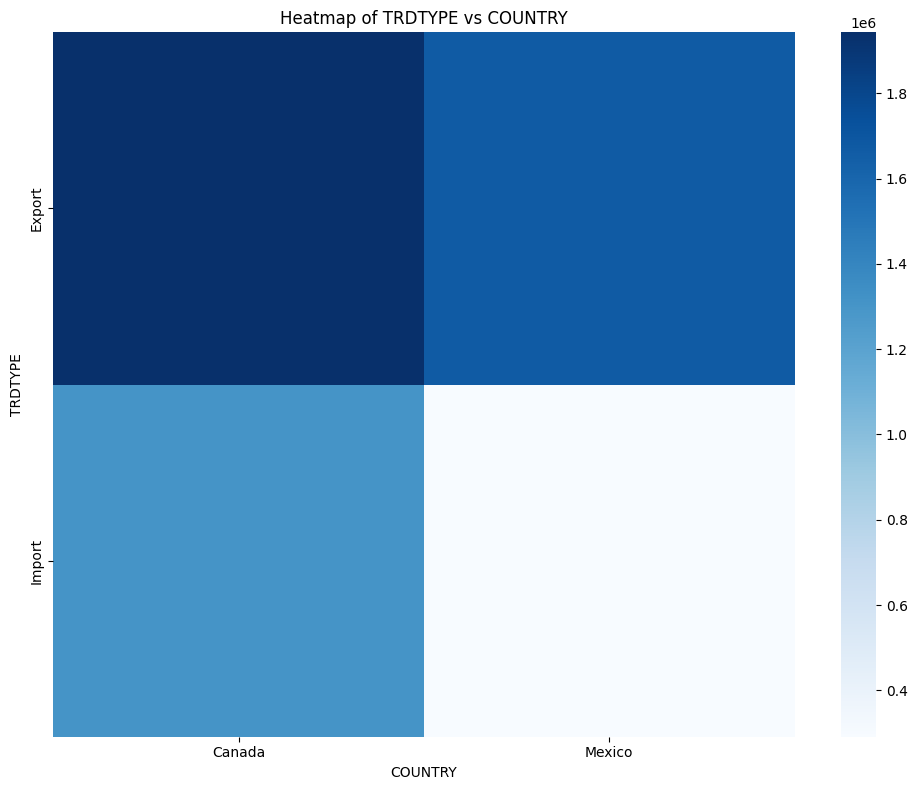


Cross-tabulation between TRDTYPE and DF:

DF       Unknown  domestic pr. merch  foreign pr. merch
TRDTYPE                                                
Export         0             2398084            1212656
Import   1598458                   0                  0


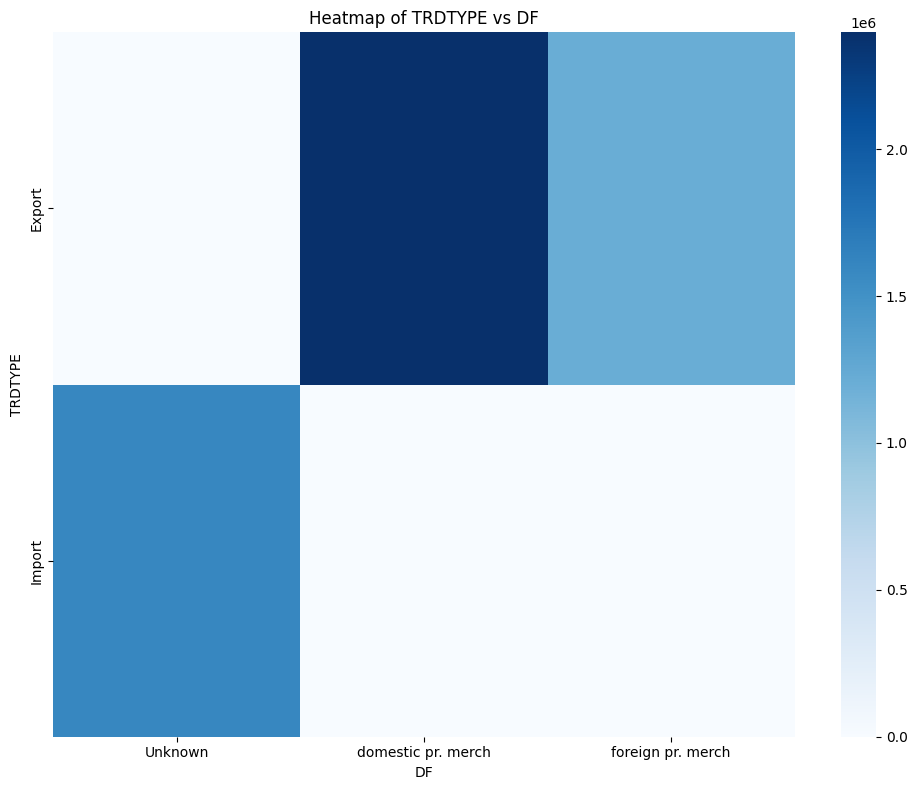


Cross-tabulation between TRDTYPE and CONTCODE:

CONTCODE  Containerized  Non-Containerized
TRDTYPE                                   
Export          2048244            1562496
Import                0            1598458


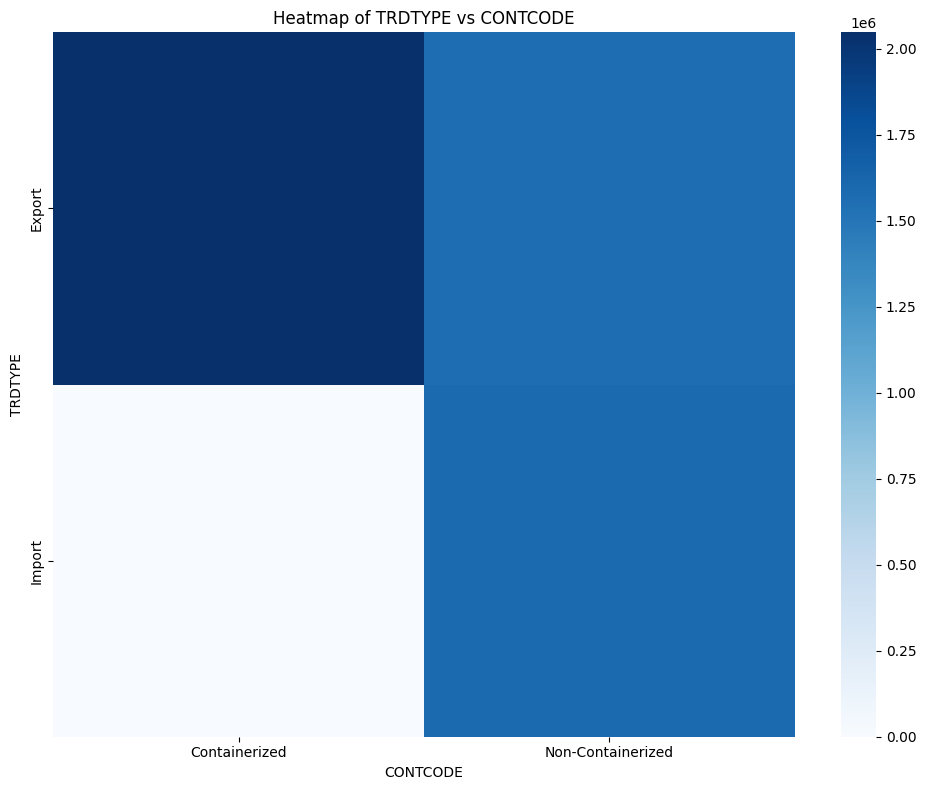


Cross-tabulation between TRDTYPE and MONTH:

MONTH     April  August  December  February  January    July    June   March  \
TRDTYPE                                                                        
Export   332135  338128    198065    327668   324489  333751  336580  345796   
Import   146963  148664     87771    145292   144197  147654  148552  150675   

MONTH       May  November  October  September  
TRDTYPE                                        
Export   332453    202292   204908     334475  
Import   148202     90272    91268     148948  


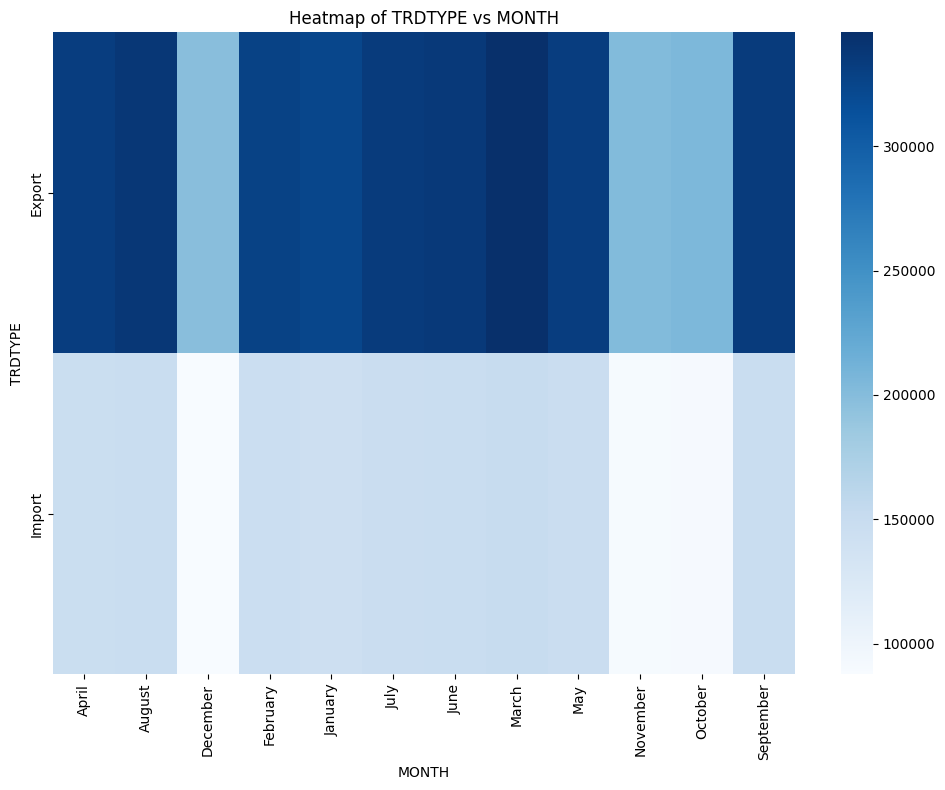


Cross-tabulation between TRDTYPE and YEAR:

YEAR       2020    2021    2022    2023    2024
TRDTYPE                                        
Export   554416  787260  814216  824402  630446
Import   251822  354284  360217  361075  271060


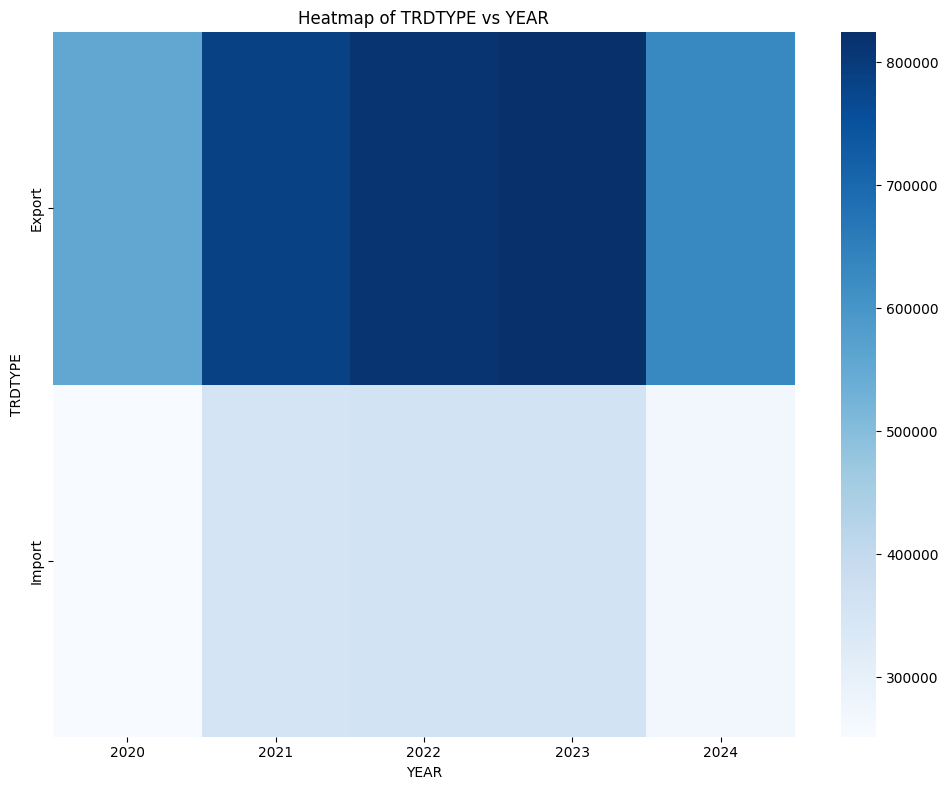


Cross-tabulation between USASTATE and DISAGMOT:

DISAGMOT                Air  Foreign Trade Zones (FTZs)  \
USASTATE                                                  
Alabama               13413                         142   
Alaska                 6479                           0   
Arizona               23138                         519   
Arkansas               7217                          62   
California            53256                        1130   
Colorado              20133                           0   
Connecticut           21107                          33   
Delaware               8263                           0   
District of Columbia   2866                           0   
Florida               38199                        1008   
Georgia               27076                         168   
Hawaii                 6126                           0   
Idaho                  9400                         824   
Illinois              34919                         312   
Indian

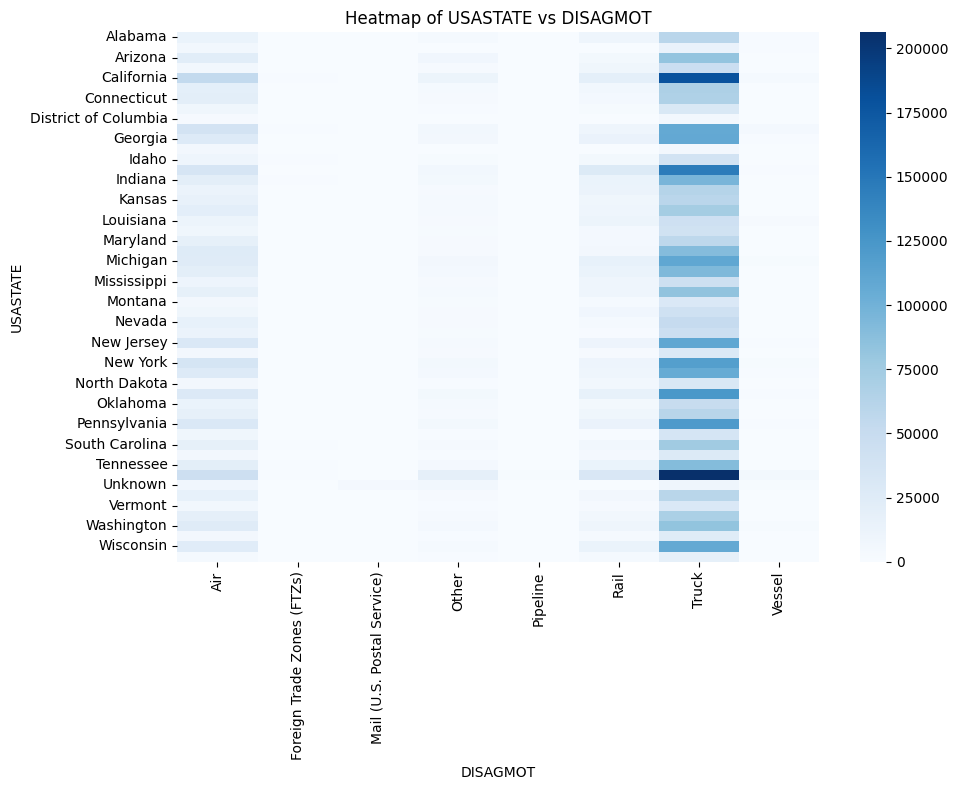


Cross-tabulation between USASTATE and MEXSTATE:

MEXSTATE              Aguascalientes  Baja California  Baja California Sur  \
USASTATE                                                                     
Alabama                          742             1560                   41   
Alaska                            33              148                   12   
Arizona                          425             4941                  490   
Arkansas                         535             1338                  165   
California                      2279            12555                 4814   
Colorado                         411             1448                  200   
Connecticut                      404             1128                   96   
Delaware                         135              698                   15   
District of Columbia               2               20                    4   
Florida                         1131             2722                  869   
Georgia       

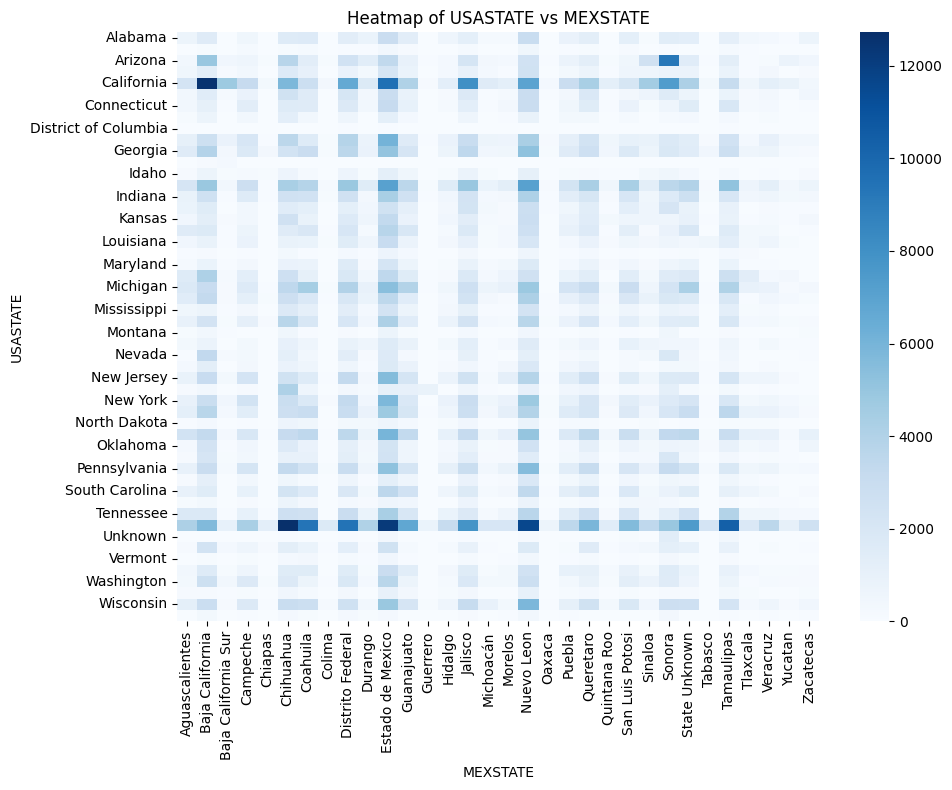


Cross-tabulation between USASTATE and CANPROV:

CANPROV               Alberta  British Columbia  Manitoba  New Brunswick  \
USASTATE                                                                   
Alabama                  6220              7148      5922           2299   
Alaska                   3322              5050      1162            294   
Arizona                 10093             12004      5884           1530   
Arkansas                 5441              6270      5006           1485   
California              22519             27556     13575           4862   
Colorado                11071             11804      6936           1856   
Connecticut              6234              8822      5319           3173   
Delaware                 3183              3636      2334           1282   
District of Columbia      487              1110       393            134   
Florida                 11995             15673     10787           4777   
Georgia                 12127          

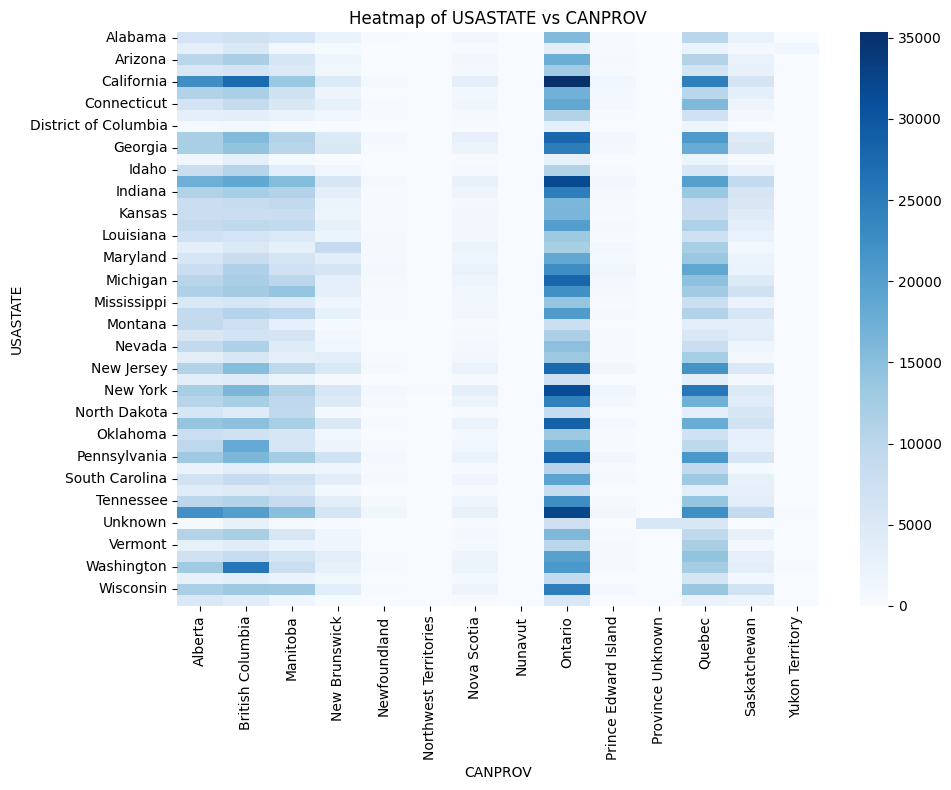


Cross-tabulation between USASTATE and COUNTRY:

COUNTRY               Canada  Mexico
USASTATE                            
Alabama                51822   35076
Alaska                 18407    4529
Arizona                62470   56642
Arkansas               41206   23319
California            139861  129257
Colorado               64379   34412
Connecticut            62699   32892
Delaware               30467   12725
District of Columbia    7644    1621
Florida               101223   67116
Georgia                93453   63658
Hawaii                 10817    1709
Idaho                  43929   12395
Illinois              122703   95359
Indiana                85261   52535
Iowa                   59190   31115
Kansas                 56338   30700
Kentucky               67439   39575
Louisiana              45559   27654
Maine                  49096    7027
Maryland               60591   22696
Massachusetts          81307   45487
Michigan               86565   74216
Minnesota              861

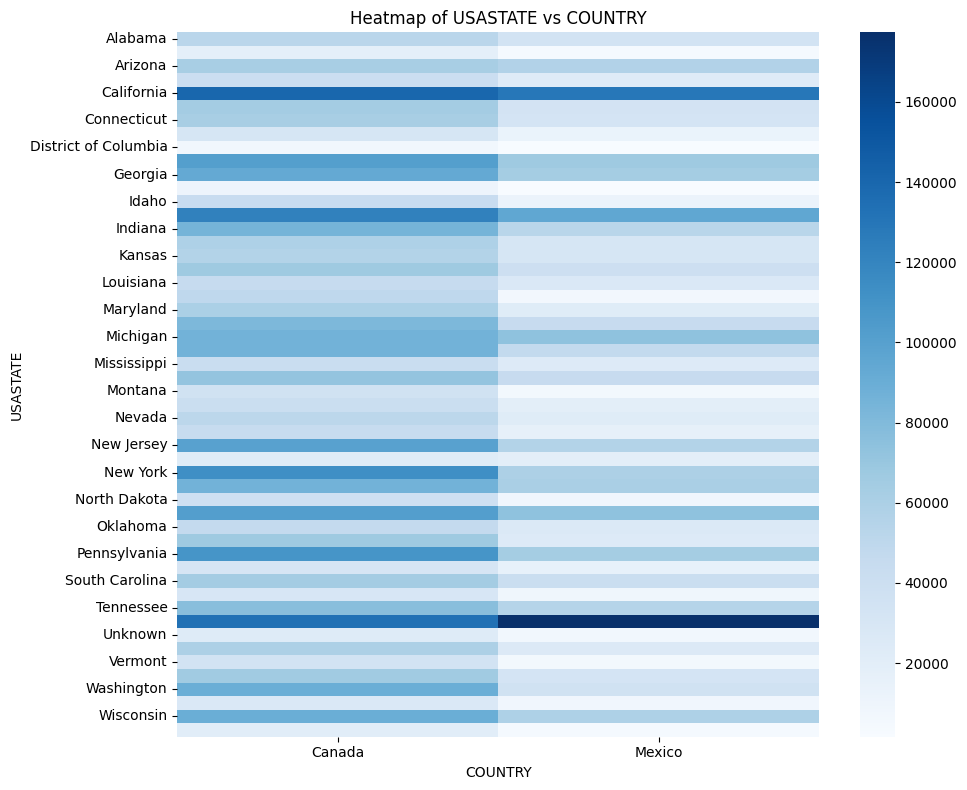


Cross-tabulation between USASTATE and DF:

DF                    Unknown  domestic pr. merch  foreign pr. merch
USASTATE                                                            
Alabama                 27578               44299              15021
Alaska                  14264                6421               2251
Arizona                 35697               52315              31100
Arkansas                20526               34438               9561
California              63821              122247              83050
Colorado                33591               44648              20552
Connecticut             29595               42466              23530
Delaware                15820               17804               9568
District of Columbia     6847                1528                890
Florida                 51258               74291              42790
Georgia                 41916               74771              40424
Hawaii                   8263                3183          

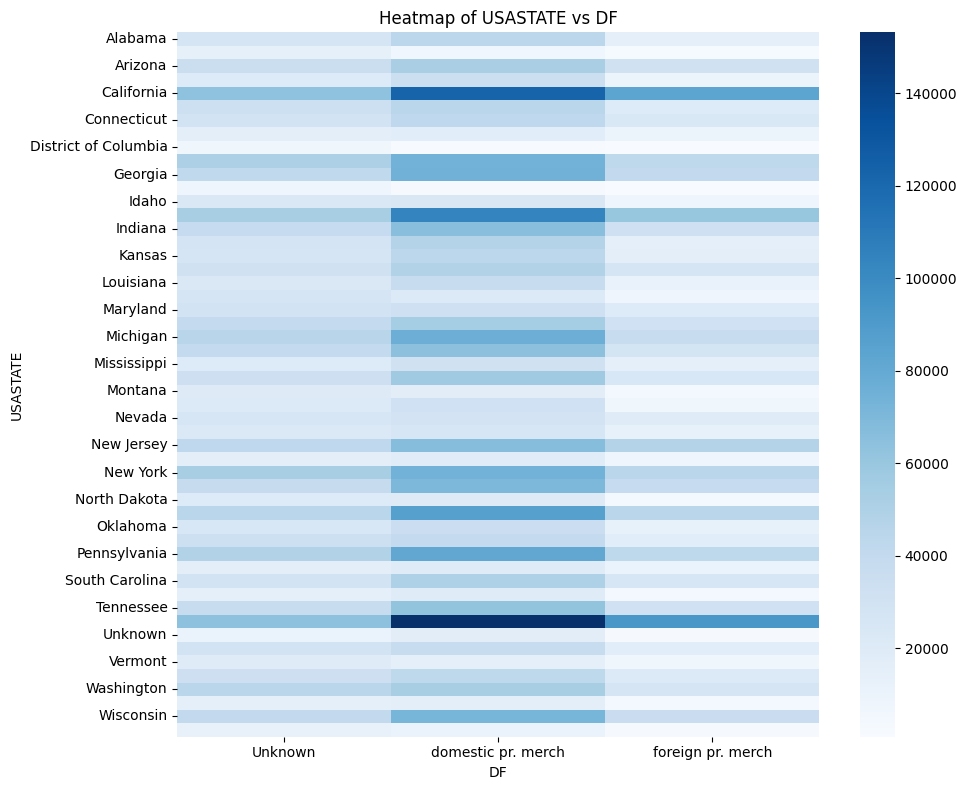


Cross-tabulation between USASTATE and CONTCODE:

CONTCODE              Containerized  Non-Containerized
USASTATE                                              
Alabama                       31980              54918
Alaska                         5452              17484
Arizona                       41179              77933
Arkansas                      26200              38325
California                    98578             170540
Colorado                      39121              59670
Connecticut                   39169              56422
Delaware                      18083              25109
District of Columbia           1829               7436
Florida                       65286             103053
Georgia                       64090              93021
Hawaii                         3771               8755
Idaho                         23609              32715
Illinois                      83512             134550
Indiana                       55498              82298
Iowa           

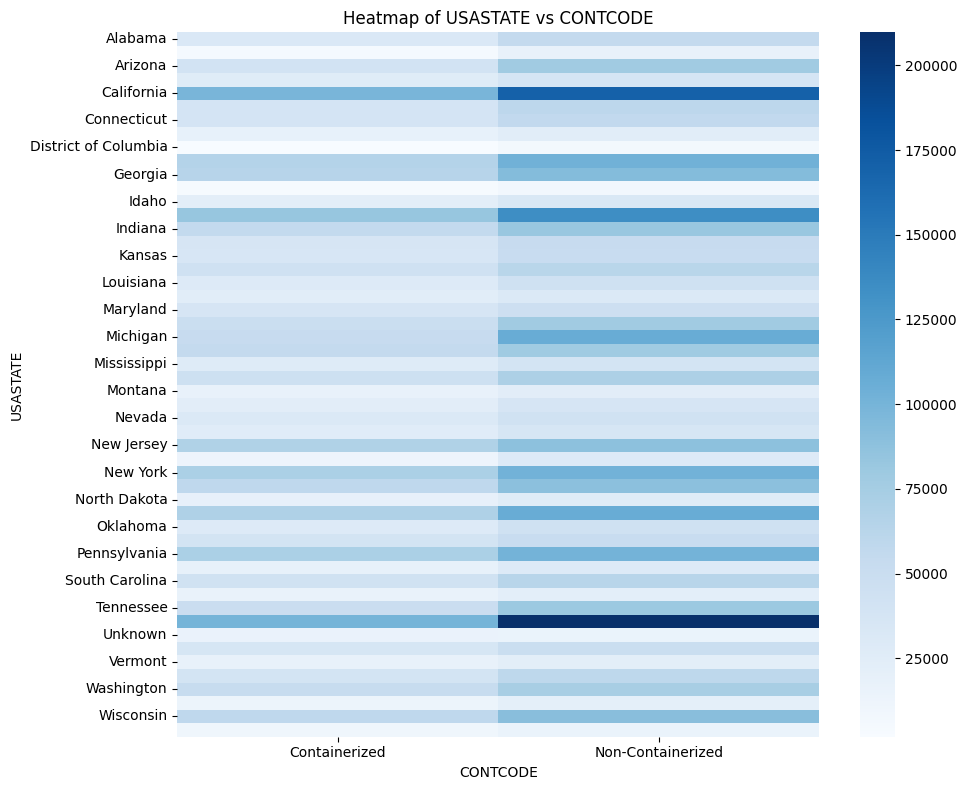


Cross-tabulation between USASTATE and MONTH:

MONTH                 April  August  December  February  January   July  \
USASTATE                                                                  
Alabama                7980    8114      4686      7948     7799   8009   
Alaska                 2150    2270      1202      1884     1936   2274   
Arizona               10864   11037      6581     11139    10780  10905   
Arkansas               5998    5959      3539      5763     5756   5959   
California            24656   25057     14858     24505    24323  24955   
Colorado               9080    9251      5406      8891     8784   9140   
Connecticut            8837    8904      5219      8617     8679   8868   
Delaware               3940    4042      2435      3832     3807   4007   
District of Columbia    836     849       479       825      810    877   
Florida               15549   15619      9312     15308    15220  15485   
Georgia               14448   14779      8570     142

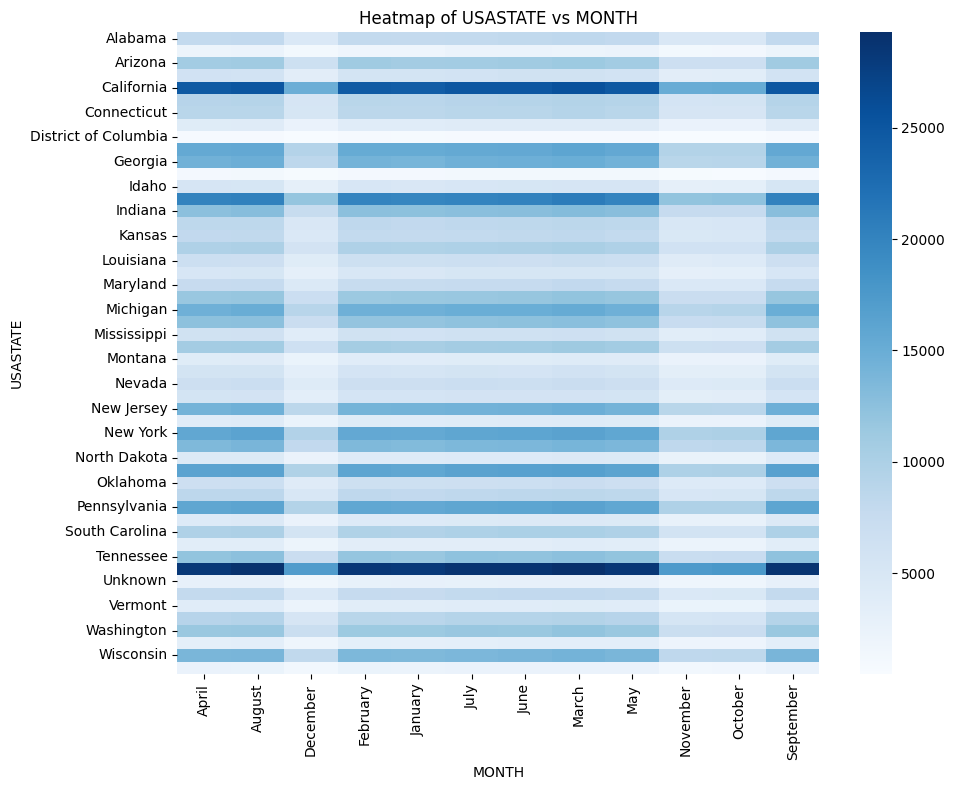


Cross-tabulation between USASTATE and YEAR:

YEAR                   2020   2021   2022   2023   2024
USASTATE                                               
Alabama               13241  18854  19609  19870  15324
Alaska                 3409   4908   5195   5410   4014
Arizona               18174  26042  26968  27313  20615
Arkansas               9910  14143  14414  14648  11410
California            42357  58947  60628  61273  45913
Colorado              15153  21982  22059  22506  17091
Connecticut           14881  21230  21489  21366  16625
Delaware               6235   9213   9625  10232   7887
District of Columbia   1494   1990   2112   2067   1602
Florida               25583  36329  37807  38775  29845
Georgia               24081  34341  35665  35967  27057
Hawaii                 1870   2657   2856   2944   2199
Idaho                  8519  12055  12654  13037  10059
Illinois              34747  48230  49555  48552  36978
Indiana               21043  30063  31117  31507  24066
Io

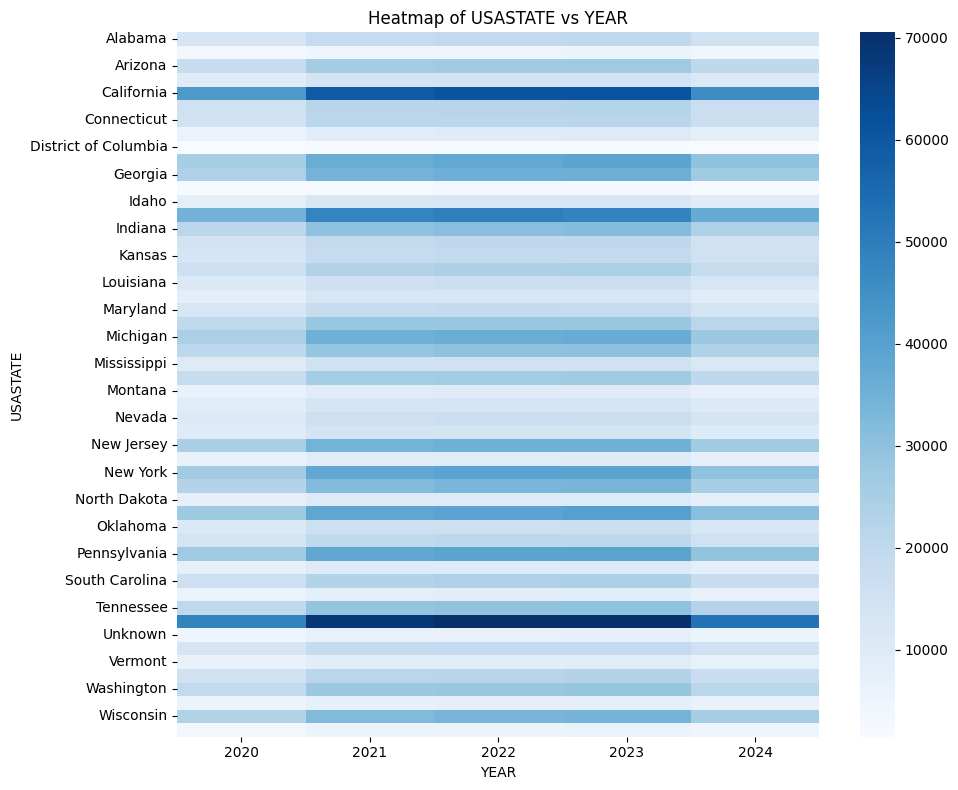


Cross-tabulation between DISAGMOT and MEXSTATE:

MEXSTATE                    Aguascalientes  Baja California  \
DISAGMOT                                                      
Mail (U.S. Postal Service)              11                6   
Other                                 3369             7135   
Pipeline                                 0               70   
Rail                                  1863             3296   
Truck                                33317            95980   

MEXSTATE                    Baja California Sur  Campeche  Chiapas  Chihuahua  \
DISAGMOT                                                                        
Mail (U.S. Postal Service)                    2         0        2          4   
Other                                       244       233      387      14337   
Pipeline                                      0        70        2        116   
Rail                                        203      1478      108       3558   
Truck                 

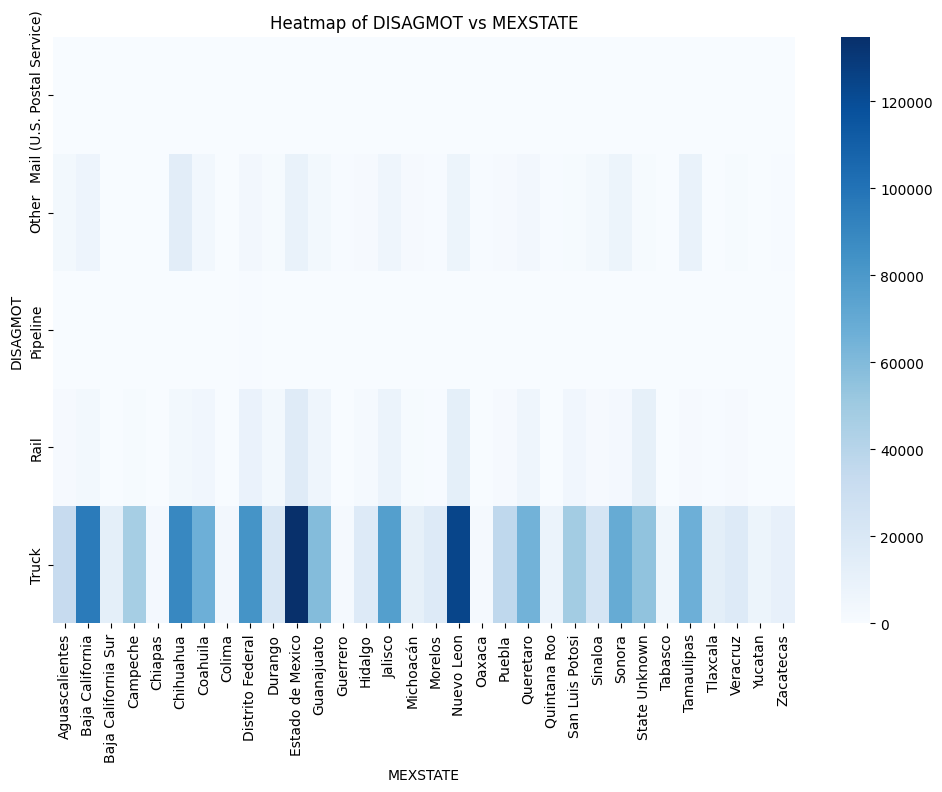


Cross-tabulation between DISAGMOT and CANPROV:

CANPROV                     Alberta  British Columbia  Manitoba  \
DISAGMOT                                                          
Air                          114786            125491     65192   
Foreign Trade Zones (FTZs)      463               306       273   
Mail (U.S. Postal Service)       12              1516         2   
Other                         12395             14457     10786   
Pipeline                       4508               350       243   
Rail                          66145             45917     30575   
Truck                        231363            326557    251108   
Vessel                         1609              4390       392   

CANPROV                     New Brunswick  Newfoundland  \
DISAGMOT                                                  
Air                                  9540          2651   
Foreign Trade Zones (FTZs)             96             0   
Mail (U.S. Postal Service)              2   

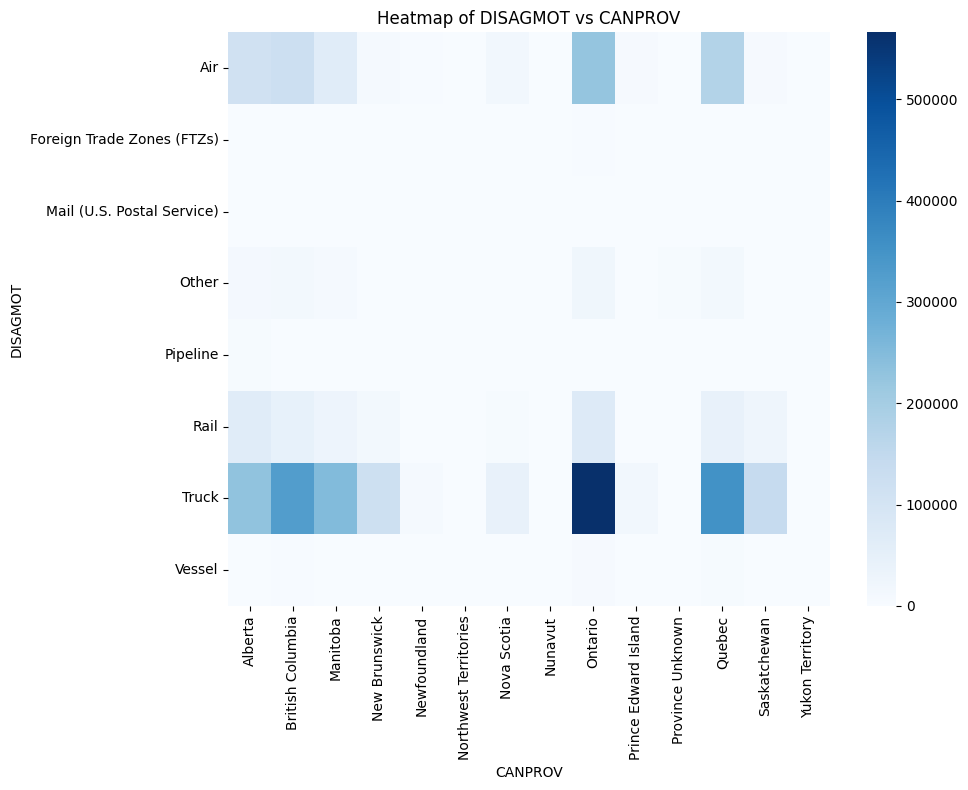


Cross-tabulation between DISAGMOT and COUNTRY:

COUNTRY                      Canada   Mexico
DISAGMOT                                    
Air                          750553   179661
Foreign Trade Zones (FTZs)     6417     6741
Mail (U.S. Postal Service)     4679      649
Other                         85586   110046
Pipeline                       8039     2020
Rail                         305540   134027
Truck                       2064853  1505286
Vessel                        24865    20236


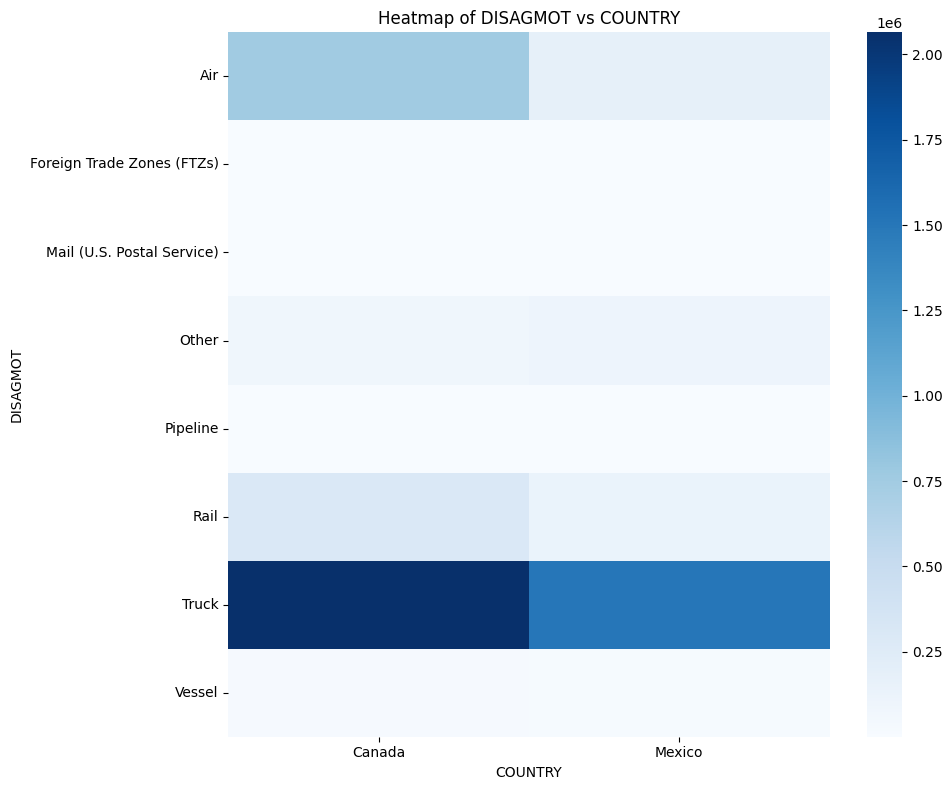


Cross-tabulation between DISAGMOT and DF:

DF                          Unknown  domestic pr. merch  foreign pr. merch
DISAGMOT                                                                  
Air                          344648              352096             233470
Foreign Trade Zones (FTZs)    13158                   0                  0
Mail (U.S. Postal Service)       60                4849                419
Other                         14630              132814              48188
Pipeline                       5053                4922                 84
Rail                         169241              227864              42462
Truck                       1031506             1657723             880910
Vessel                        20162               17816               7123


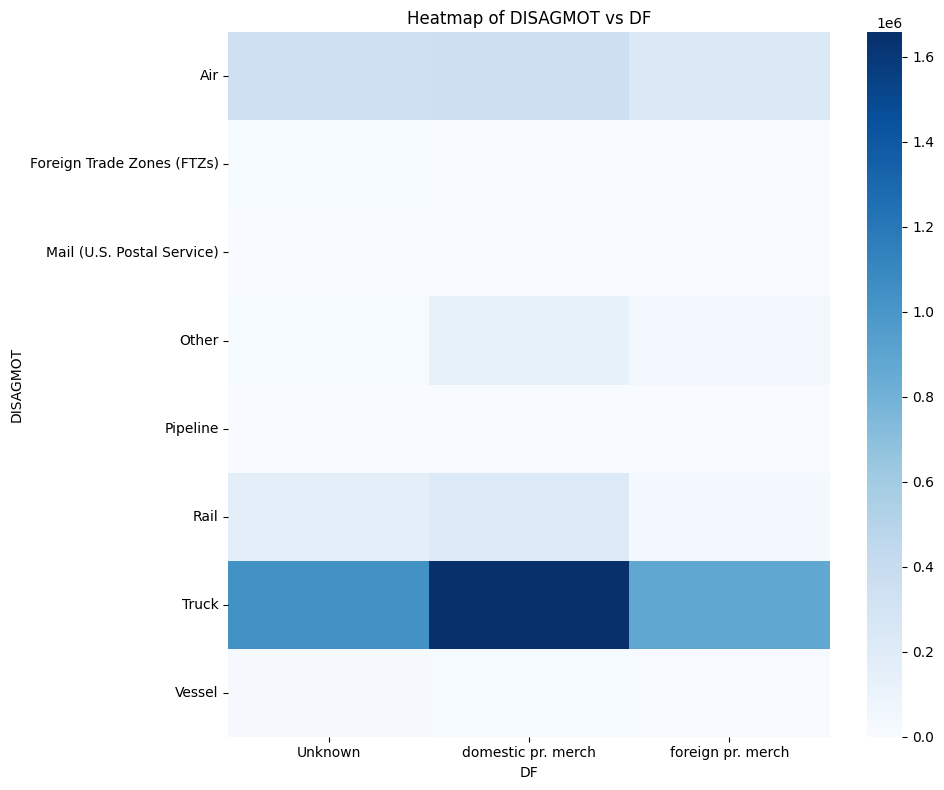


Cross-tabulation between DISAGMOT and CONTCODE:

CONTCODE                    Containerized  Non-Containerized
DISAGMOT                                                    
Air                                481658             448556
Foreign Trade Zones (FTZs)              0              13158
Mail (U.S. Postal Service)           5268                 60
Other                              181002              14630
Pipeline                             5006               5053
Rail                               158800             280767
Truck                             1203348            2366791
Vessel                              13162              31939


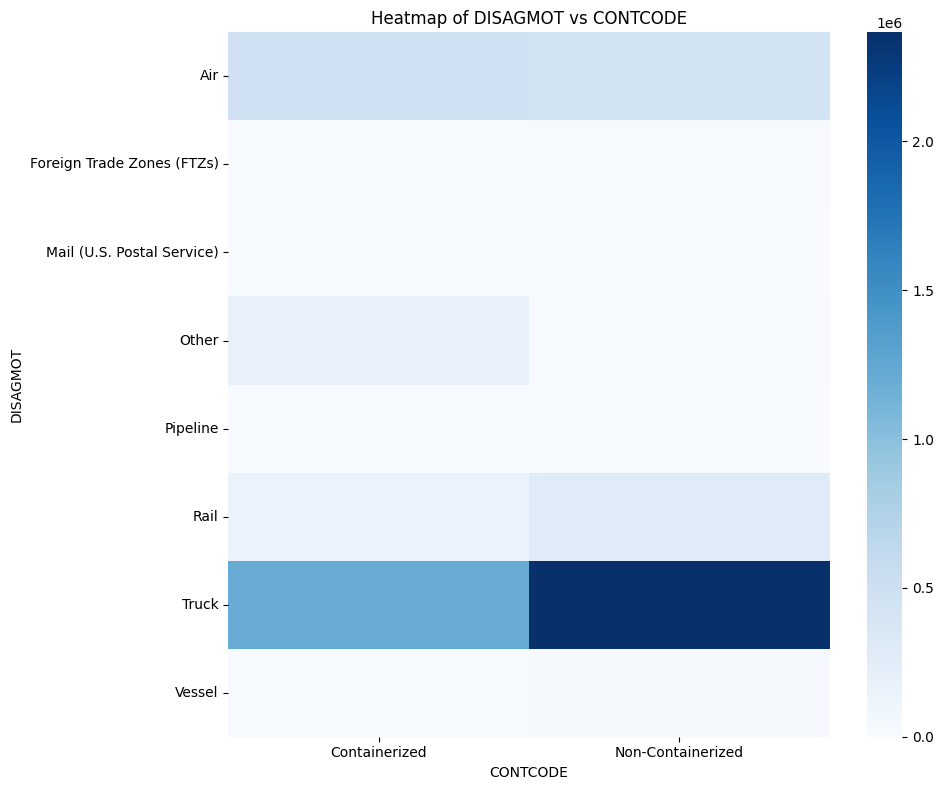


Cross-tabulation between DISAGMOT and MONTH:

MONTH                        April  August  December  February  January  \
DISAGMOT                                                                  
Air                          84867   86594     51975     84845    83628   
Foreign Trade Zones (FTZs)    1159    1259       716      1192     1211   
Mail (U.S. Postal Service)     492     475       304       500      524   
Other                        17537   18074     11811     17179    16958   
Pipeline                       912     903       588       921      944   
Rail                         41679   40191     23547     40766    40500   
Truck                       328305  334809    194393    323993   320961   
Vessel                        4147    4487      2502      3564     3960   

MONTH                         July    June   March     May  November  October  \
DISAGMOT                                                                        
Air                          84956   865

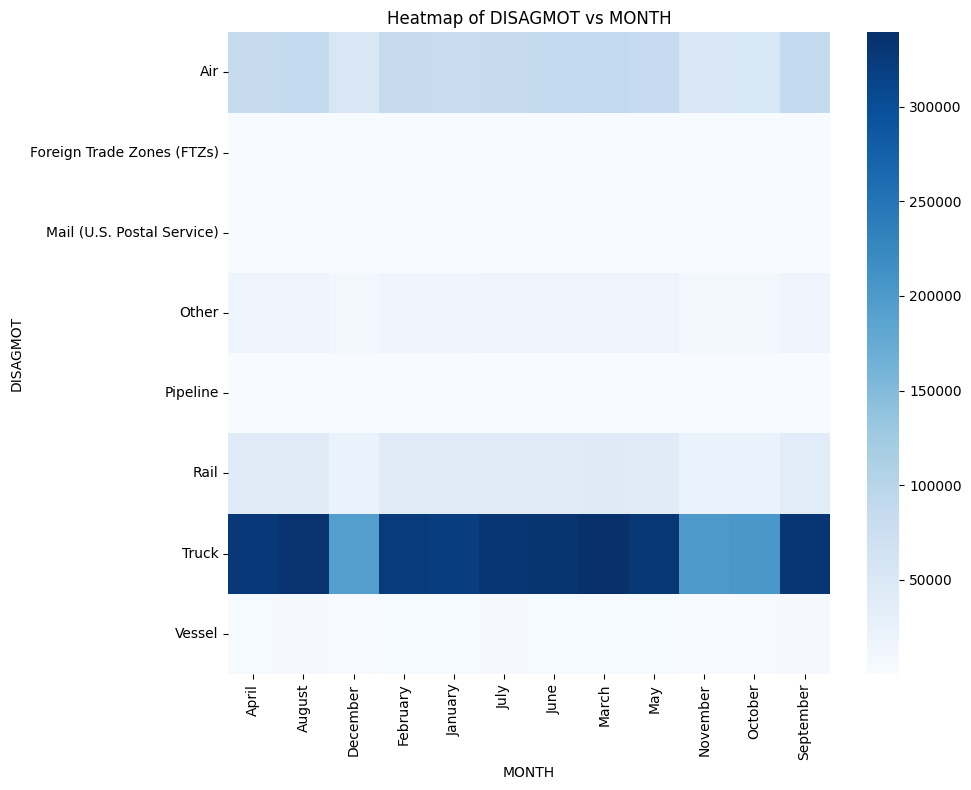


Cross-tabulation between DISAGMOT and YEAR:

YEAR                          2020    2021    2022    2023    2024
DISAGMOT                                                          
Air                         142469  201855  210764  213761  161365
Foreign Trade Zones (FTZs)    2078    2998    2877    3034    2171
Mail (U.S. Postal Service)     865    1175    1163    1230     895
Other                        26176   38926   45205   48353   36972
Pipeline                      1528    2190    2352    2266    1723
Rail                         72474   98396  100067   96747   71883
Truck                       553556  786762  801651  809563  618607
Vessel                        7092    9242   10354   10523    7890


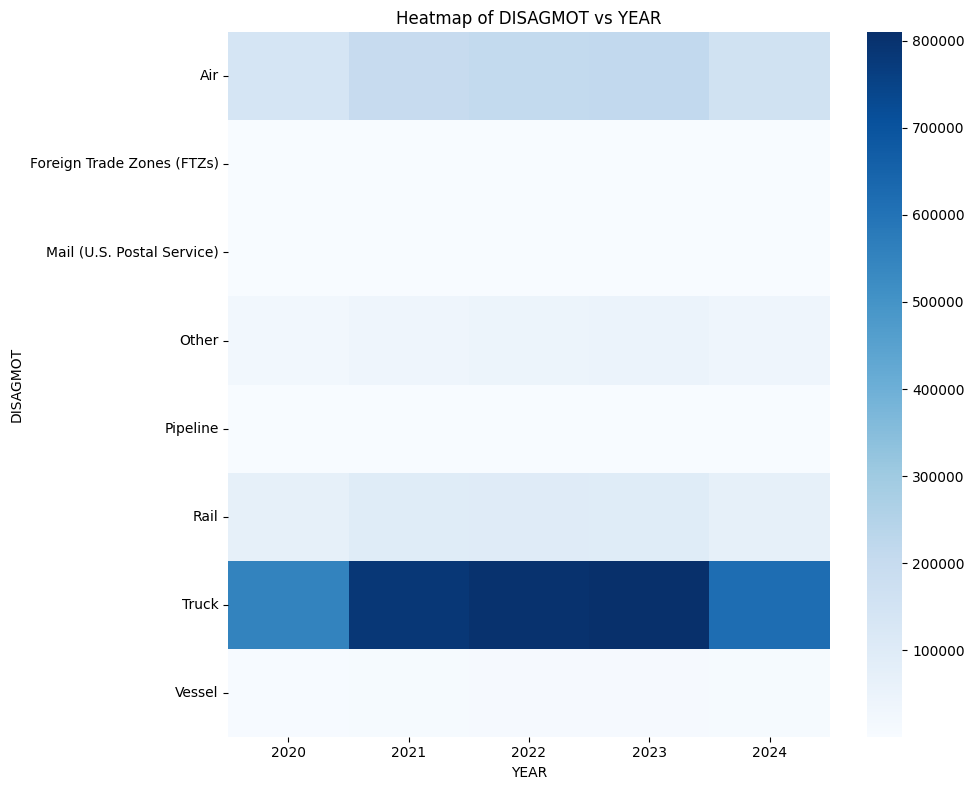


Cross-tabulation between MEXSTATE and CANPROV:

Empty DataFrame
Columns: []
Index: []
Skipping heatmap for MEXSTATE vs CANPROV as the crosstab is empty.

Cross-tabulation between MEXSTATE and COUNTRY:

COUNTRY              Mexico
MEXSTATE                   
Aguascalientes        38560
Baja California      106487
Baja California Sur   13497
Campeche              49108
Chiapas                3613
Chihuahua            107361
Coahuila              75872
Colima                 4408
Distrito Federal      96938
Durango               25817
Estado de Mexico     161671
Guanajuato            68703
Guerrero               3154
Hidalgo               22324
Jalisco               91074
Michoacán             14728
Morelos               19228
Nuevo Leon           144916
Oaxaca                 3360
Puebla                40036
Queretaro             75362
Quintana Roo           9335
San Luis Potosi       55340
Sinaloa               29061
Sonora                80236
State Unknown         68106
Tabasco      

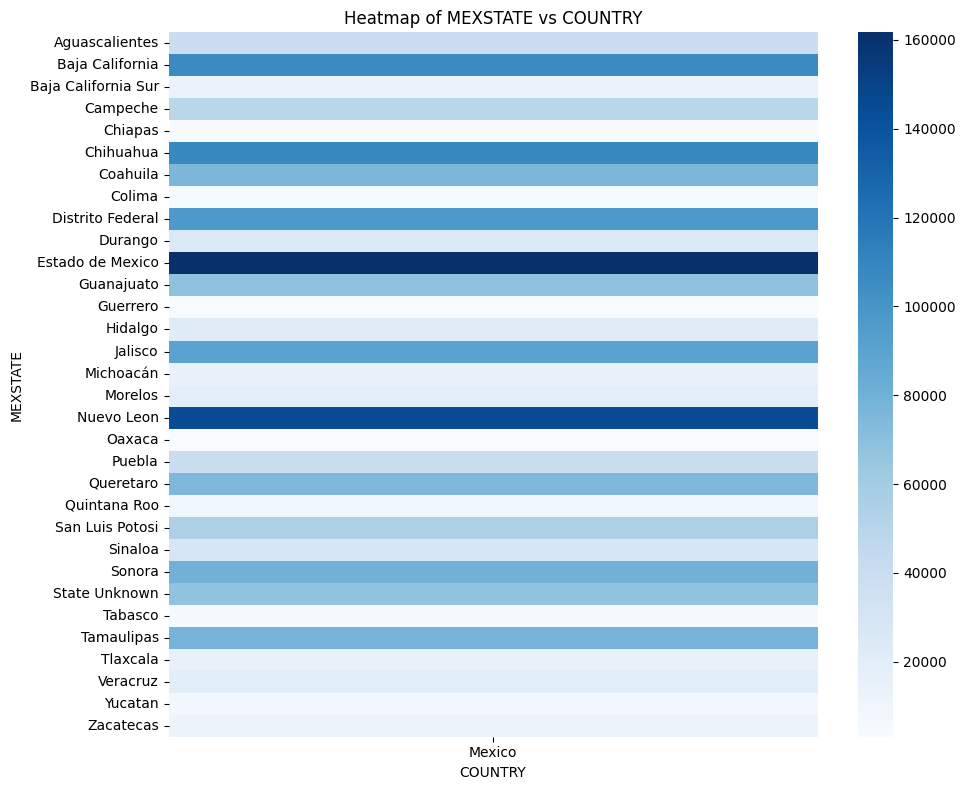


Cross-tabulation between MEXSTATE and DF:

DF                   domestic pr. merch  foreign pr. merch
MEXSTATE                                                  
Aguascalientes                    27515              11045
Baja California                   70468              36019
Baja California Sur                8808               4689
Campeche                          31594              17514
Chiapas                            2819                794
Chihuahua                         71983              35378
Coahuila                          54658              21214
Colima                             3387               1021
Distrito Federal                  68659              28279
Durango                           19992               5825
Estado de Mexico                 113400              48271
Guanajuato                        50562              18141
Guerrero                           2127               1027
Hidalgo                           18514               3810
Jalisco     

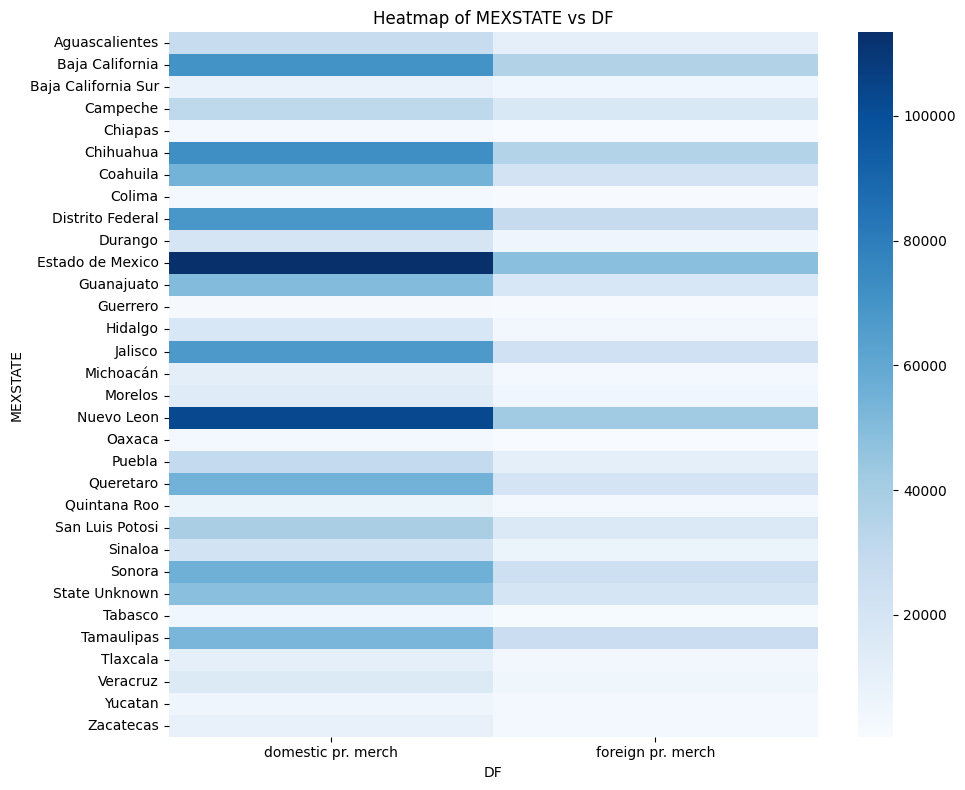


Cross-tabulation between MEXSTATE and CONTCODE:

CONTCODE             Containerized  Non-Containerized
MEXSTATE                                             
Aguascalientes                3380              35180
Baja California               7211              99276
Baja California Sur            246              13251
Campeche                       303              48805
Chiapas                        391               3222
Chihuahua                    14457              92904
Coahuila                      4492              71380
Colima                         432               3976
Distrito Federal              4640              92298
Durango                       1164              24653
Estado de Mexico             10406             151265
Guanajuato                    3501              65202
Guerrero                       583               2571
Hidalgo                       1999              20325
Jalisco                       6037              85037
Michoacán                     19

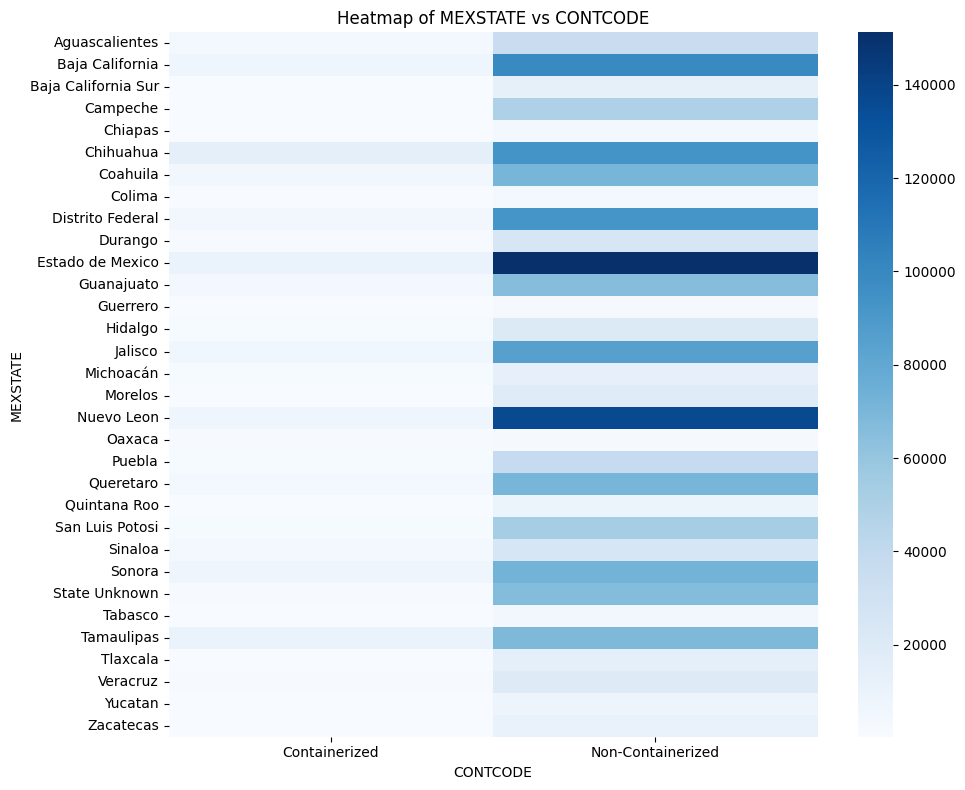


Cross-tabulation between MEXSTATE and MONTH:

MONTH                April  August  December  February  January   July   June  \
MEXSTATE                                                                        
Aguascalientes        3459    3648      2179      3507     3635   3528   3530   
Baja California       9620   10095      6038      9630     9552   9913   9912   
Baja California Sur   1246    1218       802      1232     1236   1192   1209   
Campeche              4536    4612      2684      4428     4424   4516   4599   
Chiapas                334     311       203       321      322    333    363   
Chihuahua             9867   10064      5956      9724     9619   9933   9978   
Coahuila              6859    7230      4234      6941     6959   7068   6938   
Colima                 354     398       292       368      376    437    393   
Distrito Federal      8968    9106      5268      8924     8867   8905   8945   
Durango               2407    2422      1384      2327     238

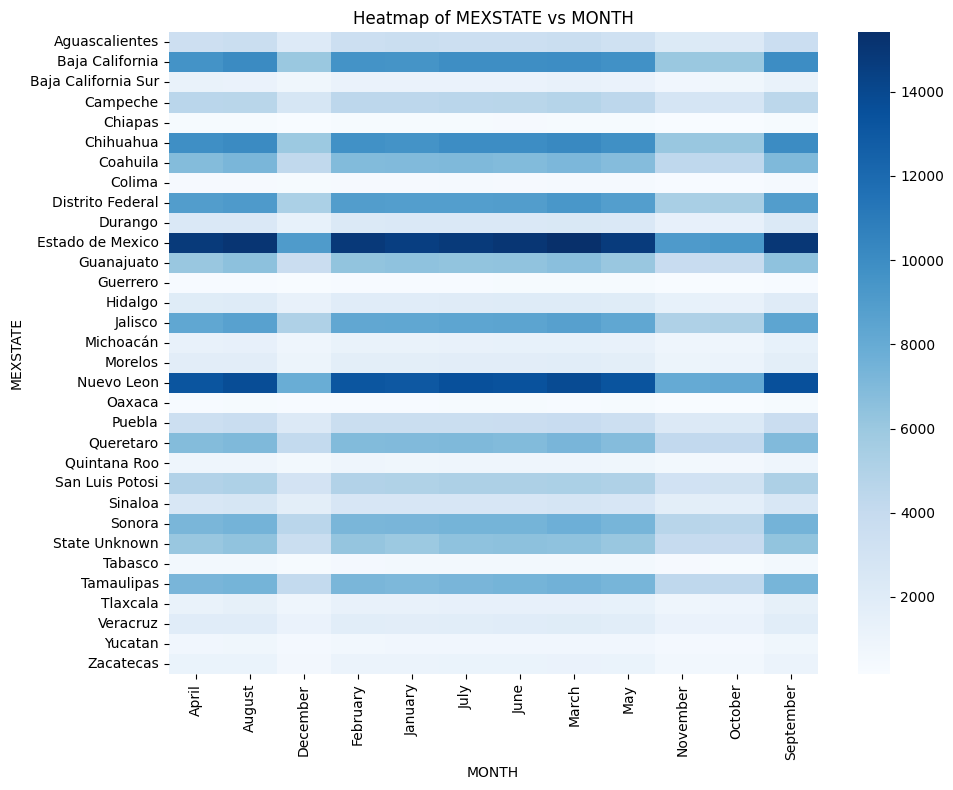


Cross-tabulation between MEXSTATE and YEAR:

YEAR                  2020   2021   2022   2023   2024
MEXSTATE                                              
Aguascalientes        5508   8317   8947   9006   6782
Baja California      14986  22479  23221  24913  20888
Baja California Sur   1839   2846   2986   3237   2589
Campeche              7259  10844  10892  11402   8711
Chiapas                536    757    789    881    650
Chihuahua            15596  22967  23430  25045  20323
Coahuila             11498  16236  17249  17390  13499
Colima                 642   1007    882   1035    842
Distrito Federal     15707  21421  21542  21982  16286
Durango               4373   5594   5646   5742   4462
Estado de Mexico     24251  35173  36114  37602  28531
Guanajuato           10831  15329  14989  15613  11941
Guerrero               277    379    826    977    695
Hidalgo               3090   4545   5136   5500   4053
Jalisco              14172  20087  20188  20805  15822
Michoacán          

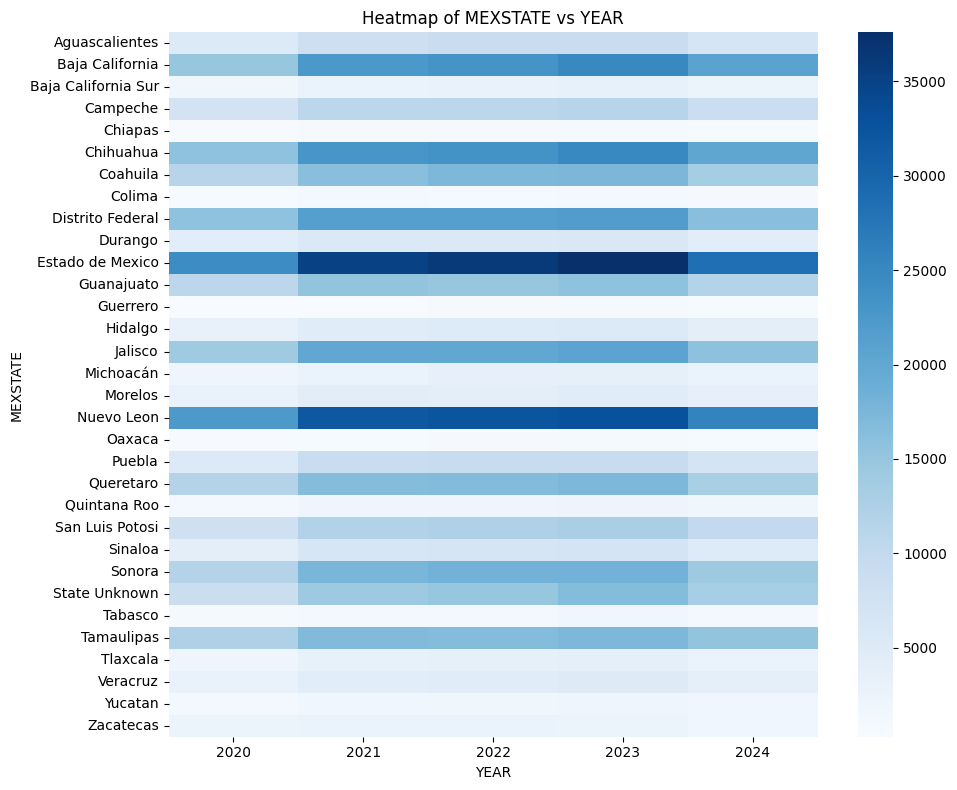


Cross-tabulation between CANPROV and COUNTRY:

COUNTRY                Canada
CANPROV                      
Alberta                431281
British Columbia       518984
Manitoba               358571
New Brunswick          146629
Newfoundland            15418
Northwest Territories     439
Nova Scotia             69816
Nunavut                   104
Ontario                905038
Prince Edward Island    25848
Province Unknown         5824
Quebec                 593071
Saskatchewan           177134
Yukon Territory          2375


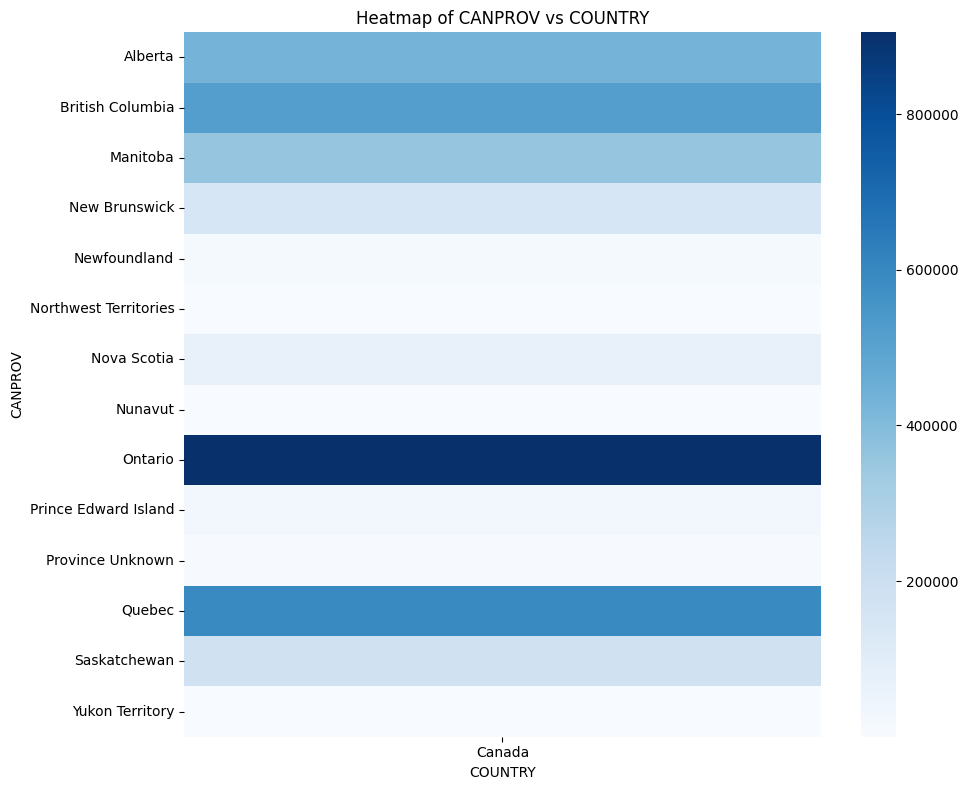


Cross-tabulation between CANPROV and DF:

DF                     Unknown  domestic pr. merch  foreign pr. merch
CANPROV                                                              
Alberta                 156706              175921              98654
British Columbia        185920              208075             124989
Manitoba                105333              164205              89033
New Brunswick            61883               58976              25770
Newfoundland             13350                1380                688
Northwest Territories      417                  22                  0
Nova Scotia              63614                4308               1894
Nunavut                    104                   0                  0
Ontario                 350924              332336             221778
Prince Edward Island     23648                1830                370
Province Unknown           108                5507                209
Quebec                  270479              196

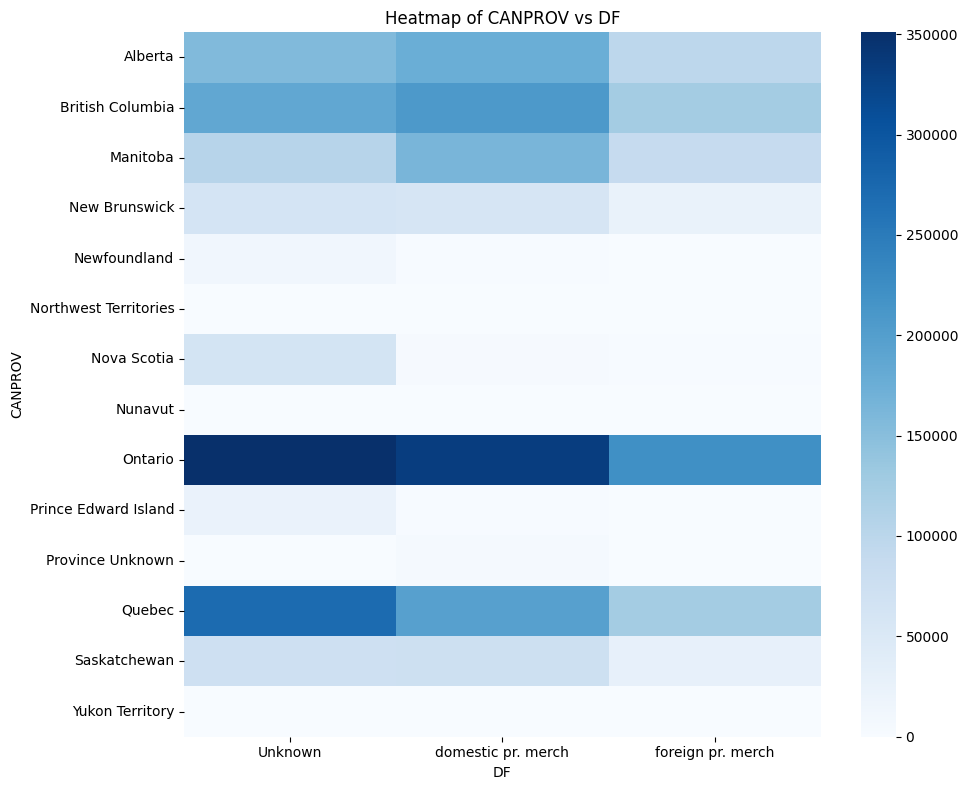


Cross-tabulation between CANPROV and CONTCODE:

CONTCODE               Containerized  Non-Containerized
CANPROV                                                
Alberta                       274575             156706
British Columbia              333064             185920
Manitoba                      253238             105333
New Brunswick                  84746              61883
Newfoundland                    2068              13350
Northwest Territories             22                417
Nova Scotia                     6202              63614
Nunavut                            0                104
Ontario                       554114             350924
Prince Edward Island            2200              23648
Province Unknown                5716                108
Quebec                        322592             270479
Saskatchewan                  103435              73699
Yukon Territory                 1172               1203


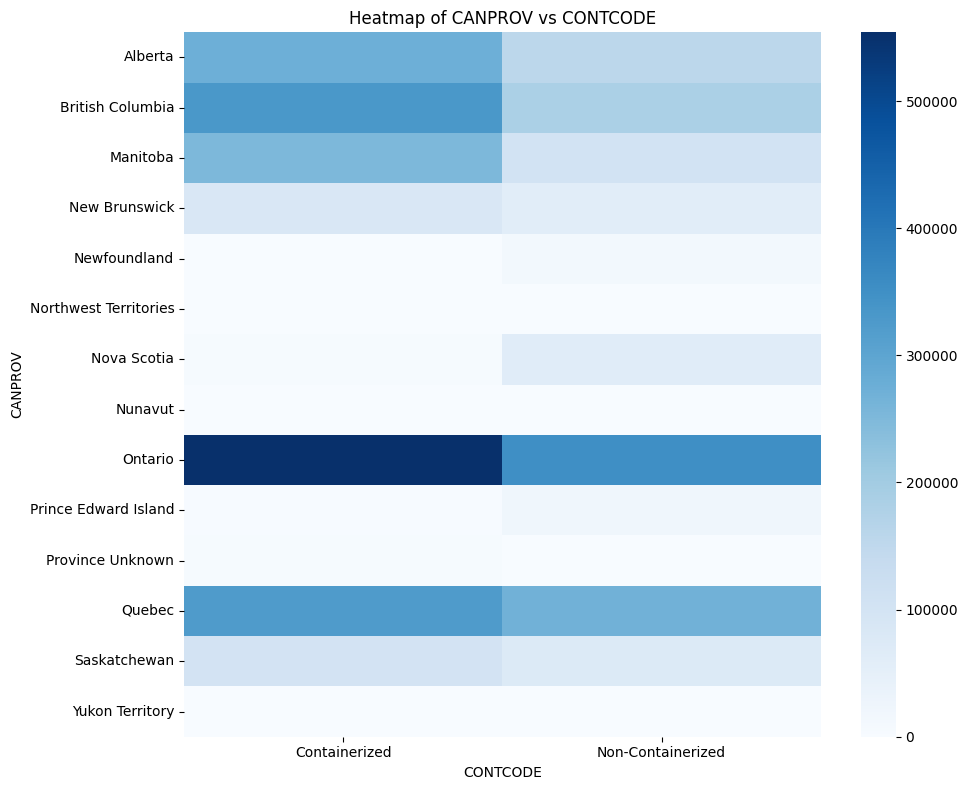


Cross-tabulation between CANPROV and MONTH:

MONTH                  April  August  December  February  January   July  \
CANPROV                                                                    
Alberta                40208   40283     23760     39171    38665  39760   
British Columbia       48086   48579     28124     47027    46283  48113   
Manitoba               33248   33340     19653     32427    31934  32918   
New Brunswick          13427   13949      7895     12933    13016  13792   
Newfoundland            1401    1559       730      1255     1251   1530   
Northwest Territories     39      44        20        37       33     43   
Nova Scotia             6401    6540      3805      6173     6198   6411   
Nunavut                    2      14         6         8       16     12   
Ontario                83575   84197     49518     82612    82220  83659   
Prince Edward Island    2426    2360      1396      2210     2238   2359   
Province Unknown         543     530      

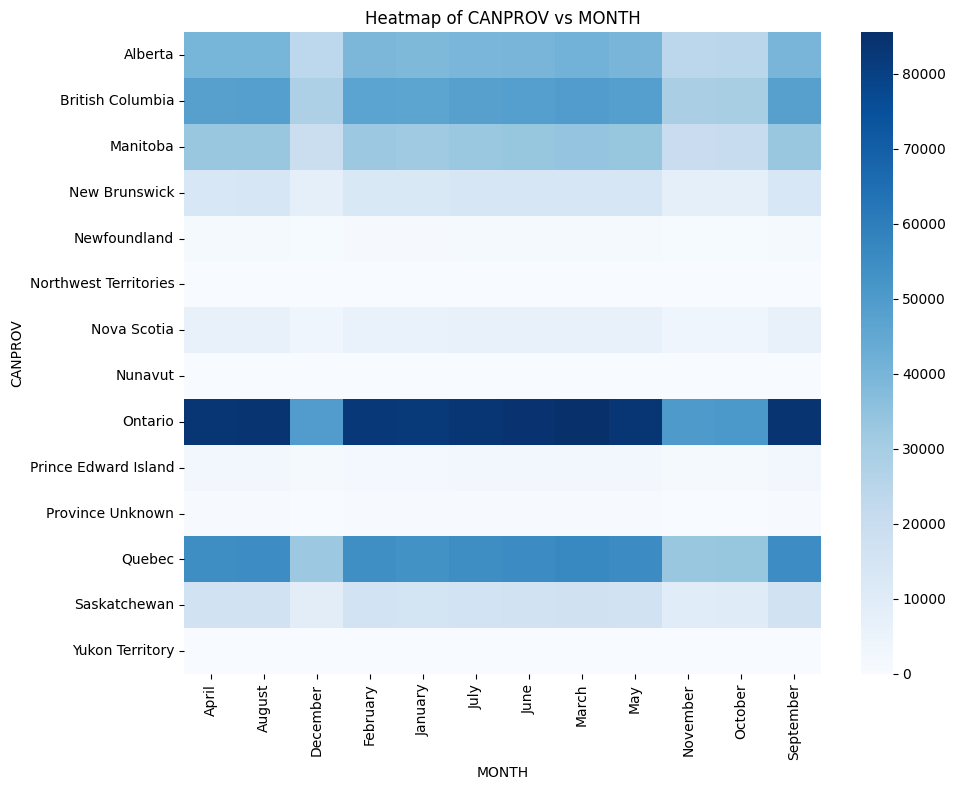


Cross-tabulation between CANPROV and YEAR:

YEAR                     2020    2021    2022    2023    2024
CANPROV                                                      
Alberta                 66869   95221   99135   97383   72673
British Columbia        81784  115076  117411  116942   87771
Manitoba                55049   78165   81322   81655   62380
New Brunswick           22967   32249   32976   32973   25464
Newfoundland             2467    3360    3537    3354    2700
Northwest Territories      58      74     103     113      91
Nova Scotia             10968   15023   16346   15844   11635
Nunavut                     8      16      36      20      24
Ontario                144821  200568  204127  203264  152258
Prince Edward Island     3723    5641    6090    6003    4391
Province Unknown          965    1290    1296    1306     967
Quebec                  94774  130727  134052  133156  100362
Saskatchewan            27039   38387   40287   40538   30883
Yukon Territory          

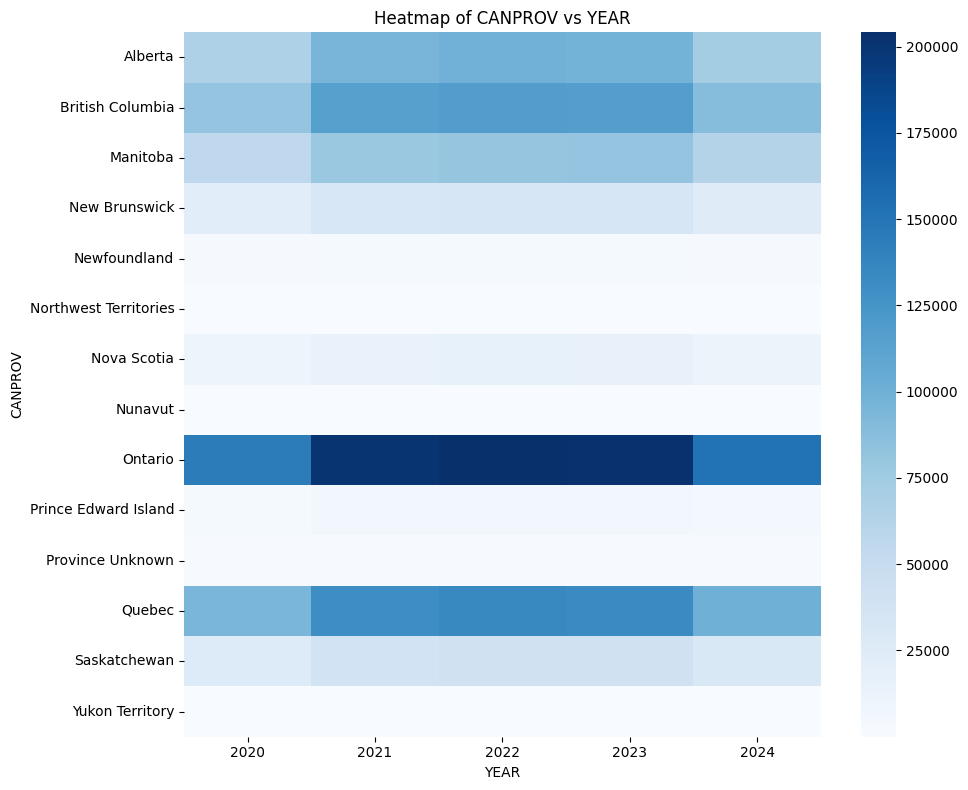


Cross-tabulation between COUNTRY and DF:

DF       Unknown  domestic pr. merch  foreign pr. merch
COUNTRY                                                
Canada   1307388             1224726             718418
Mexico    291070             1173358             494238


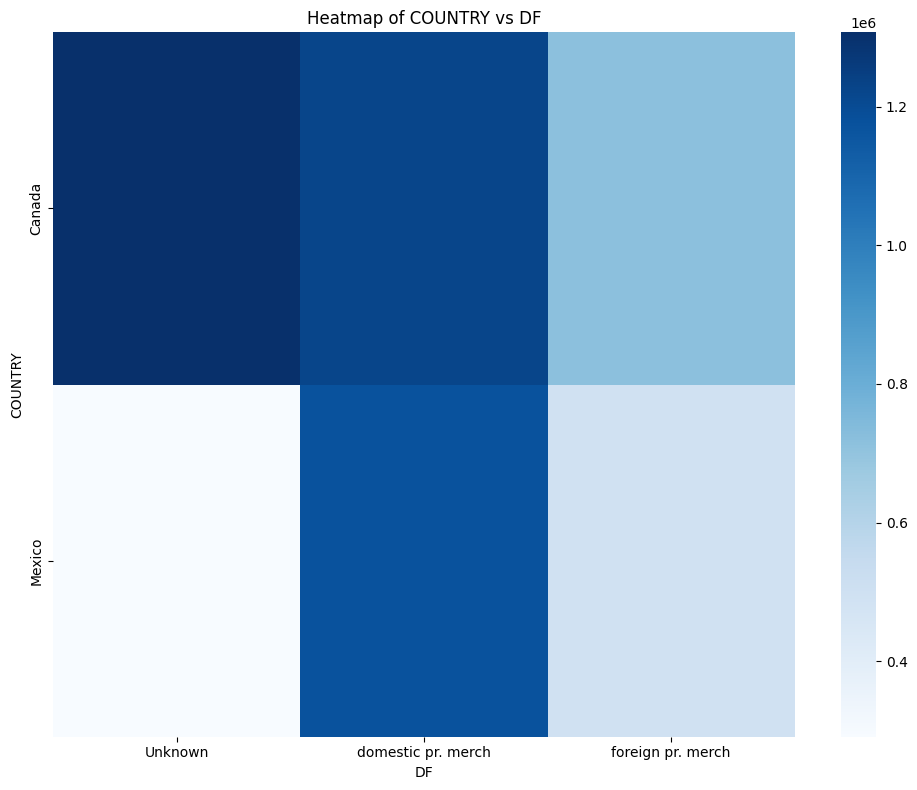


Cross-tabulation between COUNTRY and CONTCODE:

CONTCODE  Containerized  Non-Containerized
COUNTRY                                   
Canada          1943144            1307388
Mexico           105100            1853566


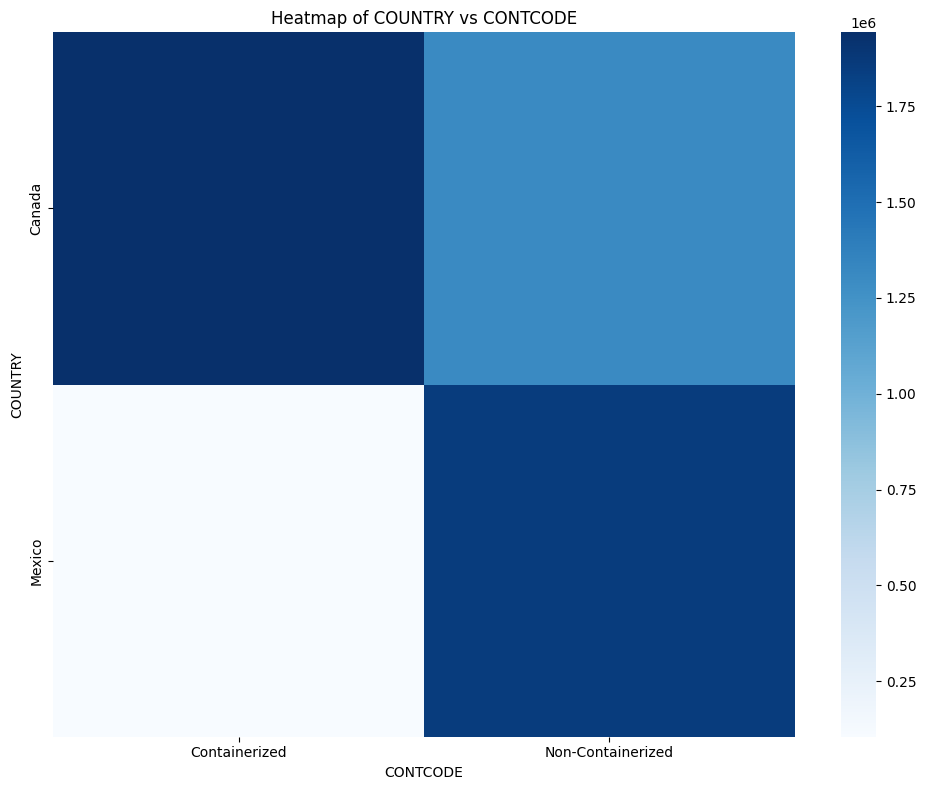


Cross-tabulation between COUNTRY and MONTH:

MONTH     April  August  December  February  January    July    June   March  \
COUNTRY                                                                        
Canada   300817  302995    177145    294849   291487  300296  303376  309650   
Mexico   178281  183797    108691    178111   177199  181109  181756  186821   

MONTH       May  November  October  September  
COUNTRY                                        
Canada   302446    181537   184462     301472  
Mexico   178209    111027   111714     181951  


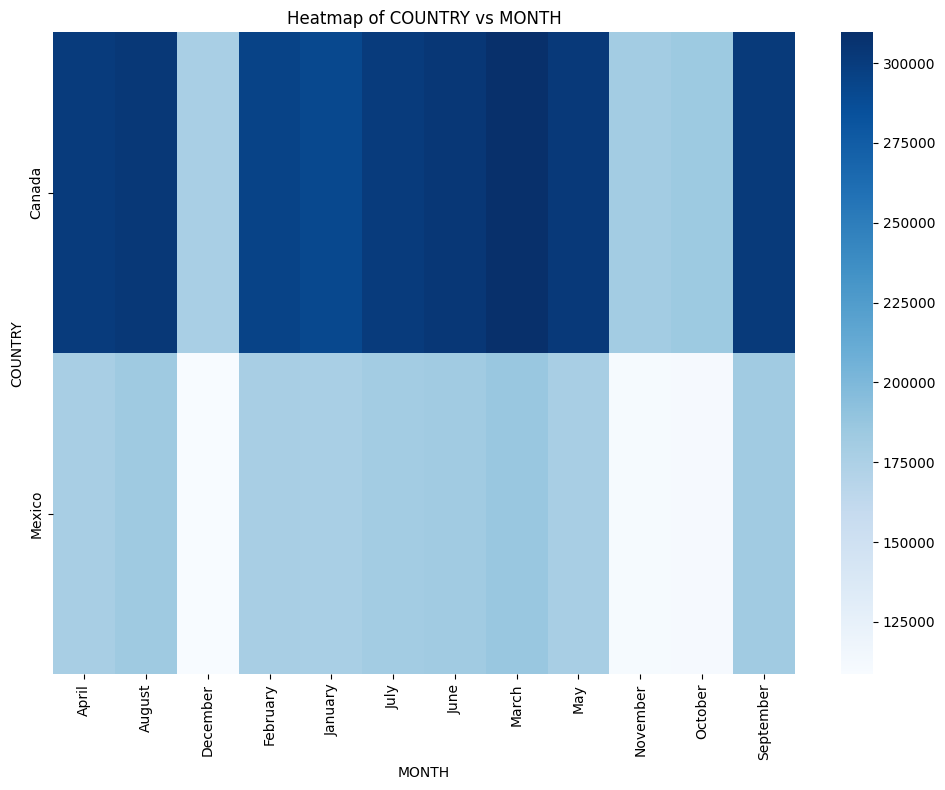


Cross-tabulation between COUNTRY and YEAR:

YEAR       2020    2021    2022    2023    2024
COUNTRY                                        
Canada   511837  716256  737279  733109  552051
Mexico   294401  425288  437154  452368  349455


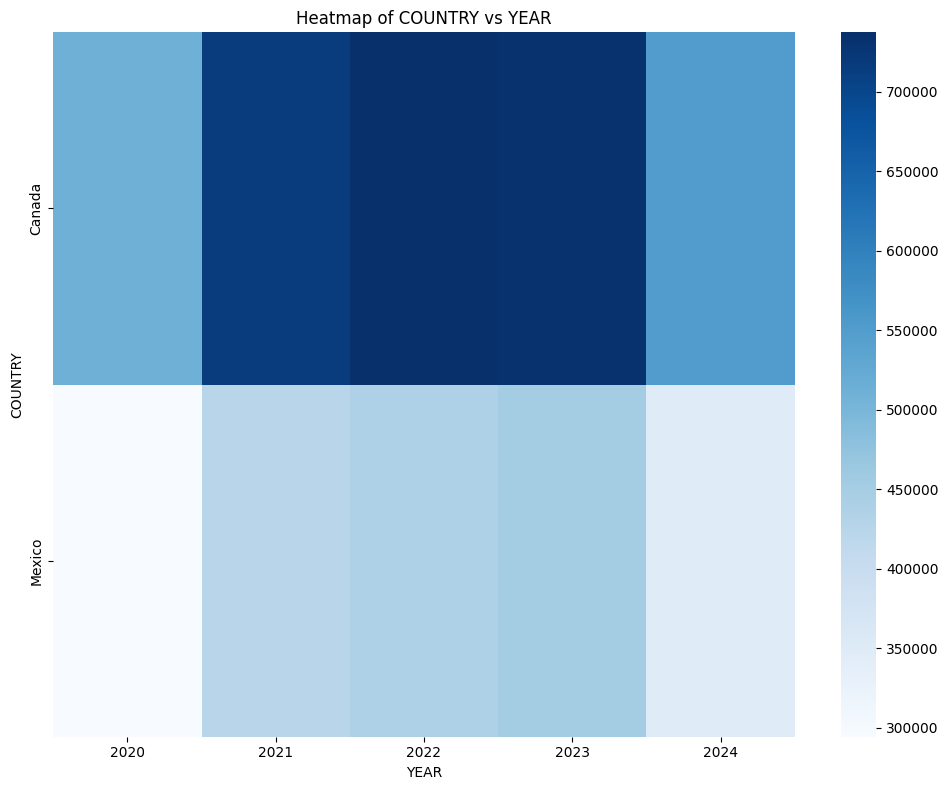


Cross-tabulation between DF and CONTCODE:

CONTCODE            Containerized  Non-Containerized
DF                                                  
Unknown                         0            1598458
domestic pr. merch        1310402            1087682
foreign pr. merch          737842             474814


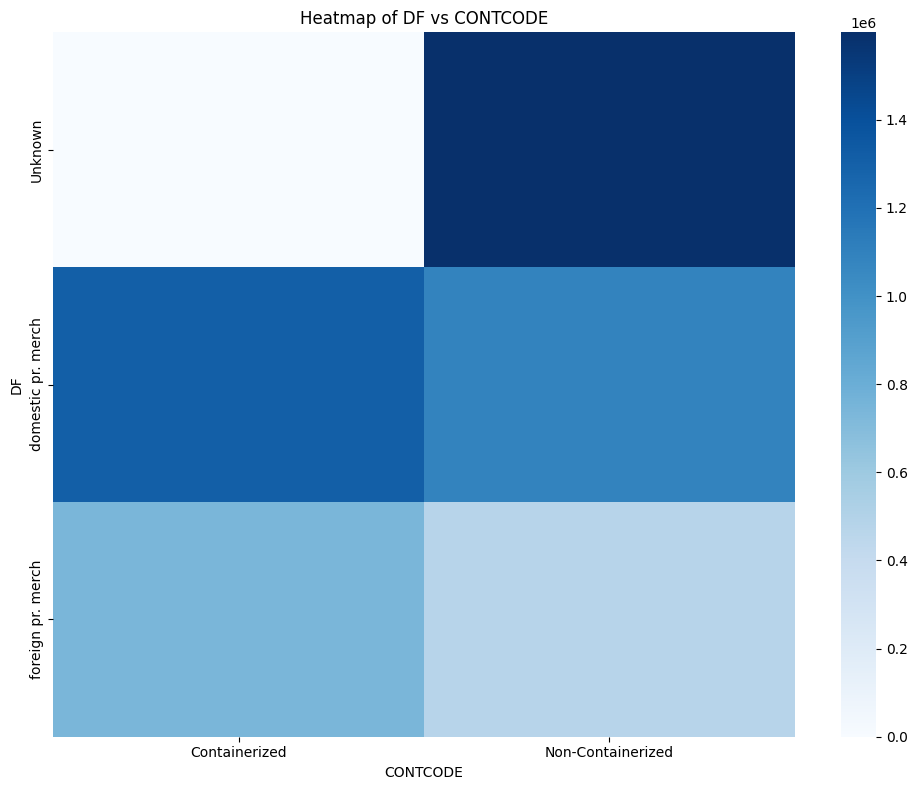


Cross-tabulation between DF and MONTH:

MONTH                April  August  December  February  January    July  \
DF                                                                        
Unknown             146963  148664     87771    145292   144197  147654   
domestic pr. merch  221300  224404    131391    217479   215709  221708   
foreign pr. merch   110835  113724     66674    110189   108780  112043   

MONTH                 June   March     May  November  October  September  
DF                                                                        
Unknown             148552  150675  148202     90272    91268     148948  
domestic pr. merch  223933  229114  221393    134178   135665     221810  
foreign pr. merch   112647  116682  111060     68114    69243     112665  


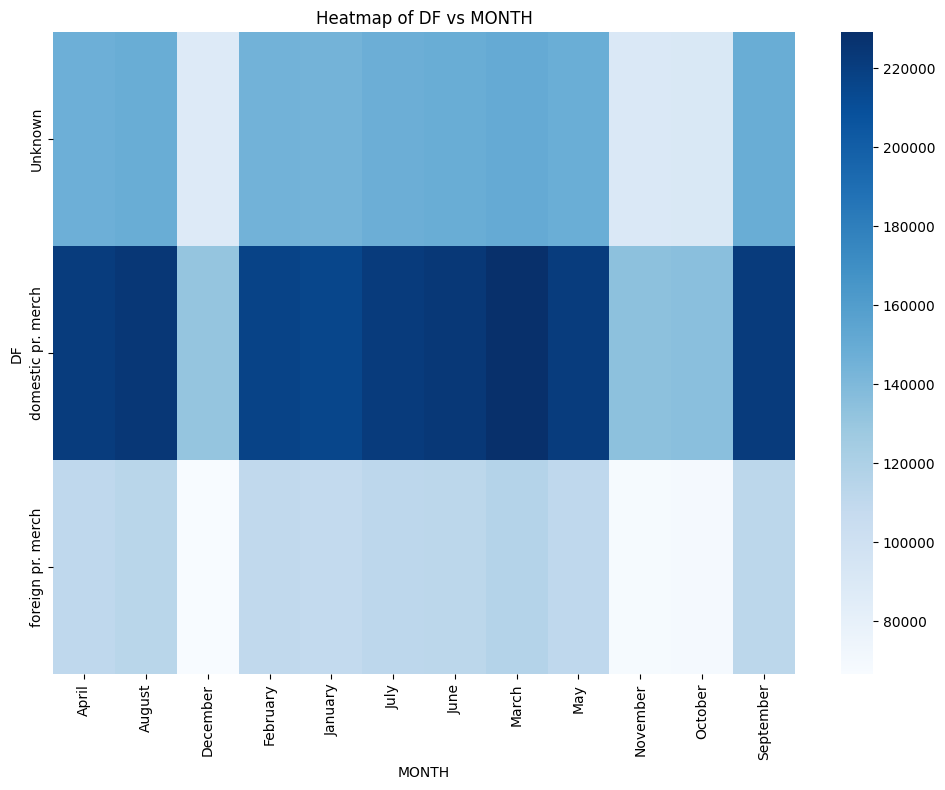


Cross-tabulation between DF and YEAR:

YEAR                  2020    2021    2022    2023    2024
DF                                                        
Unknown             251822  354284  360217  361075  271060
domestic pr. merch  372293  523869  538588  546040  417294
foreign pr. merch   182123  263391  275628  278362  213152


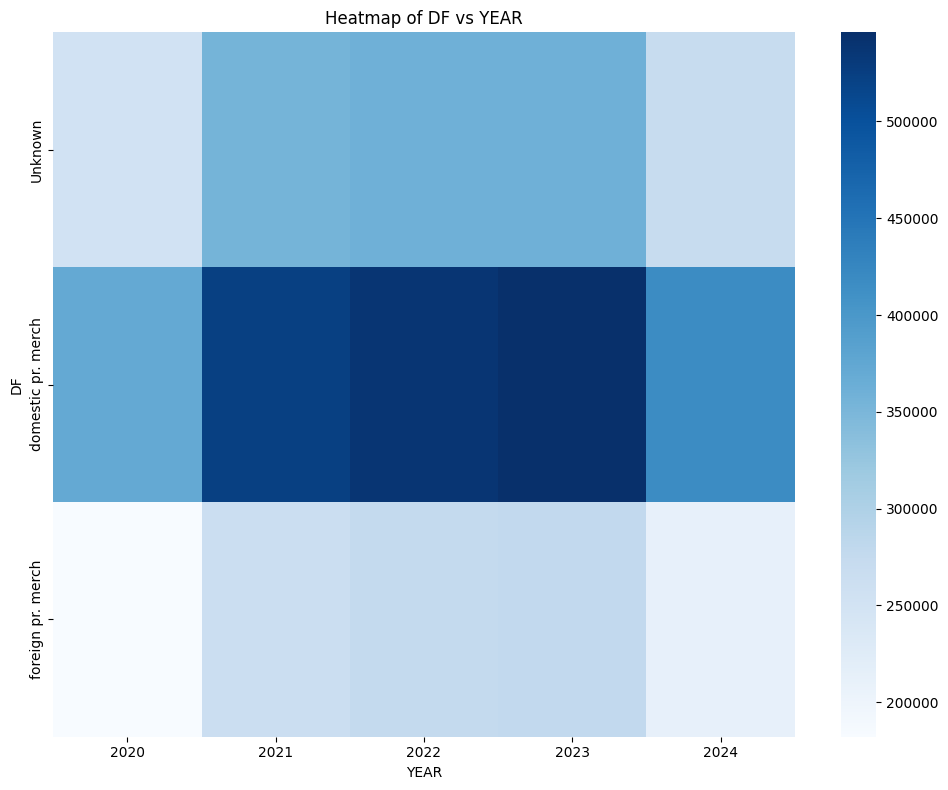


Cross-tabulation between CONTCODE and MONTH:

MONTH               April  August  December  February  January    July  \
CONTCODE                                                                 
Containerized      189736  191275    112361    184866   182247  189317   
Non-Containerized  289362  295517    173475    288094   286439  292088   

MONTH                June   March     May  November  October  September  
CONTCODE                                                                 
Containerized      191774  196173  190441    114461   116235     189358  
Non-Containerized  293358  300298  290214    178103   179941     294065  


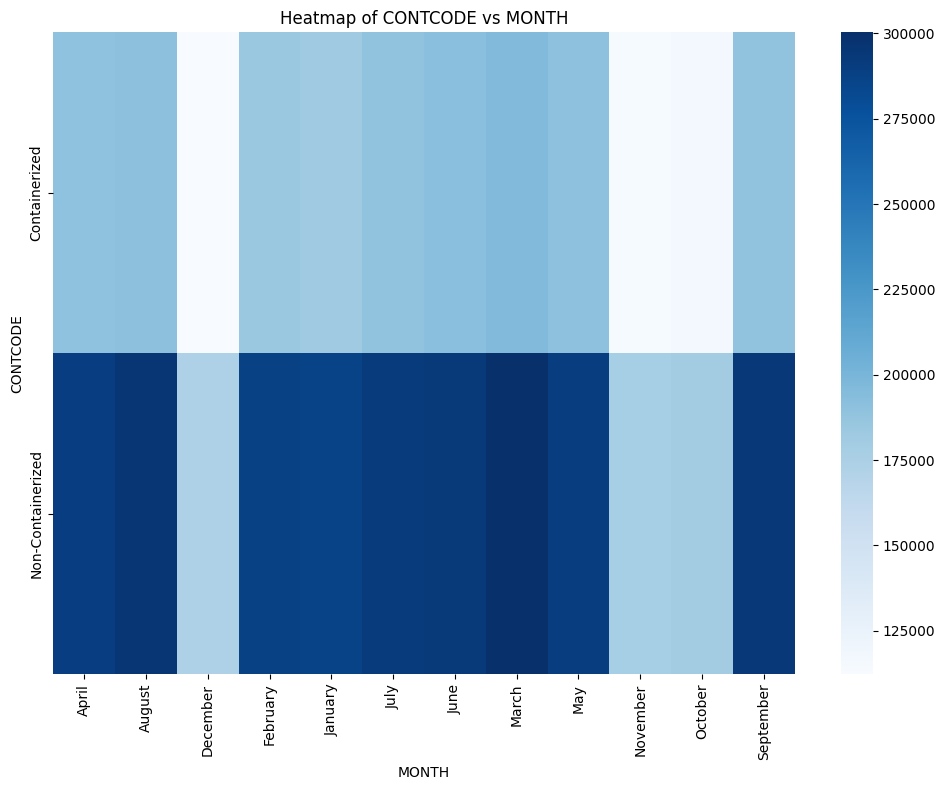


Cross-tabulation between CONTCODE and YEAR:

YEAR                 2020    2021    2022    2023    2024
CONTCODE                                                 
Containerized      317232  445807  468092  465025  352088
Non-Containerized  489006  695737  706341  720452  549418


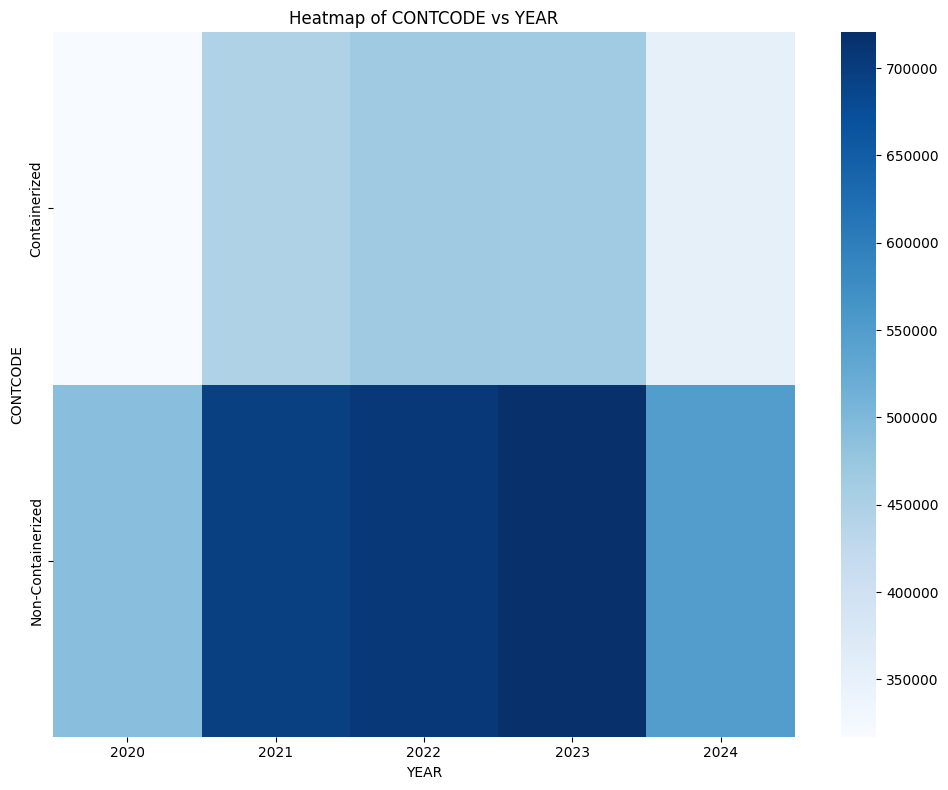


Cross-tabulation between MONTH and YEAR:

YEAR        2020   2021    2022    2023    2024
MONTH                                          
April      83139  96141   99262   97988  102568
August     90525  95777   99430  100247  100813
December       0  94457   95191   96188       0
February   92427  90261   95225   96243   98804
January    92511  90762   92233   96245   96935
July       89892  95676   97307   97809  100721
June       88244  96600   99656  100571  100061
March      94715  98022  101294  101861  100579
May        82909  95484   99596  100530  102136
November       0  95876   97649   99039       0
October        0  97083   99029  100064       0
September  91876  95405   98561   98692   98889


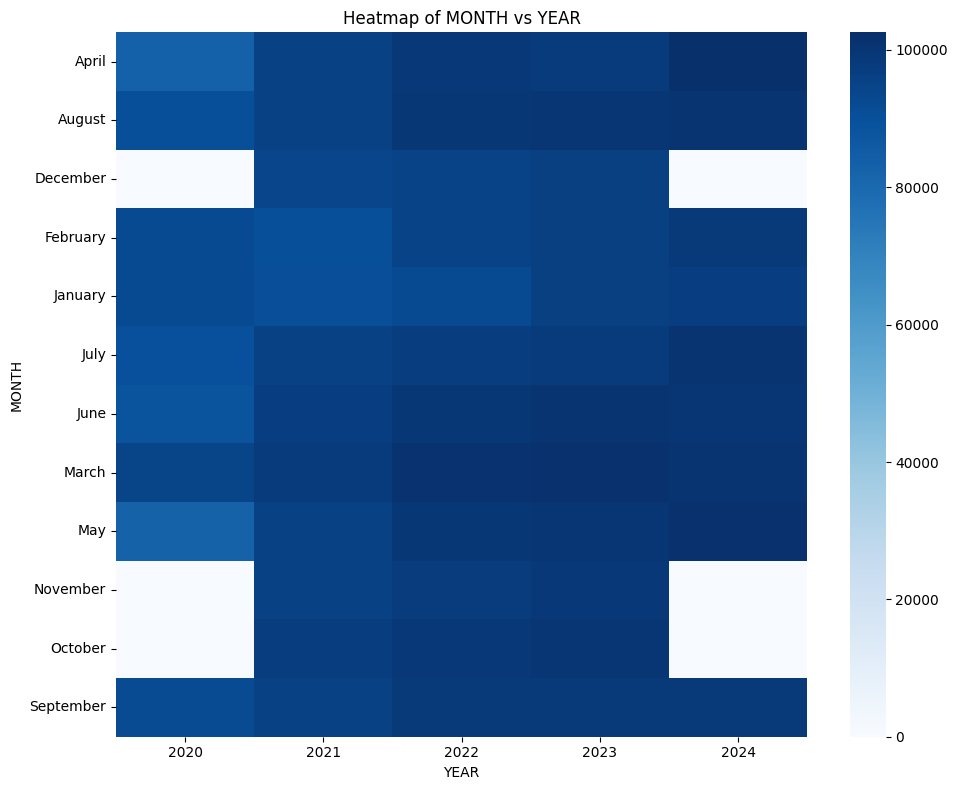

In [8]:
# Categorical vs Categorical Analysis
print("\nCategorical vs Categorical Analysis:")
for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i+1:]:
        # Cross-tabulation
        crosstab = pd.crosstab(dfn[cat_col1], dfn[cat_col2])
        print(f"\nCross-tabulation between {cat_col1} and {cat_col2}:\n")
        print(crosstab)

        # Skip heatmap if crosstab is empty
        if crosstab.empty:
            print(f"Skipping heatmap for {cat_col1} vs {cat_col2} as the crosstab is empty.")
            continue

        # Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(crosstab, cmap="Blues", cbar=True, annot=False)
        plt.title(f"Heatmap of {cat_col1} vs {cat_col2}")
        plt.xlabel(cat_col2)
        plt.ylabel(cat_col1)
        plt.tight_layout()
        plt.show()


## Exploratory Data Analysis (EDA) 

 ### Univariate Analysis 

### Bivariate Analysis

### Multivariate Analysis

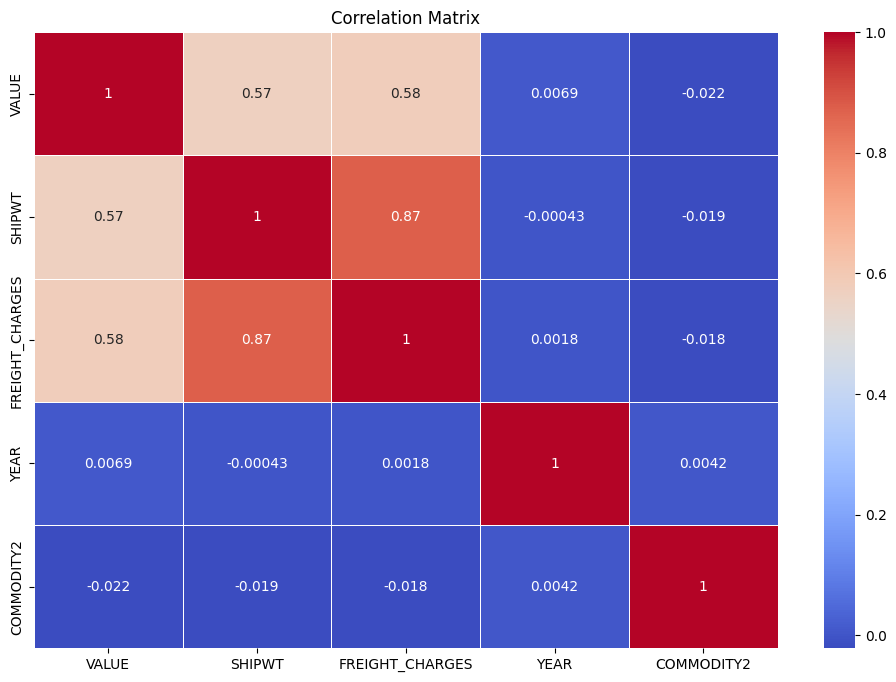

In [8]:
# Select only the numeric columns
numeric_df = dfn.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Key Analystical Questions

1. What is the distribution of trade types (import/export) across different transportation modes?

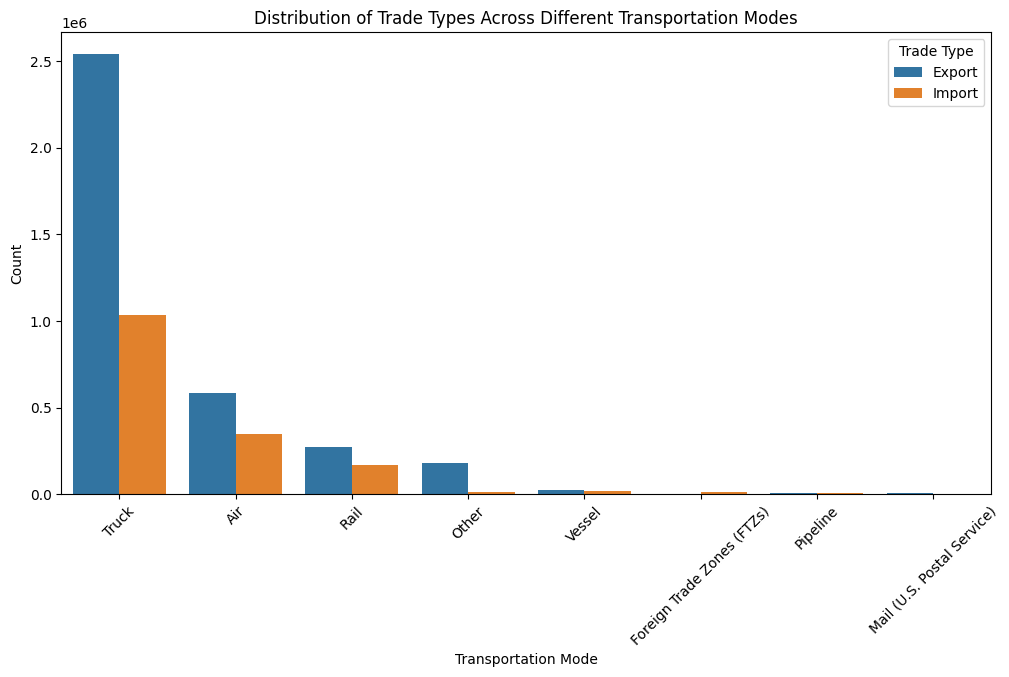

In [5]:
# Plot the distribution of trade types across different transportation modes
plt.figure(figsize=(12, 6))
sns.countplot(data=dfn, x='DISAGMOT', hue='TRDTYPE', order=dfn['DISAGMOT'].value_counts().index)
plt.title('Distribution of Trade Types Across Different Transportation Modes')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Trade Type')
plt.show()

### Key Observations:

- Dominance of Truck Transportation:

Trucks are the most frequently used mode of transportation for both exports and imports, with exports significantly higher than imports.
This suggests that road transport plays a critical role in trade, likely due to cross-border transportation with neighboring countries or regional trade agreements.

- Air Transportation:

Air is the second-most utilized mode, though its usage is considerably lower than trucks.
Exports by air are notably higher than imports, indicating air transport may be preferred for high-value, time-sensitive export goods.

- Rail and Other Modes:

Rail and the category labeled as "Other" are less frequently used than trucks and air, but they still contribute to both imports and exports.
Rail’s usage might be tied to specific industries like bulk goods (e.g., agriculture or raw materials).

- Low Utilization of Other Modes:

Vessel, Foreign Trade Zones (FTZs), Pipelines, and Mail have minimal usage compared to the dominant modes.
These modes may cater to niche markets or specialized goods (e.g., oil and gas for pipelines).

- Export vs. Import Trends:

Across all transportation modes, exports are consistently higher than imports, suggesting that the country might have a trade surplus or is more export-oriented in its freight transportation dynamics.

- Transportation Choices Vary by Trade Type:

The difference between export and import volumes in truck and air transport suggests potential trade imbalances or logistical preferences.


2. Which country is the top trading partner in terms of total trade value?

C:\Users\DELL\AppData\Local\Temp\ipykernel_12488\622584066.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=country_trade_value.index, y=country_trade_value.values, palette='viridis')


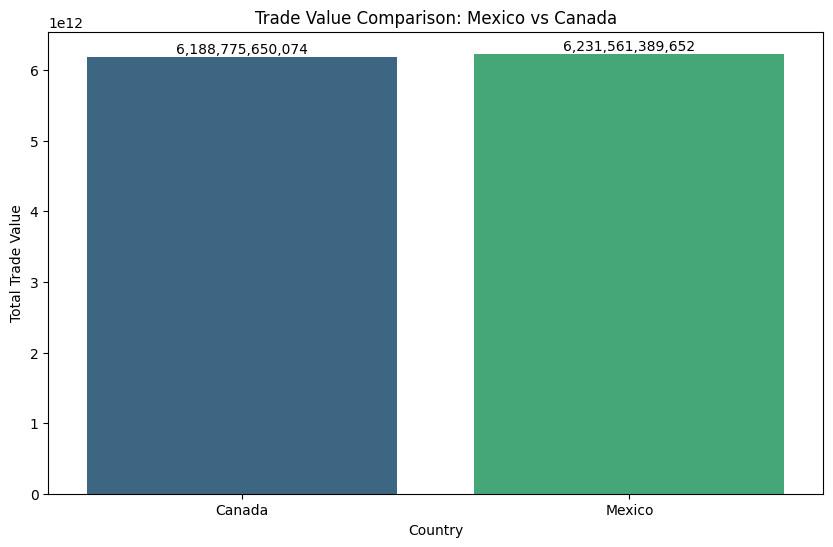

In [12]:
# Calculate the total trade value for each country
country_trade_value = dfn.groupby('COUNTRY')['VALUE'].sum()

# Plot the trade value for Mexico and Canada
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=country_trade_value.index, y=country_trade_value.values, palette='viridis')
plt.title('Trade Value Comparison: Mexico vs Canada')
plt.xlabel('Country')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=0)

# Annotate the bars with the trade value
for index, value in enumerate(country_trade_value.values):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.show()

## Key Observations:

#### Similar Total Trade Values:

The total trade values for Canada and Mexico are remarkably close:

- Canada: 6,188,775,650,074

- Mexico: 6,231,561,389,652

This indicates that both countries are significant trade partners, likely contributing similarly to the overall trade ecosystem.

#### Slight Edge for Mexico:

Mexico's trade value is slightly higher than Canada's, although the difference is minimal. This could imply:

- A larger trade volume with Mexico.

- Higher-value goods being traded with Mexico.

- Differences in trade agreements or relationships with key partners.

#### Balanced Trade Engagement:

Both countries likely have strong trade partnerships and diversified trade portfolios, considering the proximity of their total trade values.


3. How does the shipping weight vary across different transportation modes?

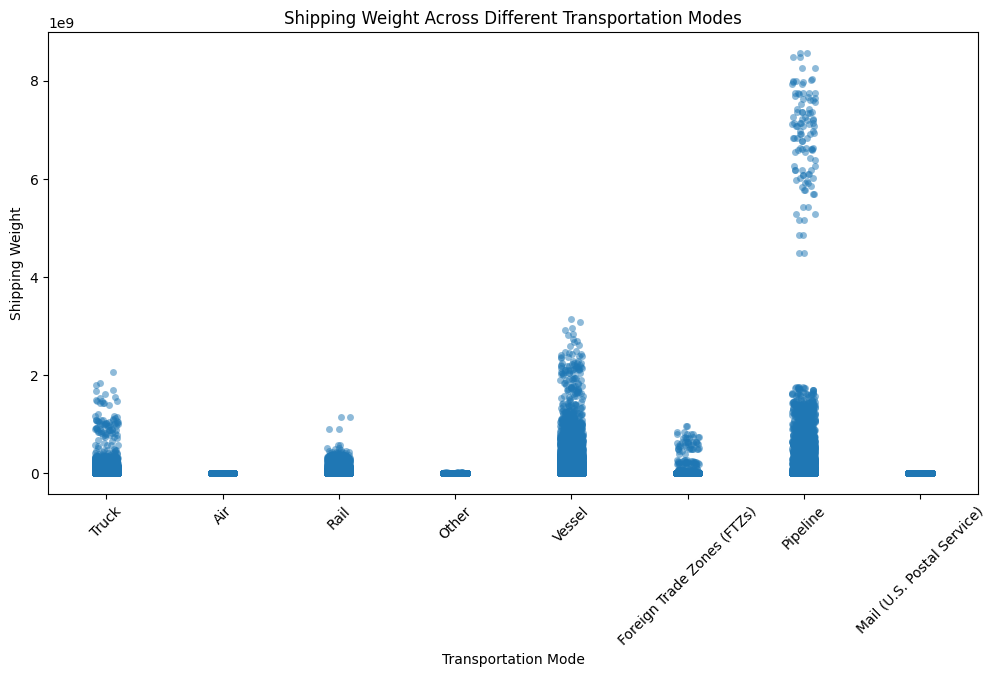

In [14]:
# Plot the distribution of shipping weight across different transportation modes using a strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=dfn, x='DISAGMOT', y='SHIPWT', order=dfn['DISAGMOT'].value_counts().index, jitter=True, alpha=0.5)
plt.title('Shipping Weight Across Different Transportation Modes')
plt.xlabel('Transportation Mode')
plt.ylabel('Shipping Weight')
plt.xticks(rotation=45)
plt.show()

### Key Observations:
- Dominance of Pipelines in Weight Capacity:

Pipelines show the highest shipping weight, with several data points reaching close to
9×10^9
 .
This suggests pipelines are primarily used for transporting bulk materials (e.g., oil, gas) that require high weight capacity.

- Trucks as a Popular Mode:

Trucks also exhibit a high density of data points, with shipping weights reaching 
2×10^9
 .
This indicates trucks are heavily relied upon for versatile, medium-to-heavy cargo transport over shorter distances.

- Air and Mail as Outliers:

Air and Mail (U.S. Postal Service) show significantly lower shipping weights.
These modes are likely used for lightweight, high-value goods or time-sensitive shipments.

- Diverse Distribution for Rail and Vessel:

Rail and Vessel modes exhibit mid-range shipping weights, suggesting they are used for a mix of heavy and bulk cargo, especially over long distances.

- Foreign Trade Zones (FTZs) and Others:

Foreign Trade Zones and "Other" transportation modes show sparse data points with moderate weights, indicating niche usage scenarios.



### Insights:

- Efficiency in Bulk Transport:

Pipelines and vessels excel in transporting high-weight goods, making them cost-effective for commodities like crude oil and grains.

- Versatility of Trucks:

Trucks’ widespread usage across varying shipping weights makes them crucial for last-mile delivery and medium-range logistics.

- Mode Selection:

Businesses may prioritize modes like air or mail for low-weight goods requiring speed, while heavy commodities are routed through pipelines or vessels.

- Environmental and Cost Considerations:

High-weight modes like pipelines may have environmental implications but could also offer cost benefits compared to road-based transport.

4. What are the trends in trade value over the years?

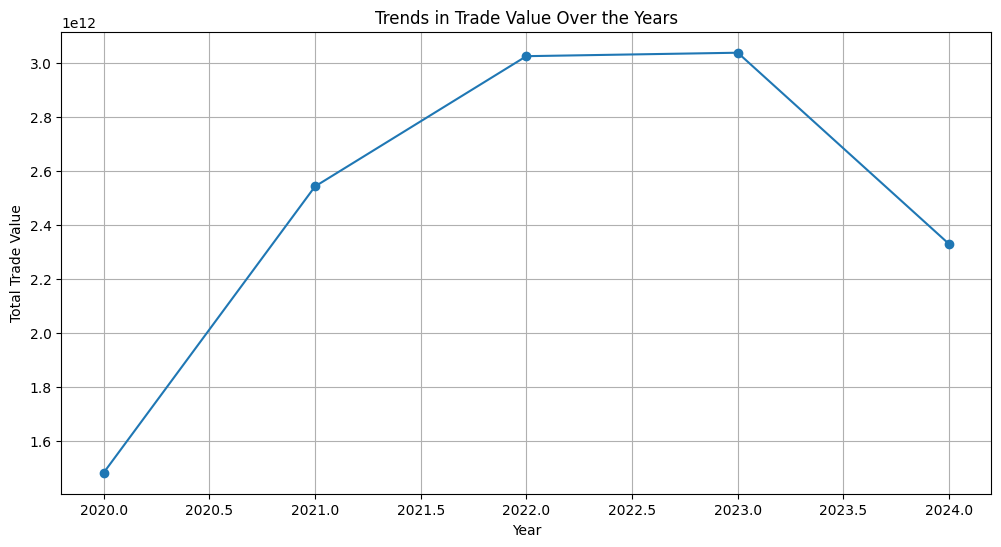

In [15]:
# Calculate the total trade value for each year
yearly_trade_value = dfn.groupby('YEAR')['VALUE'].sum()

# Plot the trade value trends over the years
plt.figure(figsize=(12, 6))
yearly_trade_value.plot(kind='line', marker='o')
plt.title('Trends in Trade Value Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Trade Value')
plt.grid(True)
plt.show()

### Key Observations:
- Steady Growth (2020–2022):

Trade value experienced consistent growth, increasing from approximately 
1.6×10^12
  in 2020 to a peak of 
3.0×10^12
  in 2022.
This growth suggests economic recovery and expansion during this period, potentially following disruptions like the COVID-19 pandemic.

- Stagnation at the Peak (2022–2023):

The trade value plateaued between 2022 and 2023, maintaining its peak at 
3.0×10^12
 .
This could indicate a stabilization of trade volumes, where growth factors balanced out challenges like inflation, supply chain disruptions, or geopolitical tensions.

- Decline in 2024:

A sharp decline in trade value occurred in 2024, dropping back to the levels of around 
2.5×10^12
 .
Possible reasons could include economic slowdowns, shifts in trade policies, or reductions in global demand for goods and services.


### Insights:
- Economic Cycles:

The growth in trade values during 2020–2022 aligns with recovery trends post-pandemic. However, the decline in 2024 highlights the cyclic nature of trade, potentially influenced by global economic headwinds.

- Policy and Market Impacts:

The stagnation in 2022–2023 may result from stabilization in global trade policies, while the 2024 drop could suggest changes in market dynamics, such as stricter regulations or reduced international cooperation.

- Opportunities for Further Analysis:

Examine contributing factors to the 2024 drop, such as sectoral performance, regional trends, or currency fluctuations.
Investigate the role of specific trade agreements or disruptions impacting overall trade volumes.

5. Which commodities have the highest trade value?


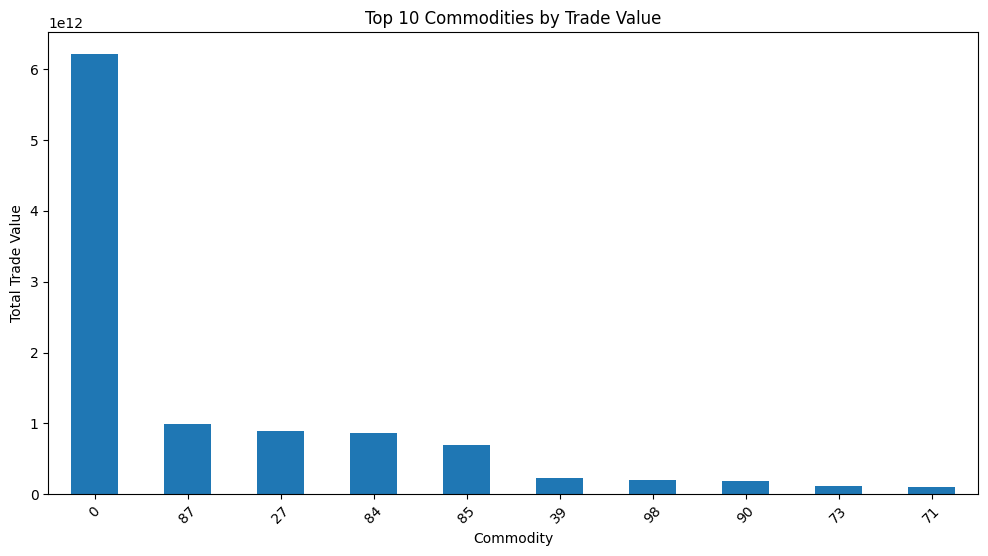

In [16]:
# Calculate the total trade value for each commodity
commodity_trade_value = dfn.groupby('COMMODITY2')['VALUE'].sum().sort_values(ascending=False)

# Plot the top 10 commodities by trade value
plt.figure(figsize=(12, 6))
commodity_trade_value.head(10).plot(kind='bar')
plt.title('Top 10 Commodities by Trade Value')
plt.xlabel('Commodity')
plt.ylabel('Total Trade Value')
plt.xticks(rotation=45)
plt.show()

### Key Observations:
- Dominant Commodity (0):

Commodity 0 stands out with a significantly higher trade value compared to others, exceeding 6×10^12
 .
This suggests it is the primary driver of trade value, potentially representing a broad or highly valuable category (e.g., crude oil, machinery, or electronics).

- Other Commodities:

Commodities 87, 27, 84, and 85 follow but with trade values under 
1×10^12. These may include vehicles, fuels, mechanical appliances, and electronics. Commodities 39, 98, 90, 73, and 71 exhibit comparatively smaller trade values, indicating a more niche or less dominant contribution to overall trade.

- Trade Value Distribution:

There is a steep decline in trade value from the top commodity (0) to the second (87) and subsequent commodities, highlighting an unequal distribution where one or two commodities dominate the market.

### Insights:
- Concentration of Trade:

A few key commodities dominate trade, possibly reflecting a global reliance on specific industries like energy, transportation, and electronics.
Further analysis could explore the reasons behind this concentration, such as demand trends or production specialization.

- Commodity Categorization:

Identifying the actual commodities represented by these codes could provide clearer insights into their importance and strategic value in trade.

- Opportunities for Diversification:

Industries represented by lower trade values might indicate opportunities for growth or diversification to reduce dependence on the top commodities.

6. How do freight charges vary by transportation mode and trade type?


C:\Users\DELL\AppData\Local\Temp\ipykernel_12488\2610621906.py:6: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=dfn, x='DISAGMOT', y='FREIGHT_CHARGES', hue='TRDTYPE', dodge=True, markers=['o', 's'], capsize=0.1, errwidth=1, palette=custom_palette)


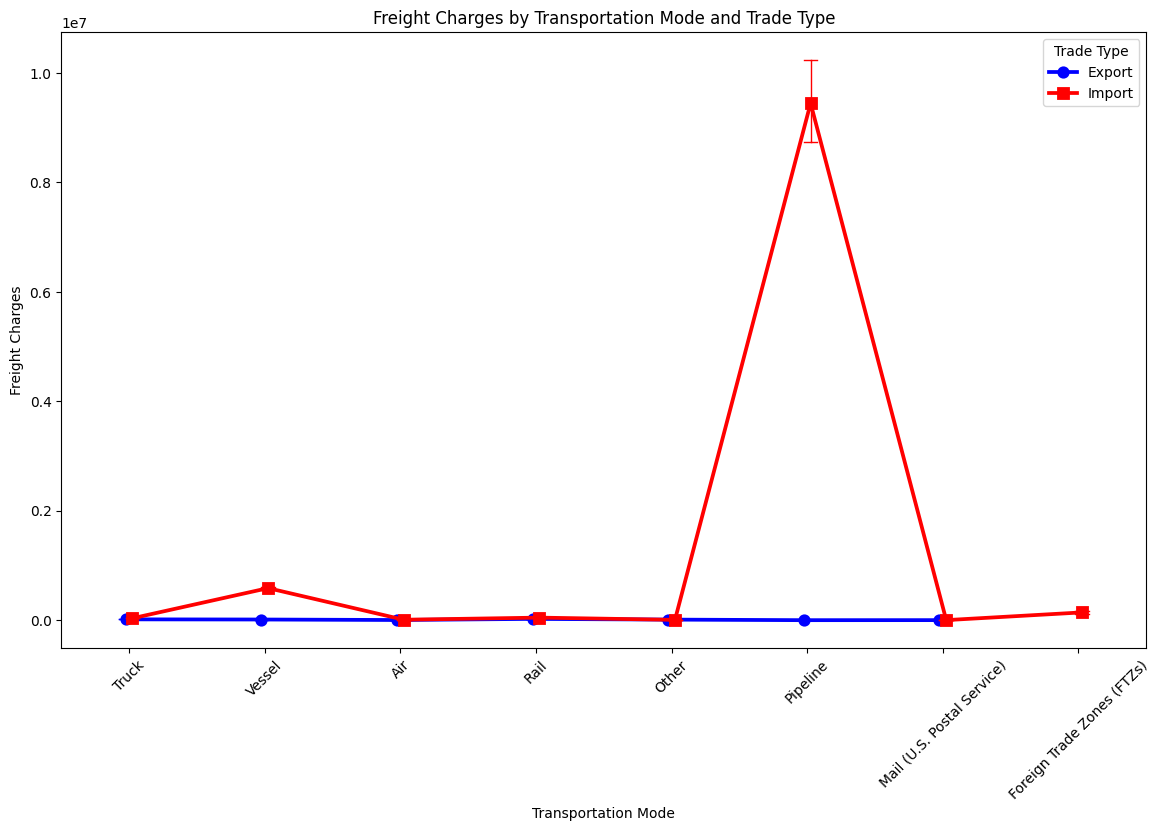

In [20]:
# Define a custom palette with blue and red colors
custom_palette = {'Export': 'blue', 'Import': 'red'}

# Plot the mean freight charges with error bars representing the confidence intervals
plt.figure(figsize=(14, 8))
sns.pointplot(data=dfn, x='DISAGMOT', y='FREIGHT_CHARGES', hue='TRDTYPE', dodge=True, markers=['o', 's'], capsize=0.1, errwidth=1, palette=custom_palette)
plt.title('Freight Charges by Transportation Mode and Trade Type')
plt.xlabel('Transportation Mode')
plt.ylabel('Freight Charges')
plt.xticks(rotation=45)
plt.legend(title='Trade Type')
plt.show()

### Key Observations:
- Pipeline Dominance in Imports:

The pipeline transportation mode stands out with the highest freight charges for imports, exceeding 
1×10^7. This suggests that a significant volume or high-cost goods are transported via pipelines.

- Low Freight Charges for Exports:

Export freight charges remain significantly lower across all transportation modes compared to imports, indicating potential differences in trade flow or cost structures.

- Other Transportation Modes:

For vessels, air, and foreign trade zones (FTZs), freight charges for imports are slightly higher than for exports.
Rail, mail, and truck show minimal variation between export and import freight charges, suggesting more balanced trade costs.

- Negligible Charges for Certain Modes:

Modes like mail (U.S. Postal Service) and other have minimal freight charges, reflecting their limited use or cost-effectiveness for freight transportation.

### Insights:
- Pipeline Efficiency and Focus:

The dominance of pipelines in import charges might indicate heavy reliance on imported energy resources like crude oil or natural gas. Analyzing trade volumes could provide additional insights into this trend.

- Export Cost Efficiency:

Lower export freight charges could reflect cost efficiencies, smaller export volumes, or different goods categories. A deeper look into export commodities might clarify these patterns.

- Mode-Specific Opportunities:

Transportation modes like air and vessels, which have balanced charges, might present opportunities for optimizing costs or diversifying trade routes.


7. What is the relationship between shipping weight and freight charges

d:\TransBorder Freight Project\TransBorder-Freight-Data-Analysis\transBF\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


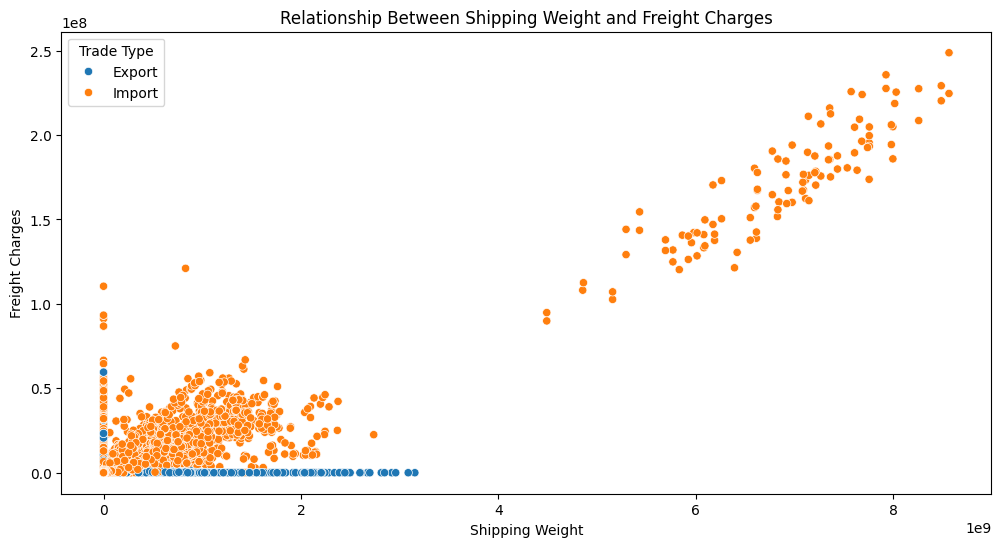

In [21]:
# Plot the relationship between shipping weight and freight charges
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dfn, x='SHIPWT', y='FREIGHT_CHARGES', hue='TRDTYPE')
plt.title('Relationship Between Shipping Weight and Freight Charges')
plt.xlabel('Shipping Weight')
plt.ylabel('Freight Charges')
plt.legend(title='Trade Type')
plt.show()

### Key Observations:
- Positive Correlation for Imports:

There is a clear positive correlation between shipping weight and freight charges for imports. As the shipping weight increases, the freight charges rise, indicating weight significantly influences import costs.

- Minimal Variation for Exports:

Export data (blue points) shows a cluster near the lower end of both axes. Freight charges and shipping weights for exports remain consistently low, suggesting exports involve lighter goods or fixed cost structures.

- Outliers in Imports:

Some data points for imports show disproportionately high freight charges compared to shipping weights. These could represent specialized goods or higher transportation costs.

- Linear Trend for Imports:

The spread of import points suggests a roughly linear relationship, which could be modeled mathematically for forecasting or cost estimation.

### Insights:
- Cost Dynamics:

Import freight charges appear to scale directly with shipping weight. Optimizing import logistics could reduce costs for heavier goods.

- Export Efficiency:

The low variability in export freight charges may reflect consistent packaging or shipping practices.

- Potential Improvements:

Understanding the reasons behind the outliers and addressing inefficiencies could provide actionable cost-saving strategies.


### Hypothesis Testing

Null Hypothesis (H0): Freight charges are independent of the mode of transportation.

 (i.e. There is no significant difference in freight charges between different transportation modes.)


Alternative Hypothesis (H1): Freight charges vary significantly by the mode of transportation.

(i.e. There is a significant difference in freight charges between different transportation modes.)


In [4]:
# Perform ANOVA test to compare freight charges across different transportation modes
anova_result = stats.f_oneway(
    dfn[dfn['DISAGMOT'] == 'Vessel']['FREIGHT_CHARGES'],
    dfn[dfn['DISAGMOT'] == 'Air']['FREIGHT_CHARGES'],
    dfn[dfn['DISAGMOT'] == 'Truck']['FREIGHT_CHARGES'],
    dfn[dfn['DISAGMOT'] == 'Rail']['FREIGHT_CHARGES'],
    dfn[dfn['DISAGMOT'] == 'Pipeline']['FREIGHT_CHARGES'],
    dfn[dfn['DISAGMOT'] == 'Other']['FREIGHT_CHARGES']
)

# Display the ANOVA test result
print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Interpret the result
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: Freight charges vary significantly by the mode of transportation.")
else:
    print("Fail to reject the null hypothesis: Freight charges are independent of the mode of transportation.")

ANOVA test result: F-statistic = 55996.98719907866, p-value = 0.0
Reject the null hypothesis: Freight charges vary significantly by the mode of transportation.
